In [1]:
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import json
import math
from scipy import integrate
from matplotlib.colors import TwoSlopeNorm
import imageio
import pickle
import datetime
%matplotlib inline

In [24]:
analysis_name='autarky comparison'
investigated_scenarios={'+/-50%, 0% autarky':'test_50per_incentive_00_negative',
                       '+/-50%, 50% autarky':'test_50per_incentive_50_negative',
                       '+/-50%, 95% autarky':'test_50per_incentive_95_negative'}

In [12]:
analysis_name='50per vs 3ct'
investigated_scenarios={'+/-50%, Linear, National and Europe':'test_50per_incentive_00_negative',
                       '+/-3ct/kWh, Linear, National and Europe':'test_3ct_incentive_00_negative'}

In [33]:
analysis_name='incentive schemes'
investigated_scenarios={'+/-50%, Linear, National and Europe':'test_50per_incentive_00_negative',
                       '+/-50%, Linear, National':'test_50per_incentive_00_negative_national',
                       '+/-50%, Linear, Europe':'test_50per_incentive_00_negative_europe',
                       '+50%, Linear, National and Europe':'test_50per_incentive_00_linear',
                       '+50%, Logistic, National and Europe':'test_50per_incentive_00_logistic'}

In [404]:
analysis_name='per tech test'
investigated_scenarios={'+/-50%, Europe per Tech':'test_50per_incentive_00_negative_europe_per_tech'}

In [3]:
plot_path=r'C:\Users\Nikla\polybox\Master Thesis\Figures'
lau_2013=gpd.read_file(r'C:\Users\Nikla\polybox\Tests\COMM-01M-2013-SH\COMM_01M_2013_SH\data\COMM_RG_01M_2013.shp')
units=gpd.read_file(r'C:\Users\Nikla\polybox\European Incentive Model\build\data\national\units.geojson')
model_units=units[['id','geometry','name']]
model_units=model_units.set_index('id')
model_units
region_dict={'Southeast Europe':['ALB','BIH','BGR','MNE','MKD','GRC','HRV','ROU','SRB','CYP','ITA'],'Iberia':['PRT','ESP'],'Western Europe':
            ['FRA','IRL','GBR','NLD','BEL','LUX'],'Central Europe':['DEU','CHE','AUT','POL','CZE','SVK','SVN','HUN','DNK'],
            'Northern Europe':['NOR','SWE','FIN','EST','LVA','LTU']}
inv_region_dict = {}
for k,v in region_dict.items():
    for x in v:
        inv_region_dict[x]=k

model_units['region']='region'
for i in model_units.index:

    for key in region_dict:
        if i in region_dict[key]:
            model_units.loc[i,'region']=key
regions = model_units.dissolve(by='region', aggfunc='sum')

In [4]:
#read weather regimes
import netCDF4 as nc
import xarray as xr
ds = xr.open_dataset(r'C:\Users\Nikla\polybox\Master Thesis\Data\wr_time.nc')
weather_regimes = ds.to_dataframe()
weather_regimes = weather_regimes.loc['2010-01-01':'2015-12-31']

Plot regions of Europe

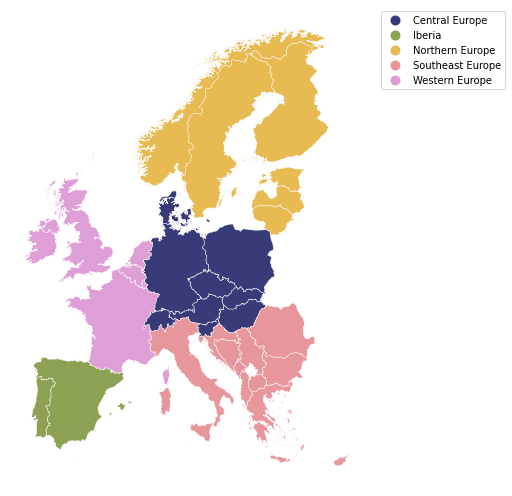

In [325]:
fig, ax = plt.subplots(1, 1,figsize=(7,7))
model_units.plot(figsize=[16,16],column='region',edgecolor='white',linewidth=0.4,legend=True,legend_kwds={'bbox_to_anchor': (1.4, 1)},ax=ax, cmap='tab20b')
ax.axis('off')
plt.tight_layout()
plt.savefig(r'C:\Users\Nikla\polybox\Master Thesis\Figures\European Regions.png', dpi=300, bbox_inches = 'tight')

## Plot Scores

In [6]:
score_scenarios=investigated_scenarios
               

technology_dict={'wind_onshore':'Wind Onshore','wind_offshore':'Wind Offshore', 'open_field_pv':'Open Field PV','roof_mounted_pv':'Rooftop PV'}

In [5]:
### Scores 
def score_df_to_pd(df_score):
    df=pd.DataFrame(columns={'loc','tech','score'})
    for i in df_score.index:
        dictionary=df_score['score'][i]
        dictionary=dictionary.replace("'", "\"")
        dictionary= json.loads(dictionary)
    
        for key in dictionary.keys():
            df=df.append({'loc':df_score['loc'][i],'tech':key,'score':dictionary[key]},ignore_index=True)
    return df
            

Plot European Scores

OSError: [Errno 22] Invalid argument: 'European_score_Rooftop PV_step_4.png'

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

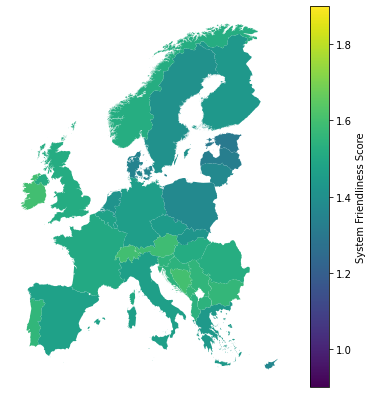

In [16]:

for scenario in score_scenarios.keys():
    os.chdir(os.path.join('D:\\',score_scenarios[scenario]))
    # print(scenario_path)
    
    for technology in technology_dict.keys():
        for step in range(2,7):
            os.chdir(os.path.join('D:\\',score_scenarios[scenario]))
            figure_path=os.path.join(plot_path,analysis_name,'scores','european',score_scenarios[scenario])
            if not os.path.exists(figure_path):
                os.makedirs(figure_path)
            
            european_score=pd.read_csv('european_score_year_{}'.format(step)).rename(columns={'Unnamed: 0':'loc'})

            european_score_hourly=score_df_to_pd(european_score[['loc','hourly']].rename(columns={'hourly':'score'}))
            european_score_daily=score_df_to_pd(european_score[['loc','daily']].rename(columns={'daily':'score'}))
            european_score_weekly=score_df_to_pd(european_score[['loc','weekly']].rename(columns={'weekly':'score'}))
            european_score_monthly=score_df_to_pd(european_score[['loc','monthly']].rename(columns={'monthly':'score'}))
            european_score_seasonally=score_df_to_pd(european_score[['loc','seasonally']].rename(columns={'seasonally':'score'}))

            european_score_total=pd.DataFrame()
            european_score_total['loc']=european_score_hourly['loc']
            european_score_total['tech']=european_score_hourly['tech']
            european_score_total['score']=european_score_hourly['score']+european_score_daily['score']+european_score_weekly['score']+european_score_monthly['score']+european_score_seasonally['score']

            os.chdir(figure_path)
   
            df=european_score_total.rename(columns={'loc':'country_code'})
            df=df[df['tech']==technology]
          
            plot_df=pd.merge(units, df, on='country_code')
            #os.chdir(plot_path)
            if technology=='wind_onshore' or technology=='wind_offshore':
                if step==2:
                    vmin_wind=european_score_total[european_score_total['tech'].isin(['wind_onshore','wind_offshore'])]['score'].min()
                    
                    vmax_wind=european_score_total[european_score_total['tech'].isin(['wind_onshore','wind_offshore'])]['score'].max()
                    
                    vcenter_wind = (vmin+vmax)/2
                norm = TwoSlopeNorm(vmin=vmin_wind, vcenter=vcenter_wind, vmax=vmax_wind)
            else:
                if step==2:
                    vmin_pv=european_score_total[european_score_total['tech'].isin(['open_field_pv','roof_mounted_pv'])]['score'].min()
                    
                    vmax_pv=european_score_total[european_score_total['tech'].isin(['open_field_pv','roof_mounted_pv'])]['score'].max()*1.1
                    
                    vcenter_pv = (vmin_pv+vmax_pv)/2
                norm = TwoSlopeNorm(vmin=vmin_pv, vcenter=vcenter_pv, vmax=vmax_pv)
                
            
            
            fig, ax = plt.subplots(1, 1,figsize=(7,7))
            plot_df.plot(column='score', ax=ax,legend=True, norm=norm,legend_kwds={'label': "System Friendliness Score",'orientation': "vertical"})
            ax.axis('off')
            #plt.title('European score for {} step {}'.format(technology_dict[technology],step-1))
            plt.savefig(os.path.join('European_score_{}_step_{}.png'.format(technology_dict[technology],step-1)),bbox_inches='tight', dpi=300)
            plt.clf()

In [13]:
vmax

3.9866815790396295

Plot National Scores

In [15]:

for scenario in score_scenarios.keys():
    os.chdir(os.path.join('D:\\',score_scenarios[scenario]))
    # print(scenario_path)
    
    for technology in technology_dict.keys():
        for step in range(2,7):
            os.chdir(os.path.join('D:\\',score_scenarios[scenario]))
            figure_path=os.path.join(plot_path,analysis_name,'scores','national',score_scenarios[scenario])
            if not os.path.exists(figure_path):
                os.makedirs(figure_path)
            
            national_score=pd.read_csv('national_score_year_{}'.format(step)).rename(columns={'Unnamed: 0':'loc'})

            national_score_hourly=score_df_to_pd(national_score[['loc','hourly']].rename(columns={'hourly':'score'}))
            national_score_daily=score_df_to_pd(national_score[['loc','daily']].rename(columns={'daily':'score'}))
            national_score_weekly=score_df_to_pd(national_score[['loc','weekly']].rename(columns={'weekly':'score'}))
            national_score_monthly=score_df_to_pd(national_score[['loc','monthly']].rename(columns={'monthly':'score'}))
            national_score_seasonally=score_df_to_pd(national_score[['loc','seasonally']].rename(columns={'seasonally':'score'}))

            national_score_total=pd.DataFrame()
            national_score_total['loc']=national_score_hourly['loc']
            national_score_total['tech']=national_score_hourly['tech']
            national_score_total['score']=national_score_hourly['score']+national_score_daily['score']+national_score_weekly['score']+national_score_monthly['score']+national_score_seasonally['score']

            os.chdir(figure_path)
       
            df=national_score_total.rename(columns={'loc':'country_code'})
            df=df[df['tech']==technology]
          
            plot_df=pd.merge(units, df, on='country_code')
            #os.chdir(plot_path)
             if technology=='wind_onshore' or technology=='wind_offshore':
                if step==2:
                    vmin_wind=national_score_total[national_score_total['tech'].isin(['wind_onshore','wind_offshore'])]['score'].min()
                    
                    vmax_wind=national_score_total[national_score_total['tech'].isin(['wind_onshore','wind_offshore'])]['score'].max()
                    
                    vcenter_wind = (vmin+vmax)/2
                norm = TwoSlopeNorm(vmin=vmin_wind, vcenter=vcenter_wind, vmax=vmax_wind)
            else:
                if step==2:
                    vmin_pv=national_score_total[national_score_total['tech'].isin(['open_field_pv','roof_mounted_pv'])]['score'].min()
                    
                    vmax_pv=national_score_total[national_score_total['tech'].isin(['open_field_pv','roof_mounted_pv'])]['score'].max()*1.1
                    
                    vcenter_pv = (vmin_pv+vmax_pv)/2
                norm = TwoSlopeNorm(vmin=vmin_pv, vcenter=vcenter_pv, vmax=vmax_pv)
            fig, ax = plt.subplots(1, 1,figsize=(7,7))
            plot_df.plot(column='score', legend=True, norm=norm,ax=ax,legend_kwds={'label': "System Friendliness Score",'orientation': "vertical"})
            ax.axis('off')
            #plt.title('National score for {} step {}'.format(technology_dict[technology],step-1))
            plt.savefig(os.path.join('National_score_{}_step_{}.png'.format(technology_dict[technology],step-1)), bbox_inches='tight',dpi=300)
            plt.clf()

IndentationError: unexpected indent (Temp/ipykernel_11312/2297435847.py, line 32)

In [45]:

for scenario in ['+/-50%, Linear, National and Europe']:
    os.chdir(os.path.join('D:\\',score_scenarios[scenario]))
    # print(scenario_path)
    
    for technology in ['wind_onshore']:
        for step in range(2,7):
            os.chdir(os.path.join('D:\\',score_scenarios[scenario]))
            figure_path=os.path.join(plot_path,analysis_name,'scores','national','Gallery',score_scenarios[scenario])
            if not os.path.exists(figure_path):
                os.makedirs(figure_path)
            
            national_score=pd.read_csv('national_score_year_{}'.format(step)).rename(columns={'Unnamed: 0':'loc'})

            national_score_hourly=score_df_to_pd(national_score[['loc','hourly']].rename(columns={'hourly':'score'}))
            national_score_daily=score_df_to_pd(national_score[['loc','daily']].rename(columns={'daily':'score'}))
            national_score_weekly=score_df_to_pd(national_score[['loc','weekly']].rename(columns={'weekly':'score'}))
            national_score_monthly=score_df_to_pd(national_score[['loc','monthly']].rename(columns={'monthly':'score'}))
            national_score_seasonally=score_df_to_pd(national_score[['loc','seasonally']].rename(columns={'seasonally':'score'}))

            national_score_total=pd.DataFrame()
            national_score_total['loc']=national_score_hourly['loc']
            national_score_total['tech']=national_score_hourly['tech']
            national_score_total['score']=national_score_hourly['score']+national_score_daily['score']+national_score_weekly['score']+national_score_monthly['score']+national_score_seasonally['score']

            os.chdir(figure_path)
       
            df=national_score_total.rename(columns={'loc':'country_code'})
            df=df[df['tech']==technology]
          
            plot_df=pd.merge(units, df, on='country_code')
            #os.chdir(plot_path)
            if step==2:
                vmin=plot_df['score'].min()
                vmax=plot_df['score'].max()
                vcenter = (vmin+vmax)/2
            norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
            fig, ax = plt.subplots(1, 1,figsize=(7,7))
            if step==6:
                plot_df.plot(column='score', legend=True, norm=norm,ax=ax,legend_kwds={'label': "System Friendliness Score",'orientation': "vertical"})
            else:
                plot_df.plot(column='score', legend=False, norm=norm,ax=ax)
            ax.axis('off')
            #plt.title('National score for {} step {}'.format(technology_dict[technology],step-1))
            plt.savefig(os.path.join('National_score_{}_step_{}.png'.format(technology_dict[technology],step-1)), bbox_inches='tight',dpi=300)
            plt.clf()

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [46]:

for scenario in ['+/-50%, Linear, National and Europe']:
    os.chdir(os.path.join('D:\\',score_scenarios[scenario]))
    # print(scenario_path)
    
    for technology in ['wind_onshore']:
        for step in range(2,7):
            os.chdir(os.path.join('D:\\',score_scenarios[scenario]))
            figure_path=os.path.join(plot_path,analysis_name,'scores','european','Gallery',score_scenarios[scenario])
            if not os.path.exists(figure_path):
                os.makedirs(figure_path)
            
            european_score=pd.read_csv('european_score_year_{}'.format(step)).rename(columns={'Unnamed: 0':'loc'})

            european_score_hourly=score_df_to_pd(european_score[['loc','hourly']].rename(columns={'hourly':'score'}))
            european_score_daily=score_df_to_pd(european_score[['loc','daily']].rename(columns={'daily':'score'}))
            european_score_weekly=score_df_to_pd(european_score[['loc','weekly']].rename(columns={'weekly':'score'}))
            european_score_monthly=score_df_to_pd(european_score[['loc','monthly']].rename(columns={'monthly':'score'}))
            european_score_seasonally=score_df_to_pd(european_score[['loc','seasonally']].rename(columns={'seasonally':'score'}))

            european_score_total=pd.DataFrame()
            european_score_total['loc']=european_score_hourly['loc']
            european_score_total['tech']=european_score_hourly['tech']
            european_score_total['score']=european_score_hourly['score']+european_score_daily['score']+european_score_weekly['score']+european_score_monthly['score']+european_score_seasonally['score']

            os.chdir(figure_path)
       
            df=european_score_total.rename(columns={'loc':'country_code'})
            df=df[df['tech']==technology]
          
            plot_df=pd.merge(units, df, on='country_code')
            #os.chdir(plot_path)
            if step==2:
                vmin=plot_df['score'].min()
                vmax=plot_df['score'].max()
                vcenter = (vmin+vmax)/2
            norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
            fig, ax = plt.subplots(1, 1,figsize=(7,7))
            if step==6:
                plot_df.plot(column='score', legend=True, norm=norm,ax=ax,legend_kwds={'label': "System Friendliness Score",'orientation': "vertical"})
            else:
                plot_df.plot(column='score', legend=False, norm=norm,ax=ax)
            ax.axis('off')
            #plt.title('National score for {} step {}'.format(technology_dict[technology],step-1))
            plt.savefig(os.path.join('european_score_{}_step_{}.png'.format(technology_dict[technology],step-1)), bbox_inches='tight',dpi=300)
            plt.clf()

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<AxesSubplot:ylabel='Frequency'>

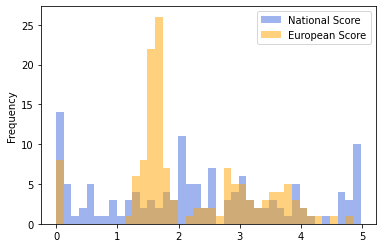

In [119]:
#Histogram of scores
os.chdir(os.path.join('D:\\','test_50per_incentive_00_negative'))

national_score=pd.read_csv('national_score_year_{}'.format(step)).rename(columns={'Unnamed: 0':'loc'})

national_score_hourly=score_df_to_pd(national_score[['loc','hourly']].rename(columns={'hourly':'score'}))
national_score_daily=score_df_to_pd(national_score[['loc','daily']].rename(columns={'daily':'score'}))
national_score_weekly=score_df_to_pd(national_score[['loc','weekly']].rename(columns={'weekly':'score'}))
national_score_monthly=score_df_to_pd(national_score[['loc','monthly']].rename(columns={'monthly':'score'}))
national_score_seasonally=score_df_to_pd(national_score[['loc','seasonally']].rename(columns={'seasonally':'score'}))

national_score_total=pd.DataFrame()
national_score_total['loc']=national_score_hourly['loc']
national_score_total['tech']=national_score_hourly['tech']
national_score_total['score']=national_score_hourly['score']+national_score_daily['score']+national_score_weekly['score']+national_score_monthly['score']+national_score_seasonally['score']



european_score=pd.read_csv('european_score_year_{}'.format(step)).rename(columns={'Unnamed: 0':'loc'})

european_score_hourly=score_df_to_pd(european_score[['loc','hourly']].rename(columns={'hourly':'score'}))
european_score_daily=score_df_to_pd(european_score[['loc','daily']].rename(columns={'daily':'score'}))
european_score_weekly=score_df_to_pd(european_score[['loc','weekly']].rename(columns={'weekly':'score'}))
european_score_monthly=score_df_to_pd(european_score[['loc','monthly']].rename(columns={'monthly':'score'}))
european_score_seasonally=score_df_to_pd(european_score[['loc','seasonally']].rename(columns={'seasonally':'score'}))

european_score_total=pd.DataFrame()
european_score_total['loc']=european_score_hourly['loc']
european_score_total['tech']=european_score_hourly['tech']
european_score_total['score']=european_score_hourly['score']+european_score_daily['score']+european_score_weekly['score']+european_score_monthly['score']+european_score_seasonally['score']

hist_df=pd.DataFrame(columns=['National Score','European Score'])
hist_df['National Score']=national_score_total['score']
hist_df['European Score']=european_score_total['score']

hist_df.plot.hist(bins=40,alpha=0.5,color=['royalblue','orange'])

In [28]:
for technology in technology_dict.keys():
        for step in range(2,3):
            os.chdir(os.path.join('D:\\',score_scenarios[scenario]))
            figure_path=os.path.join(plot_path,analysis_name,'scores','european',score_scenarios[scenario])
            if not os.path.exists(figure_path):
                os.makedirs(figure_path)
            
            european_score=pd.read_csv('european_score_year_{}'.format(step)).rename(columns={'Unnamed: 0':'loc'})

            european_score_hourly=score_df_to_pd(european_score[['loc','hourly']].rename(columns={'hourly':'score'}))
            european_score_daily=score_df_to_pd(european_score[['loc','daily']].rename(columns={'daily':'score'}))
            european_score_weekly=score_df_to_pd(european_score[['loc','weekly']].rename(columns={'weekly':'score'}))
            european_score_monthly=score_df_to_pd(european_score[['loc','monthly']].rename(columns={'monthly':'score'}))
            european_score_seasonally=score_df_to_pd(european_score[['loc','seasonally']].rename(columns={'seasonally':'score'}))

            european_score_total=pd.DataFrame()
            european_score_total['loc']=european_score_hourly['loc']
            european_score_total['tech']=european_score_hourly['tech']
            european_score_total['score']=european_score_hourly['score']+european_score_daily['score']+european_score_weekly['score']+european_score_monthly['score']+european_score_seasonally['score']
            
            largest=european_score_seasonally[european_score_seasonally['tech']=='open_field_pv']['score'].nlargest(6)
            print(technology)
            print('')
            for i in largest.index:
                print(european_score_seasonally.loc[i,'loc'],print(european_score_seasonally.loc[i,'score']))

wind_onshore

0.2196719131696354
ALB None
0.21806700198456308
GRC None
0.21744941570559906
MKD None
0.21698019854520767
CYP None
0.20968910873727198
BGR None
0.19774666156656606
MNE None
wind_offshore

0.2196719131696354
ALB None
0.21806700198456308
GRC None
0.21744941570559906
MKD None
0.21698019854520767
CYP None
0.20968910873727198
BGR None
0.19774666156656606
MNE None
open_field_pv

0.2196719131696354
ALB None
0.21806700198456308
GRC None
0.21744941570559906
MKD None
0.21698019854520767
CYP None
0.20968910873727198
BGR None
0.19774666156656606
MNE None
roof_mounted_pv

0.2196719131696354
ALB None
0.21806700198456308
GRC None
0.21744941570559906
MKD None
0.21698019854520767
CYP None
0.20968910873727198
BGR None
0.19774666156656606
MNE None


Gif of score development

In [38]:
for scenario_directory in os.listdir(os.path.join(plot_path,analysis_name,'scores','european')):
    for tech_directory in os.listdir(os.path.join(plot_path,analysis_name,'scores','european',scenario_directory)):
        if os.path.isdir(os.path.join(plot_path,analysis_name,'scores','european',scenario_directory,tech_directory)):
            os.chdir(os.path.join(plot_path,analysis_name,'scores','european',scenario_directory,tech_directory))
            images = []
            for filename in os.listdir(os.path.join(plot_path,analysis_name,'scores','european',scenario_directory,tech_directory)):

                images.append(imageio.imread(filename))
            imageio.mimsave(os.path.join(plot_path,analysis_name,'scores','european',scenario_directory, tech_directory+'.gif'), images,duration=1)

In [39]:
for scenario_directory in os.listdir(os.path.join(plot_path,analysis_name,'scores','national')):
    for tech_directory in os.listdir(os.path.join(plot_path,analysis_name,'scores','national',scenario_directory)):
        if os.path.isdir(os.path.join(plot_path,analysis_name,'scores','european',scenario_directory,tech_directory)):
            os.chdir(os.path.join(plot_path,analysis_name,'scores','national',scenario_directory,tech_directory))
            images = []
            for filename in os.listdir(os.path.join(plot_path,analysis_name,'scores','national',scenario_directory,tech_directory)):

                images.append(imageio.imread(filename))
            imageio.mimsave(os.path.join(plot_path,analysis_name,'scores','national',scenario_directory, tech_directory+'.gif'), images,duration=1)

In [12]:
import imageio
images = []
os.chdir(r'C:\Users\Nikla\polybox\Master Thesis\Figures\scores\national\test_50per_incentive_00_negative/wind_onshore')
for filename in os.listdir(r'C:\Users\Nikla\polybox\Master Thesis\Figures\scores\national\test_50per_incentive_00_negative/wind_onshore'):
    print(filename)
    images.append(imageio.imread(filename))
imageio.mimsave(r'C:\Users\Nikla\polybox\Master Thesis\Figures\scores\national\test_50per_incentive_00_negative\wind_onshore.gif', images,duration=1)

National_score_Wind Onshore_step_1.png
National_score_Wind Onshore_step_2.png
National_score_Wind Onshore_step_3.png
National_score_Wind Onshore_step_4.png
National_score_Wind Onshore_step_5.png


## Costs

In [13]:
cost_scenarios=investigated_scenarios
plot_path=r'C:\Users\Nikla\polybox\Master Thesis\Figures'

In [14]:

system_cost_dict={}
incentive_cost_dict={}
unmet_demand_dict={}
unmet_demand_europe_dict={}
for scenario in cost_scenarios.keys():

    optimization_path=os.path.join('D:\\',cost_scenarios[scenario])
    operation_path=os.path.join(optimization_path, 'Operation')

    avg_cost_adjust=0
    avg_cost_baseline=0

    premium=0
    penalty=0

    avg_unmet_demand_adjust=0
    avg_unmet_demand_baseline=0
    
    avg_unmet_demand_europe_adjust=0
    avg_unmet_demand_europe_baseline=0

    energy_prod_tot=0


    ### get delta_df and incetive_dict
    os.chdir(optimization_path)
    delta_df=pd.DataFrame(columns=['locs','techs','1_2','2_3','3_4','4_5','5_6'])
    delta_dict={}
    delta_dict[scenario]={}
    scenario_path=os.path.join(optimization_path,'adjusted_costs')
    incentive_dict={}
    incentive_dict[scenario]={}
    for year in range(2,7):
        energy_cap_prev=pd.read_csv(os.path.join(scenario_path,'model_csv_year_{}'.format(year-1),'results_energy_cap.csv'))
        energy_cap_prev=energy_cap_prev[energy_cap_prev['techs'].isin(['wind_offshore','wind_onshore_competing', 'wind_onshore_monopoly',
                                                            'open_field_pv','roof_mounted_pv'])]

        energy_cap=pd.read_csv(os.path.join(scenario_path,'model_csv_year_{}'.format(year),'results_energy_cap.csv'))
        #print(energy_cap)
        energy_cap=energy_cap[energy_cap['techs'].isin(['wind_offshore','wind_onshore_competing', 'wind_onshore_monopoly',
                                                            'open_field_pv','roof_mounted_pv'])]
        #print(energy_cap['energy_cap'].sum())
        if year==2:
            delta_df['locs']=energy_cap['locs']
            delta_df['techs']=energy_cap['techs']

        if year==6:
            total_cap=energy_cap
            total_cap=total_cap.set_index(['locs','techs'])



        key=str(year-1)+'_'+str(year)

        delta_df[key]=energy_cap['energy_cap']-energy_cap_prev['energy_cap']

        incentive_df=pd.read_csv(os.path.join(optimization_path,'incentives_step_{}'.format(year))).set_index('Unnamed: 0')
        incentive_dict[key]=incentive_df


    delta_df=delta_df.set_index(['locs','techs'])





    for file in os.listdir(os.path.join(operation_path,'adjusted_costs')):
        os.chdir(os.path.join(operation_path,'adjusted_costs',file))
        operation_cost=pd.read_csv('results_cost.csv')
        avg_cost_adjust+=operation_cost['cost'].sum()
        
        try:
            unmet_demand=pd.read_csv('results_unmet_demand.csv')
            unmet_demand_europe=unmet_demand.groupby('timesteps').sum()
            avg_unmet_demand_adjust+=unmet_demand['unmet_demand'].sum()
            avg_unmet_demand_europe_adjust+=unmet_demand_europe['unmet_demand'].sum()
        except:
            print('no unmet demand')

        energy_prod=pd.read_csv(os.path.join(scenario_path,'model_csv_year_{}'.format(year-1),'results_carrier_prod.csv'))
        energy_prod=energy_prod[energy_prod['techs'].isin(['wind_offshore','wind_onshore_competing', 'wind_onshore_monopoly',
                                                            'open_field_pv','roof_mounted_pv'])]
        energy_prod=energy_prod.groupby(['locs','techs']).sum()

        try:
            energy_prod_tot+=energy_prod
        except:
            print('should be year 1')
            energy_prod_tot=energy_prod
    costs=0
    cost_test=0
    for col in delta_df.columns:

            incentive_df=incentive_dict[col]

            for loc,tech in delta_df.index:
                #for step in delta_df[col].loc[loc,tech]:
                    #print(loc, ' ',tech,' ',float(step/total_cap.loc[loc,tech]))
                    #print('step: ', step, 'total_cap: ',total_cap.loc[loc,tech])
                    #print(energy_prod.loc[loc,tech])
                    #int(step)
                if float(total_cap.loc[loc,tech]) != 0.0:
                    #print(step)
                    
                    if tech=='wind_onshore_competing' or tech=='wind_onshore_monopoly':
                        costs+=float(energy_prod_tot.loc[loc,tech])*float(delta_df[col].loc[loc,tech]/total_cap.loc[loc,tech])*incentive_df.loc['wind_onshore',loc]
                        payment=float(energy_prod_tot.loc[loc,tech])*float(delta_df[col].loc[loc,tech]/total_cap.loc[loc,tech])*incentive_df.loc['wind_onshore',loc]
                    else:
                        costs+=float(energy_prod_tot.loc[loc,tech])*float(delta_df[col].loc[loc,tech]/total_cap.loc[loc,tech])*incentive_df.loc[tech,loc]
                        payment=float(energy_prod_tot.loc[loc,tech])*float(delta_df[col].loc[loc,tech]/total_cap.loc[loc,tech])*incentive_df.loc[tech,loc]
                cost_test+=payment
                if payment>0:
                    premium+=payment
                elif payment<0:
                    penalty+=payment
                    #print('location: ', loc, ' technology:',tech)
    print(scenario, 'Premium: ', premium, 'Penalty', penalty)
    print(cost_test)
    avg_cost_adjust/=6
    avg_unmet_demand_adjust/=6
    avg_unmet_demand_europe_adjust/=6
    costs/=6
    system_cost_dict[scenario]=avg_cost_adjust
    incentive_cost_dict[scenario]=costs
    unmet_demand_dict[scenario]=avg_unmet_demand_adjust
    unmet_demand_europe_dict[scenario]=avg_unmet_demand_europe_adjust
    print('adjust costs:',avg_cost_adjust)

    for file in os.listdir(os.path.join(operation_path,'baseline')):
        os.chdir(os.path.join(operation_path,'baseline',file))
        operation_cost=pd.read_csv('results_cost.csv')
        avg_cost_baseline+=operation_cost['cost'].sum()
        unmet_demand=pd.read_csv('results_unmet_demand.csv')
        unmet_demand_europe=unmet_demand.groupby('timesteps').sum()

        avg_unmet_demand_baseline+=unmet_demand['unmet_demand'].sum()
        avg_unmet_demand_europe_baseline+=unmet_demand_europe['unmet_demand'].sum()
    avg_cost_baseline/=6
    avg_unmet_demand_baseline/=6
    print('baseline costs:',avg_cost_baseline)
    avg_unmet_demand_europe_baseline/=6
    system_cost_dict[scenario]=(system_cost_dict[scenario]/avg_cost_baseline-1)*100
    unmet_demand_dict['baseline']=avg_unmet_demand_baseline
    unmet_demand_europe_dict['baseline']=avg_unmet_demand_europe_baseline
system_cost_df=pd.DataFrame.from_dict(system_cost_dict,orient='index', columns=['System Costs'])
incentive_df=pd.DataFrame.from_dict(incentive_cost_dict,orient='index', columns=['Incentive Costs'])
unmet_demand_df=pd.DataFrame.from_dict(unmet_demand_dict,orient='index', columns=['Unmet Demand'])
unmet_demand_europe_df=pd.DataFrame.from_dict(unmet_demand_europe_dict,orient='index', columns=['Unmet Demand'])

+/-50%, Linear, National and Europe Premium:  27.90624614387775 Penalty -10.614852229129548
17.29139391474817
adjust costs: 310.145940882103
baseline costs: 298.79548127794124
+/-3ct/kWh, Linear, National and Europe Premium:  52.01296783159532 Penalty -5.484349818241361
46.528618013353935
adjust costs: 313.37119562240014
baseline costs: 298.79548127794124


In [169]:
avg_cost_baseline

308.0093167777217

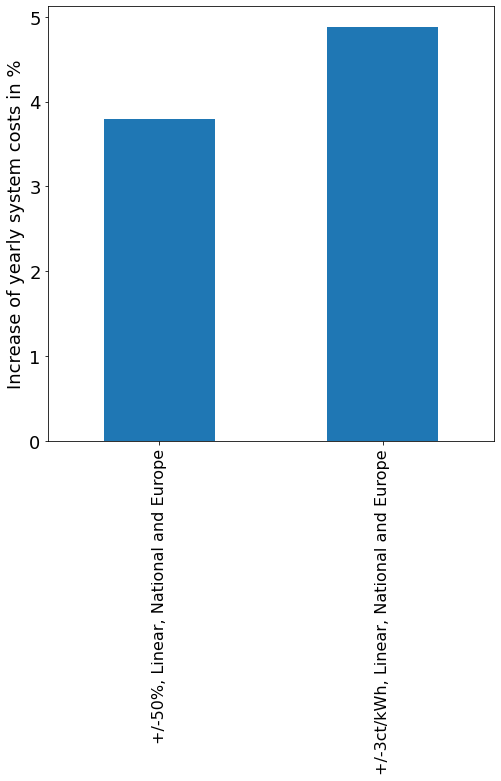

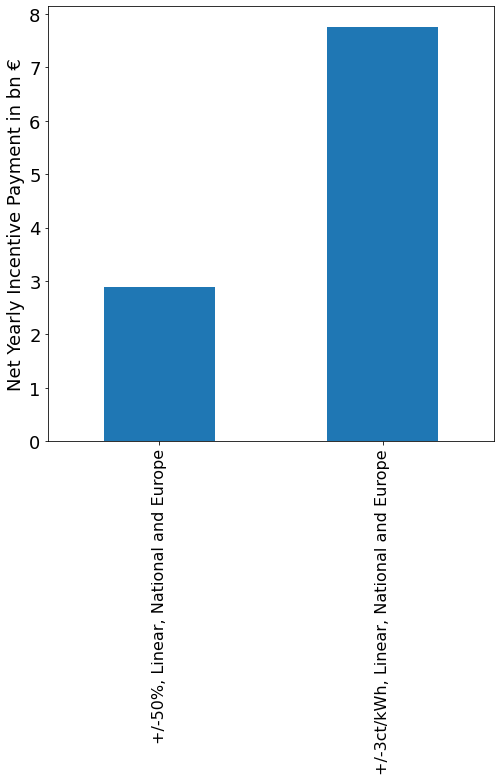

In [15]:
if not os.path.exists(os.path.join(plot_path,analysis_name,'system_costs')):
    os.makedirs(os.path.join(plot_path,analysis_name,'system_costs'))

system_cost_df.plot.bar(legend=False,figsize=[8,8])
plt.ylabel('Increase of yearly system costs in %',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=18)
plt.savefig(os.path.join(plot_path,analysis_name,'system_costs','system_costs_increase.png'), bbox_inches = 'tight', dpi=300)
            
incentive_df.plot.bar(legend=False,figsize=[8,8])
plt.ylabel('Net Yearly Incentive Payment in bn €',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=18)
plt.savefig(os.path.join(plot_path,analysis_name,'system_costs','incentive_costs.png'), dpi=300, bbox_inches = 'tight')

In [24]:
costs 

19.15706088021264

In [26]:
payment

1.2618712876405081e-05

In [165]:
system_cost_df

,System Costs
"+/-50%, 0% autarky",3.798739
"+/-50%, 50% autarky",3.720905
"+/-50%, 95% autarky",2.803705


## Total Capacity

In [16]:
capacity_scenarios=investigated_scenarios
plot_path=r'C:\Users\Nikla\polybox\Master Thesis\Figures'
generation_techs=['biofuel','hydro_reservoir','hydro_run_of_river','nuclear','open_field_pv','roof_mounted_pv',
                  'wind_offshore','wind_onshore_competing','wind_onshore_monopoly']
storage_techs=['battery','hydrogen','pumped_hydro']

In [351]:
print(list(capacity_scenarios.keys()).append('No Incentive'))

None


In [45]:
column_names

['+/-50%, Linear, National and Europe',
 '+/-50%, Linear, National',
 '+/-50%, Linear, Europe',
 '+50%, Linear, National and Europe',
 '+50%, Logistic, National and Europe',
 'No Incentive']

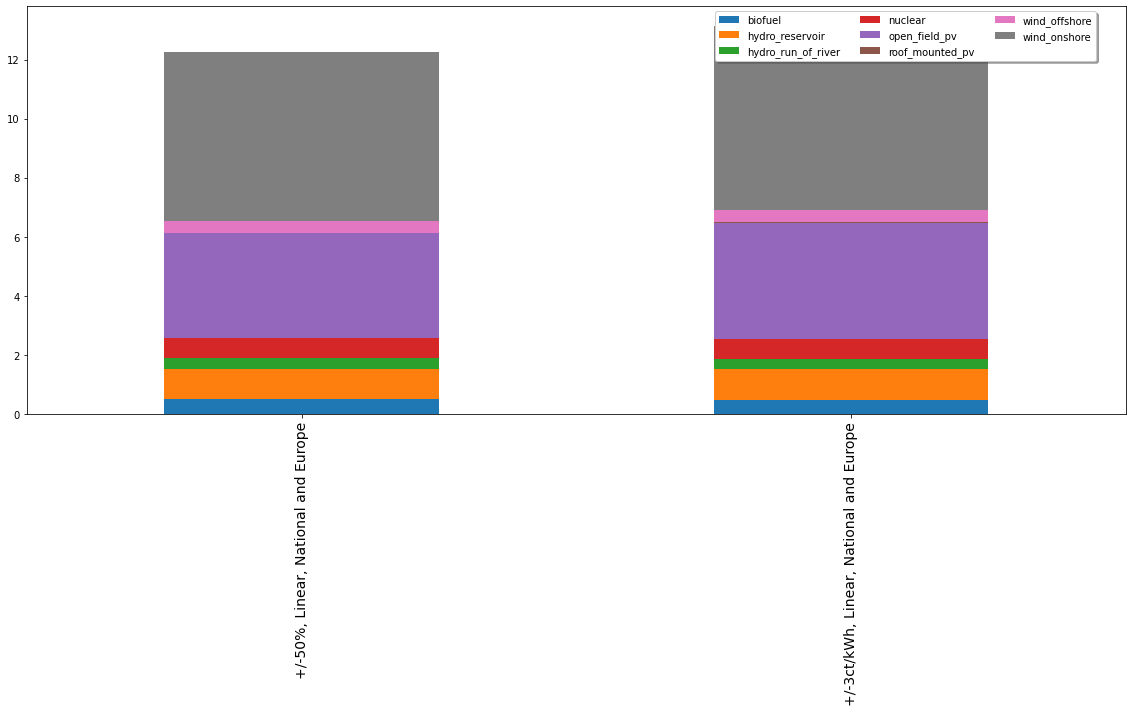

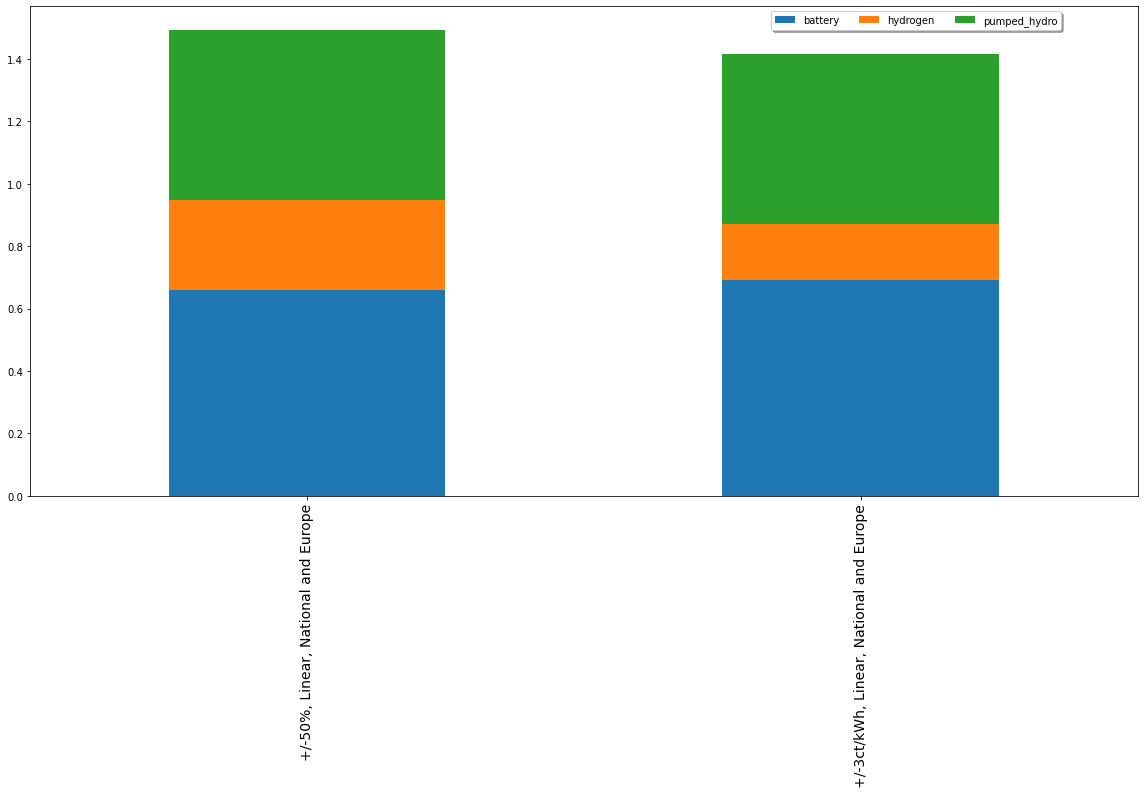

In [17]:
if not os.path.exists(os.path.join(plot_path,analysis_name,'installed_capacity')):
    os.makedirs(os.path.join(plot_path,analysis_name,'installed_capacity'))
column_names=list(capacity_scenarios.keys())
if analysis_name!='autarky comparison' and analysis_name!='50per vs 3ct':
    column_names.append('No Incentive')
generation_cap_scenarios=pd.DataFrame(columns=column_names)
storage_cap_scenarios=pd.DataFrame(columns=column_names)

for scenario in capacity_scenarios.keys():
    scenario_path=os.path.join('D:\\',capacity_scenarios[scenario],'adjusted_costs')
    energy_cap=pd.read_csv(os.path.join(scenario_path,'model_csv_year_6','results_energy_cap.csv'))
    energy_cap=energy_cap.groupby('techs').sum()
  
    generation_cap_scenarios[scenario]=energy_cap[energy_cap.index.isin(generation_techs)]
    storage_cap_scenarios[scenario]=energy_cap[energy_cap.index.isin(storage_techs)]
    
if analysis_name!='autarky comparison' and analysis_name!='50per vs 3ct':
    baseline_path=os.path.join('D:\\',capacity_scenarios[scenario],'baseline')

    energy_cap=pd.read_csv(os.path.join(baseline_path,'model_csv_year_1','results_energy_cap.csv'))
    energy_cap=energy_cap.groupby('techs').sum()
    
    generation_cap_scenarios['No Incentive']=energy_cap[energy_cap.index.isin(generation_techs)]
    storage_cap_scenarios['No Incentive']=energy_cap[energy_cap.index.isin(storage_techs)]

storage_cap_scenarios=storage_cap_scenarios.T

os.chdir(plot_path)
generation_cap_scenarios=generation_cap_scenarios.T

generation_cap_scenarios['wind_onshore']=generation_cap_scenarios['wind_onshore_monopoly']+generation_cap_scenarios['wind_onshore_competing']
generation_cap_scenarios=generation_cap_scenarios.drop(['wind_onshore_monopoly','wind_onshore_competing'],axis=1)

fig,ax=plt.subplots(1, 1,figsize=(16,10))
generation_cap_scenarios.plot.bar(ax=ax,stacked=True)
#plt.title('Installed Generation Capacity')
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 1.0),
          ncol=3, fancybox=True, shadow=True)
plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(plot_path,analysis_name,'installed_capacity','generation_capacity.png'), dpi=300, bbox_inches = 'tight')

fig,ax=plt.subplots(1, 1,figsize=(16,10))
storage_cap_scenarios.plot.bar(ax=ax,stacked=True)
#plt.title('Installed Storage Capacity')
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 1.0),
          ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.xticks(fontsize=14, rotation=90)
plt.xticks(fontsize=14, rotation=90)
plt.savefig(os.path.join(plot_path,analysis_name,'installed_capacity','storage_capacity.png'), dpi=300, bbox_inches = 'tight')

In [17]:
generation_cap_scenarios[['roof_mounted_pv','open_field_pv']].sum(axis=1)

+/-50%, Linear, National and Europe    3.556541
+/-50%, Linear, National               6.911649
+/-50%, Linear, Europe                 2.640754
+50%, Linear, National and Europe      3.519622
+50%, Logistic, National and Europe    3.839316
No Incentive                           3.262569
dtype: float64

In [18]:
generation_cap_scenarios

techs,biofuel,hydro_reservoir,hydro_run_of_river,nuclear,open_field_pv,roof_mounted_pv,wind_offshore,wind_onshore
"+/-50%, Linear, National and Europe",0.489222,1.048151,0.346113,0.685750,3.540912,0.015629,0.418175,5.709354
"+/-3ct/kWh, Linear, National and Europe",0.482298,1.048151,0.346113,0.662536,3.941021,0.015614,0.396476,6.251273


In [9]:
print(generation_cap_scenarios.to_latex(index=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  +/-50\%, Linear, National and Europe &  +/-50\%, Linear, National &  +/-50\%, Linear, Europe &  +50\%, Linear, National and Europe &  +50\%, Logistic, National and Europe &  No Incentive \\
techs              &                                      &                           &                         &                                    &                                      &               \\
\midrule
biofuel            &                             0.489222 &                  0.390743 &                0.391829 &                           0.332599 &                             0.369184 &      0.302462 \\
hydro\_reservoir    &                             1.048151 &                  1.048151 &                1.048151 &                           1.048151 &                             1.048151 &      1.048151 \\
hydro\_run\_of\_river &                             0.346113 &                  0.346113 &                0.346113 &                       

In [19]:
generation_cap_scenarios

techs,biofuel,hydro_reservoir,hydro_run_of_river,nuclear,open_field_pv,roof_mounted_pv,wind_offshore,wind_onshore
"+/-50%, Linear, National and Europe",0.489222,1.048151,0.346113,0.685750,3.540912,0.015629,0.418175,5.709354
"+/-50%, Linear, National",0.390743,1.048151,0.346113,0.661639,3.167174,3.744475,0.476404,5.725928
"+/-50%, Linear, Europe",0.391829,1.048151,0.346113,0.663675,2.625145,0.015609,1.210575,4.725292
"+50%, Linear, National and Europe",0.332599,1.048151,0.346113,0.671973,3.503991,0.015631,0.489273,5.576765
"+50%, Logistic, National and Europe",0.369184,1.048151,0.346113,0.661594,2.995353,0.843964,0.743681,5.757274
No Incentive,0.302462,1.048151,0.346113,0.711344,3.243500,0.019069,0.448437,5.242611


In [14]:
storage_cap_scenarios.sum(axis=1)

+/-50%, Linear, National and Europe    1.493208
+/-50%, Linear, National               1.595590
+/-50%, Linear, Europe                 1.210344
+50%, Linear, National and Europe      1.566812
+50%, Logistic, National and Europe    1.335831
No Incentive                           1.471014
dtype: float64

In [172]:
storage_cap_scenarios.sum(axis=1)*100

+/-50%, Linear, National and Europe    149.320801
+/-50%, Linear, National               159.558987
+/-50%, Linear, Europe                 121.034389
+50%, Linear, National and Europe      156.681238
+50%, Logistic, National and Europe    133.583132
No Incentive                           147.101381
dtype: float64

In [173]:
generation_cap_scenarios[['wind_offshore','wind_onshore']].sum(axis=1)*100

+/-50%, Linear, National and Europe    612.752839
+/-50%, Linear, National               620.233242
+/-50%, Linear, Europe                 593.586719
+50%, Linear, National and Europe      606.603760
+50%, Logistic, National and Europe    650.095478
No Incentive                           569.104819
dtype: float64

In [113]:
print(storage_cap_scenarios.T.to_latex(index=True))

\begin{tabular}{lrr}
\toprule
{} &  Premium \& Penalty 50\% LCOE &  Premium \& Penalty 3ct LCOE \\
techs        &                             &                             \\
\midrule
battery      &                    0.659010 &                    0.691124 \\
hydrogen     &                    0.287915 &                    0.178783 \\
pumped\_hydro &                    0.546283 &                    0.546283 \\
\bottomrule
\end{tabular}



In [56]:
energy_cap_baseline_normalize

,techs,energy_cap,cap_per_demand_unit
locs,,,
ALB,ac_transmission:GRC,0.018882,-2.656901e-04
ALB,ac_transmission:MKD,0.014518,-2.042934e-04
ALB,ac_transmission:MNE,0.027625,-3.887165e-04
ALB,battery,0.019210,-2.703126e-04
ALB,biofuel,0.000527,-7.418661e-06
...,...,...,...
SWE,pumped_hydro,0.000920,-6.665741e-07
SWE,roof_mounted_pv,0.000507,-3.674115e-07
SWE,wind_offshore,0.000709,-5.133483e-07


## Capacity Change

In [42]:
capacity_scenarios=investigated_scenarios
plot_path=r'C:\Users\Nikla\polybox\Master Thesis\Figures'

In [43]:
capa

{'+/-50%, Linear, National and Europe': 'test_50per_incentive_00_negative',
 '+/-50%, Linear, National': 'test_50per_incentive_00_negative_national',
 '+/-50%, Linear, Europe': 'test_50per_incentive_00_negative_europe',
 '+50%, Linear, National and Europe': 'test_50per_incentive_00_linear',
 '+50%, Logistic, National and Europe': 'test_50per_incentive_00_logistic'}

In [122]:

for scenario in capacity_scenarios.keys():
    scenario_path=os.path.join('D:\\',capacity_scenarios[scenario])
    
    

    technologies=['wind_offshore', 'wind_onshore','roof_mounted_pv','open_field_pv']
    print('')
    print(scenario)
    for technology in technologies:

        if not os.path.exists(os.path.join(plot_path,analysis_name,'capacity_change',technology)):
            os.makedirs(os.path.join(plot_path,analysis_name,'capacity_change',technology))
        os.chdir(os.path.join(scenario_path,'baseline','model_csv_year_1'))

        energy_cap_baseline=pd.read_csv('results_energy_cap.csv')
        energy_demand_baseline=pd.read_csv('results_carrier_con.csv')
        energy_demand_baseline=energy_demand_baseline[energy_demand_baseline['techs']=='demand_elec']
        energy_demand_baseline=energy_demand_baseline.groupby('locs').sum()
        energy_cap_baseline_normalize=energy_cap_baseline.set_index('locs')
        #print(energy_cap_baseline_normalize['energy_cap']/energy_demand_baseline['carrier_con'])
        energy_cap_baseline_normalize['cap_per_demand_unit']=-1*energy_cap_baseline_normalize['energy_cap']/(energy_demand_baseline['carrier_con']/8760)
        energy_cap_baseline_normalize['average_demand']=(energy_demand_baseline['carrier_con']/8760)
        
        
        
        
                                                                                                                 
        os.chdir(os.path.join(scenario_path,'adjusted_costs','model_csv_year_6'))
        energy_cap_adjustment=pd.read_csv('results_energy_cap.csv')

        energy_cap_baseline=energy_cap_baseline.reset_index().replace({'techs':{'wind_onshore_competing':'wind_onshore','wind_onshore_monopoly':'wind_onshore'}}).groupby(['locs','techs'], as_index=False, sort=False).sum()
        energy_cap_adjustment=energy_cap_adjustment.reset_index().replace({'techs':{'wind_onshore_competing':'wind_onshore','wind_onshore_monopoly':'wind_onshore'}}).groupby(['locs','techs'], as_index=False,sort=False).sum()
        energy_cap_baseline=energy_cap_baseline[energy_cap_baseline['techs']==technology].reset_index().drop(columns=['index'])
        energy_cap_adjustment=energy_cap_adjustment[energy_cap_adjustment['techs']==technology].reset_index().drop(columns=['index'])
        energy_caps_countries=energy_cap_baseline
        energy_caps_countries['energy_cap_adjustment']=energy_cap_adjustment['energy_cap']
        energy_caps_countries=energy_caps_countries.rename(columns={'energy_cap':'energy_cap_baseline'})
        energy_caps_countries['factor']=energy_caps_countries['energy_cap_adjustment']/energy_caps_countries['energy_cap_baseline']
        energy_caps_countries['percent']=(energy_caps_countries['factor']-1)*100
        energy_caps_countries['cap_diff']=energy_caps_countries['energy_cap_adjustment']-energy_caps_countries['energy_cap_baseline']
        
        print(technology)
        print(len(energy_caps_countries[energy_caps_countries['percent']>200]['locs']))
    
        # cmap = plt.cm.viridis
        cmap = plt.cm.seismic
        cmaplist = [cmap(i) for i in range(cmap.N)]
        # force the first color entry to be grey
        #cmaplist[0] = (.5, .5, .5, 1.0)



        # create the new map
        cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)

       

        energy_caps_countries=energy_caps_countries.rename(columns={'locs':'country_code'})
        plot_df=pd.merge(units, energy_caps_countries, on='country_code')
        plot_df['percent']=plot_df['percent'].fillna(0)

        
        if technology=='wind_onshore':

            normalized=energy_cap_baseline_normalize[energy_cap_baseline_normalize['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly'])]
            normalized['loc']=normalized.index
            normalized=normalized.groupby('loc').sum()
        else:
            normalized=energy_cap_baseline_normalize[energy_cap_baseline_normalize['techs']==technology]
        normalized['country_code']=normalized.index
        plot_df=pd.merge(plot_df, normalized, on=['country_code'])
        plot_df['diff_per_demand']=-1*plot_df['cap_diff']/(plot_df['average_demand'])
        #print(plot_df)
        #order_of_magnitude=math.floor(math.log10(abs(energy_caps_countries['cap_diff'].mean())))



        #bounds = np.linspace(energy_caps_countries['cap_diff'].min(), energy_caps_countries['cap_diff'].max(), 11)
        #bounds = np.linspace(round(energy_caps_countries['cap_diff'].min(),abs(order_of_magnitude)), round(plot_df['cap_diff'].mean()+3*plot_df['cap_diff'].std(),abs(order_of_magnitude)), 11)
        #bounds = np.linspace(round(0-3*plot_df['cap_diff'].std(),abs(order_of_magnitude)), round(0+3*plot_df['cap_diff'].std(),abs(order_of_magnitude)), 11)
        clip_upper=plot_df['cap_diff'].mean()+3*plot_df['cap_diff'].std()
        fig, ax = plt.subplots()
        vmin, vmax, vcenter = plot_df['cap_diff'].min(), plot_df['cap_diff'].max(), 0
        try:   
            norm = TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5) 
        except:
            norm = TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)
           
        cmap = 'bwr'
        cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

        plot=plot_df.plot(ax=ax,column='cap_diff', legend=False, figsize=[16,8],cmap=cmap,norm=norm,edgecolor='black',linewidth=0.1)

        fig.colorbar(cbar, ax=ax, extend='both').set_label('Change of capacity in 100GW')


        print(plot_df)

        #plt.title('Capacity change of {} in 100 GW'.format(technology.replace("_", " ")))
        plt.savefig(os.path.join(plot_path,analysis_name,'capacity_change',technology,'absolute_change_'+capacity_scenarios[scenario]+'.png').format(technology), bbox_inches='tight',dpi=300)

        threshold=500

        vmin, vmax, vcenter = plot_df['percent'].min(), 500, 0
        norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)   
        cmap = 'bwr'
        cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

        #bounds = np.linspace(-500,500)
        fig, ax = plt.subplots()

        plot=plot_df.plot(ax=ax,column='percent', legend=False, figsize=[16,8], cmap=cmap,norm=norm,edgecolor='black',linewidth=0.1)#,norm=norm)
        #plt.title('Change of {}'.format(technology.replace("_", " ")))
        fig.colorbar(cbar, ax=ax, extend='max').set_label('Change of installed capacity in %')

        #fig.colorbar(cbar, ax=ax)

        ax.axis('off')
        plt.savefig(os.path.join(plot_path,analysis_name,'capacity_change',technology,'percentage_change_'+capacity_scenarios[scenario]+'.png').format(technology), bbox_inches='tight',dpi=300)
        plt.close('all')
        
#         


+/-50%, Linear, National and Europe
wind_offshore
4


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

wind_onshore
11


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

roof_mounted_pv
0


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

open_field_pv
9


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     


+/-50%, Linear, National
wind_offshore
1


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

wind_onshore
7


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

roof_mounted_pv
3


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

open_field_pv
8


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     


+/-50%, Linear, Europe
wind_offshore
4


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

wind_onshore
6


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

roof_mounted_pv
0


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

open_field_pv
3


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     


+50%, Linear, National and Europe
wind_offshore
1


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

wind_onshore
9


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

roof_mounted_pv
0


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

open_field_pv
6


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     


+50%, Logistic, National and Europe
wind_offshore
2


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

wind_onshore
10


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

roof_mounted_pv
3


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

open_field_pv
7


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

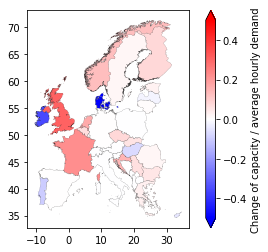

In [121]:
fig, ax = plt.subplots()
vmin, vmax, vcenter = plot_df['cap_diff'].min(), plot_df['cap_diff'].max(), 0
try:   
    norm = TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5) 
except:
    norm = TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)

cmap = 'bwr'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

plot=plot_df.plot(ax=ax,column='cap_diff', legend=False, figsize=[16,8],cmap=cmap,norm=norm,edgecolor='black',linewidth=0.1)

fig.colorbar(cbar, ax=ax, extend='both').set_label('Change of capacity / average hourly demand')

In [124]:
for scenario in ['+/-50%, Linear, National and Europe']:
    scenario_path=os.path.join('D:\\',capacity_scenarios[scenario])
    
    

    technologies=['wind_offshore', 'wind_onshore','roof_mounted_pv','open_field_pv']
    print('')
    print(scenario)
    for technology in technologies:

        if not os.path.exists(os.path.join(plot_path,analysis_name,'capacity_change',technology)):
            os.makedirs(os.path.join(plot_path,analysis_name,'capacity_change',technology))
        os.chdir(os.path.join(scenario_path,'baseline','model_csv_year_1'))

        energy_cap_baseline=pd.read_csv('results_energy_cap.csv')
        energy_demand_baseline=pd.read_csv('results_carrier_con.csv')
        energy_demand_baseline=energy_demand_baseline[energy_demand_baseline['techs']=='demand_elec']
        energy_demand_baseline=energy_demand_baseline.groupby('locs').sum()
        energy_cap_baseline_normalize=energy_cap_baseline.set_index('locs')
        #print(energy_cap_baseline_normalize['energy_cap']/energy_demand_baseline['carrier_con'])
        energy_cap_baseline_normalize['cap_per_demand_unit']=-1*energy_cap_baseline_normalize['energy_cap']/(energy_demand_baseline['carrier_con']/8760)
        energy_cap_baseline_normalize['average_demand']=(energy_demand_baseline['carrier_con']/8760)
        
        
        
        
                                                                                                                 
        os.chdir(os.path.join(scenario_path,'adjusted_costs','model_csv_year_6'))
        energy_cap_adjustment=pd.read_csv('results_energy_cap.csv')

        energy_cap_baseline=energy_cap_baseline.reset_index().replace({'techs':{'wind_onshore_competing':'wind_onshore','wind_onshore_monopoly':'wind_onshore'}}).groupby(['locs','techs'], as_index=False, sort=False).sum()
        energy_cap_adjustment=energy_cap_adjustment.reset_index().replace({'techs':{'wind_onshore_competing':'wind_onshore','wind_onshore_monopoly':'wind_onshore'}}).groupby(['locs','techs'], as_index=False,sort=False).sum()
        energy_cap_baseline=energy_cap_baseline[energy_cap_baseline['techs']==technology].reset_index().drop(columns=['index'])
        energy_cap_adjustment=energy_cap_adjustment[energy_cap_adjustment['techs']==technology].reset_index().drop(columns=['index'])
        energy_caps_countries=energy_cap_baseline
        energy_caps_countries['energy_cap_adjustment']=energy_cap_adjustment['energy_cap']
        energy_caps_countries=energy_caps_countries.rename(columns={'energy_cap':'energy_cap_baseline'})
        energy_caps_countries['factor']=energy_caps_countries['energy_cap_adjustment']/energy_caps_countries['energy_cap_baseline']
        energy_caps_countries['percent']=(energy_caps_countries['factor']-1)*100
        energy_caps_countries['cap_diff']=energy_caps_countries['energy_cap_adjustment']-energy_caps_countries['energy_cap_baseline']
        
        print(technology)
       
    
        # cmap = plt.cm.viridis
        cmap = plt.cm.seismic
        cmaplist = [cmap(i) for i in range(cmap.N)]
        # force the first color entry to be grey
        #cmaplist[0] = (.5, .5, .5, 1.0)



        # create the new map
        cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)

       

        energy_caps_countries=energy_caps_countries.rename(columns={'locs':'country_code'})
        plot_df=pd.merge(units, energy_caps_countries, on='country_code')
        plot_df['percent']=plot_df['percent'].fillna(0)

        
        if technology=='wind_onshore':

            normalized=energy_cap_baseline_normalize[energy_cap_baseline_normalize['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly'])]
            normalized['loc']=normalized.index
            normalized=normalized.groupby('loc').sum()
        else:
            normalized=energy_cap_baseline_normalize[energy_cap_baseline_normalize['techs']==technology]
        normalized['country_code']=normalized.index
        plot_df=pd.merge(plot_df, normalized, on=['country_code'])
        plot_df['diff_per_demand']=-1*plot_df['cap_diff']/(plot_df['average_demand'])
        print(plot_df)
        #order_of_magnitude=math.floor(math.log10(abs(energy_caps_countries['cap_diff'].mean())))



        #bounds = np.linspace(energy_caps_countries['cap_diff'].min(), energy_caps_countries['cap_diff'].max(), 11)
        #bounds = np.linspace(round(energy_caps_countries['cap_diff'].min(),abs(order_of_magnitude)), round(plot_df['cap_diff'].mean()+3*plot_df['cap_diff'].std(),abs(order_of_magnitude)), 11)
        #bounds = np.linspace(round(0-3*plot_df['cap_diff'].std(),abs(order_of_magnitude)), round(0+3*plot_df['cap_diff'].std(),abs(order_of_magnitude)), 11)
        clip_upper=plot_df['cap_diff'].mean()+3*plot_df['cap_diff'].std()
        fig, ax = plt.subplots()
        vmin, vmax, vcenter = plot_df['cap_diff'].min(), plot_df['cap_diff'].max(), 0
        try:   
            norm = TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5) 
        except:
            norm = TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)
           
        cmap = 'bwr'
        cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

        plot=plot_df.plot(ax=ax,column='cap_diff', legend=False, figsize=[16,8],cmap=cmap,norm=norm,edgecolor='black',linewidth=0.1)

        fig.colorbar(cbar, ax=ax, extend='both').set_label('Change of capacity in 100GW')


        print(plot_df)

        #plt.title('Capacity change of {} in 100 GW'.format(technology.replace("_", " ")))
        plt.savefig(os.path.join(plot_path,analysis_name,'capacity_change',technology,'absolute_change_'+capacity_scenarios[scenario]+'.png').format(technology), bbox_inches='tight',dpi=300)

        threshold=500

        vmin, vmax, vcenter = plot_df['percent'].min(), 500, 0
        norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)   
        cmap = 'bwr'
        cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

        #bounds = np.linspace(-500,500)
        fig, ax = plt.subplots()

        plot=plot_df.plot(ax=ax,column='percent', legend=False, figsize=[16,8], cmap=cmap,norm=norm,edgecolor='black',linewidth=0.1)#,norm=norm)
        #plt.title('Change of {}'.format(technology.replace("_", " ")))
        fig.colorbar(cbar, ax=ax, extend='max').set_label('Change of installed capacity in %')

        #fig.colorbar(cbar, ax=ax)

        ax.axis('off')
        plt.savefig(os.path.join(plot_path,analysis_name,'capacity_change',technology,'percentage_change_'+capacity_scenarios[scenario]+'.png').format(technology), bbox_inches='tight',dpi=300)
        plt.close('all')
        
#         


+/-50%, Linear, National and Europe
wind_offshore


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

wind_onshore


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

roof_mounted_pv


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

open_field_pv


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

   country_code   id                    name     type  proper  \
0           AUT  AUT                 Austria  country    True   
1           BEL  BEL                 Belgium  country    True   
2           BGR  BGR                Bulgaria  country    True   
3           HRV  HRV                 Croatia  country    True   
4           CYP  CYP                  Cyprus  country    True   
5           CZE  CZE                 Czechia  country    True   
6           DNK  DNK                 Denmark  country    True   
7           EST  EST                 Estonia  country    True   
8           FIN  FIN                 Finland  country    True   
9           FRA  FRA                  France  country    True   
10          DEU  DEU                 Germany  country    True   
11          GRC  GRC                  Greece  country    True   
12          HUN  HUN                 Hungary  country    True   
13          IRL  IRL                 Ireland  country    True   
14          ITA  ITA     

In [66]:
for technology in technologies:
    print(technology)
    
    if technology=='wind_onshore':
        plot_df=energy_cap_baseline_normalize[energy_cap_baseline_normalize['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly'])]
        #plot_df['loc']=plot_df.index
        plot_df=plot_df.groupby('locs').sum()
        
    else:
        plot_df=energy_cap_baseline_normalize[energy_cap_baseline_normalize['techs']==technology]
        
    plot_df['country_code']=plot_df.index
    plot_df=pd.merge(units, plot_df, on='country_code')
    print(plot_df['energy_cap'].max())
    if technology=='wind_onshore' or technology=='open_field_pv':
        vmin, vmax = plot_df['cap_per_demand_unit'].min(), plot_df['cap_per_demand_unit'].max()*0.05
    else:
        vmin, vmax = plot_df['cap_per_demand_unit'].min(), plot_df['cap_per_demand_unit'].max()*0.1
    #vmin, vmax = plot_df['energy_cap'].min(), plot_df['energy_cap'].max()*0.6
    vcenter=(vmax+vmin)/2
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)   
    cmap = 'Reds'
    cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

    #bounds = np.linspace(-500,500)
    fig, ax = plt.subplots()

    plot=plot_df.plot(ax=ax,column='cap_per_demand_unit', legend=False, figsize=[16,8], cmap=cmap,norm=norm,edgecolor='black',linewidth=0.1)#,norm=norm)
    #plt.title('Change of {}'.format(technology.replace("_", " ")))
    fig.colorbar(cbar, ax=ax, extend='max').set_label('Capacity normalized by average hourly demadn')

    #fig.colorbar(cbar, ax=ax)

    ax.axis('off')
    plt.savefig(os.path.join(plot_path,analysis_name,'capacity_change','baseline_cap_per_demand_unit_'+technology+'.png').format(technology), bbox_inches='tight',dpi=300)
    plt.close('all')
    #plt.savefig(os.path.join
    

wind_offshore
0.2632557904572536


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


wind_onshore
1.5000459013300733
roof_mounted_pv
0.0007832464752362


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


open_field_pv
1.4092647235012026


C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [57]:
vmax

0.0003916232376181

In [61]:
plot_df

,country_code,id,name,type,proper,geometry,techs,energy_cap,cap_per_demand_unit
0,AUT,AUT,Austria,country,True,"MULTIPOLYGON (((15.02098 49.02051, 15.03873 49...",open_field_pv,0.014127,0.197129
1,BEL,BEL,Belgium,country,True,"MULTIPOLYGON (((4.78082 51.50405, 4.78316 51.4...",open_field_pv,0.120121,1.211112
2,BGR,BGR,Bulgaria,country,True,"MULTIPOLYGON (((22.68341 44.20974, 22.69448 44...",open_field_pv,0.096765,2.252551
3,HRV,HRV,Croatia,country,True,"MULTIPOLYGON (((16.37005 46.54414, 16.39634 46...",open_field_pv,0.012862,0.663682
4,CYP,CYP,Cyprus,country,True,"MULTIPOLYGON (((34.57686 35.68168, 34.57320 35...",open_field_pv,0.002547,0.497064
5,CZE,CZE,Czechia,country,True,"MULTIPOLYGON (((14.33503 51.03969, 14.34494 51...",open_field_pv,0.020586,0.276773
6,DNK,DNK,Denmark,country,True,"MULTIPOLYGON (((10.03994 57.05941, 10.05421 57...",open_field_pv,0.010034,0.272151
7,EST,EST,Estonia,country,True,"MULTIPOLYGON (((25.71716 59.65421, 25.72565 59...",open_field_pv,0.001294,0.138561
8,FIN,FIN,Finland,country,True,"MULTIPOLYGON (((27.95961 70.09209, 27.97723 70...",open_field_pv,0.001074,0.011207
9,FRA,FRA,France,country,True,"MULTIPOLYGON (((2.56232 51.05903, 2.56600 51.0...",open_field_pv,0.094396,0.173074


In [21]:
# Comparison between two scnearios
scenario1='test_50per_incentive_00_negative'
scenario2='test_3ct_incentive_00_negative'


scenario_path1=os.path.join('D:\\',scenario1)
scenario_path2=os.path.join('D:\\',scenario2)




technologies=['wind_offshore', 'wind_onshore','roof_mounted_pv','open_field_pv']
technologies=['open_field_pv']

for technology in technologies:
    if not os.path.exists(os.path.join(plot_path,analysis_name,'capacity_change',technology)):
        os.makedirs(os.path.join(plot_path,analysis_name,'capacity_change',technology))
    os.chdir(os.path.join(scenario_path1,'adjusted_costs','model_csv_year_6'))

    energy_cap_baseline=pd.read_csv('results_energy_cap.csv')

    os.chdir(os.path.join(scenario_path2,'adjusted_costs','model_csv_year_6'))
    energy_cap_adjustment=pd.read_csv('results_energy_cap.csv')

    energy_cap_baseline=energy_cap_baseline.reset_index().replace({'techs':{'wind_onshore_competing':'wind_onshore','wind_onshore_monopoly':'wind_onshore'}}).groupby(['locs','techs'], as_index=False, sort=False).sum()
    energy_cap_adjustment=energy_cap_adjustment.reset_index().replace({'techs':{'wind_onshore_competing':'wind_onshore','wind_onshore_monopoly':'wind_onshore'}}).groupby(['locs','techs'], as_index=False,sort=False).sum()
    energy_cap_baseline=energy_cap_baseline[energy_cap_baseline['techs']==technology].reset_index().drop(columns=['index'])
    energy_cap_adjustment=energy_cap_adjustment[energy_cap_adjustment['techs']==technology].reset_index().drop(columns=['index'])
    energy_caps_countries=energy_cap_baseline
    energy_caps_countries['energy_cap_adjustment']=energy_cap_adjustment['energy_cap']
    energy_caps_countries=energy_caps_countries.rename(columns={'energy_cap':'energy_cap_baseline'})
    energy_caps_countries['factor']=energy_caps_countries['energy_cap_adjustment']/energy_caps_countries['energy_cap_baseline']
    energy_caps_countries['percent']=(energy_caps_countries['factor']-1)*100
    energy_caps_countries['cap_diff']=energy_caps_countries['energy_cap_adjustment']-energy_caps_countries['energy_cap_baseline']
    print(' ')
    print(technology)
    largest=energy_caps_countries['cap_diff'].nlargest(10)
    smallest=energy_caps_countries['cap_diff'].nsmallest(10)
    for i in largest.index:
        print(energy_caps_countries.loc[i])
    for i in smallest.index:
        print(energy_caps_countries.loc[i])

    # cmap = plt.cm.viridis
    cmap = plt.cm.seismic
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # force the first color entry to be grey
    #cmaplist[0] = (.5, .5, .5, 1.0)



    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)



    energy_caps_countries=energy_caps_countries.rename(columns={'locs':'country_code'})
    plot_df=pd.merge(units, energy_caps_countries, on='country_code')
    plot_df['percent']=plot_df['percent'].fillna(0)


    #print(plot_df)
    #order_of_magnitude=math.floor(math.log10(abs(energy_caps_countries['cap_diff'].mean())))



    #bounds = np.linspace(energy_caps_countries['cap_diff'].min(), energy_caps_countries['cap_diff'].max(), 11)
    #bounds = np.linspace(round(energy_caps_countries['cap_diff'].min(),abs(order_of_magnitude)), round(plot_df['cap_diff'].mean()+3*plot_df['cap_diff'].std(),abs(order_of_magnitude)), 11)
    #bounds = np.linspace(round(0-3*plot_df['cap_diff'].std(),abs(order_of_magnitude)), round(0+3*plot_df['cap_diff'].std(),abs(order_of_magnitude)), 11)
    clip_upper=plot_df['cap_diff'].mean()+3*plot_df['cap_diff'].std()
    #norm = mpl.colors.BoundaryNorm(bounds, cmap.N,clip=True)

    #plot=plot_df.plot(column='cap_diff', legend=True, figsize=[16,8],cmap=cmap,norm=norm,legend_kwds={"fmt": "{:.1f}"})



    #plot=plot_df.plot(column='cap_diff', legend=True, figsize=[16,8],cmap=cmap,k=11,norm=norm,legend_kwds={"fmt": "{:.1f}"})

    #plt.title('Capacity change of {} in 100 GW'.format(technology.replace("_", " ")))
    #plt.savefig('Capacity change {}.png'.format(technology), dpi=300)

    threshold=500

    vmin, vmax, vcenter = plot_df['percent'].min(), 500, 0
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)   
    cmap = 'bwr'
    cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

    #bounds = np.linspace(-500,500)
    fig, ax = plt.subplots()

    plot=plot_df.plot(ax=ax,column='percent', legend=False, figsize=[16,8], cmap=cmap,norm=norm,edgecolor='black',linewidth=0.1)#,norm=norm)
    #plt.title('Change of {}'.format(technology.replace("_", " ")))
    fig.colorbar(cbar, ax=ax, extend='max').set_label('Change of installed capacity in %')

    #fig.colorbar(cbar, ax=ax)

    ax.axis('off')
    plt.savefig(os.path.join(plot_path,analysis_name,'capacity_change',technology,'percentage_change.png').format(technology), bbox_inches='tight',dpi=300)
    plt.close('all')
    
    vmin, vmax, vcenter = plot_df['cap_diff'].min()*0.7, plot_df['cap_diff'].max()*0.7, 0
    #vmin, vmax, vcenter =-0.4, 0.4, 0
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)   
    cmap = 'bwr'
    cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    fig, ax = plt.subplots()

    plot=plot_df.plot(ax=ax,column='cap_diff', legend=False, figsize=[16,8], cmap=cmap,norm=norm,edgecolor='black',linewidth=0.1)#,norm=norm)
    #plt.title('Change of {}'.format(technology.replace("_", " ")))
    fig.colorbar(cbar, ax=ax, extend='both').set_label('Change of installed capacity in 100GW')

    #fig.colorbar(cbar, ax=ax)

    ax.axis('off')
    plt.savefig(os.path.join(plot_path,analysis_name,'capacity_change',technology+'capacity_change.png').format(technology), bbox_inches='tight',dpi=300)
    plt.close('all')
    
    
    

 
open_field_pv
level_0                            309
locs                               HRV
techs                    open_field_pv
energy_cap_baseline           0.232429
energy_cap_adjustment         1.131566
factor                        4.868436
percent                     386.843551
cap_diff                      0.899137
Name: 16, dtype: object
level_0                             52
locs                               BEL
techs                    open_field_pv
energy_cap_baseline           0.213445
energy_cap_adjustment          0.28877
factor                        1.352898
percent                       35.28985
cap_diff                      0.075324
Name: 2, dtype: object
level_0                            521
locs                               PRT
techs                    open_field_pv
energy_cap_baseline           0.160357
energy_cap_adjustment         0.215912
factor                        1.346444
percent                      34.644425
cap_diff                      0.055555
N

In [122]:
energy_caps_countries[energy_caps_countries['techs']=='wind_onshore_competing']['energy_cap_baseline'].sum()

0.0

In [382]:
scenario_path1=os.path.join('D:\\',scenario1)

os.chdir(os.path.join(scenario_path1,'adjusted_costs','model_csv_year_6'))

energy_cap_baseline=pd.read_csv('results_energy_cap.csv').groupby(['techs']).sum()
transmission_cap_baseline=pd.read_csv('results_energy_cap.csv')
transmission_cap_baseline=transmission_cap_baseline[transmission_cap_baseline['techs'].str.contains('transmission')]
os.chdir(os.path.join(scenario_path1,'baseline','model_csv_year_1'))
energy_cap_adjustment=pd.read_csv('results_energy_cap.csv').groupby(['techs']).sum()
transmission_cap_adjustment=pd.read_csv('results_energy_cap.csv')
transmission_cap_adjustment=transmission_cap_adjustment[transmission_cap_adjustment['techs'].str.contains('transmission')]

In [383]:
transmission_cap_baseline['energy_cap'].sum()

5.259210574929153

In [384]:
transmission_cap_adjustment['energy_cap'].sum()

8.270506778175328

In [145]:
scenario_path1

'D:\\test_50per_incentive_00_negative'

In [131]:
energy_cap_baseline

,energy_cap
techs,
ac_transmission:ALB,0.025882
ac_transmission:AUT,0.198657
ac_transmission:BEL,0.106412
ac_transmission:BGR,0.018680
ac_transmission:BIH,0.036230
ac_transmission:CHE,0.172588
ac_transmission:CYP,0.062844
ac_transmission:CZE,0.137123
ac_transmission:DEU,0.646768


In [134]:
energy_cap_adjustment

,energy_cap
techs,
ac_transmission:ALB,0.035592
ac_transmission:AUT,0.448948
ac_transmission:BEL,0.136172
ac_transmission:BGR,0.034735
ac_transmission:BIH,0.052678
ac_transmission:CHE,0.143537
ac_transmission:CYP,0.020680
ac_transmission:CZE,0.103871
ac_transmission:DEU,0.644798


<AxesSubplot:>

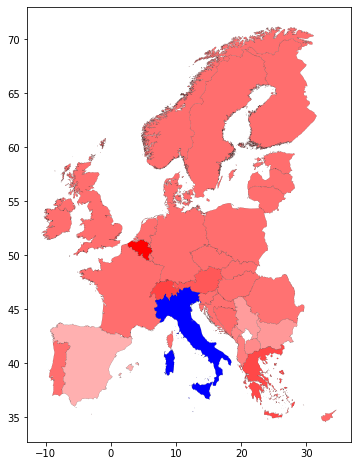

In [62]:
plot_df.plot(column='cap_diff', legend=Fals, figsize=[16,8], cmap=cmap,edgecolor='black',linewidth=0.1)

In [64]:
plot_df

,country_code,id,name,type,proper,geometry,level_0,techs,energy_cap_baseline,energy_cap_adjustment,factor,percent,cap_diff
0,AUT,AUT,Austria,country,True,"MULTIPOLYGON (((15.02098 49.02051, 15.03873 49...",33,open_field_pv,0.014127,0.046485,3.290518,229.051768,0.032358
1,BEL,BEL,Belgium,country,True,"MULTIPOLYGON (((4.78082 51.50405, 4.78316 51.4...",52,open_field_pv,0.120121,0.286412,2.384356,138.435613,0.166291
2,BGR,BGR,Bulgaria,country,True,"MULTIPOLYGON (((22.68341 44.20974, 22.69448 44...",70,open_field_pv,0.096765,0.034007,0.351436,-64.856361,-0.062758
3,HRV,HRV,Croatia,country,True,"MULTIPOLYGON (((16.37005 46.54414, 16.39634 46...",309,open_field_pv,0.012862,0.009469,0.736176,-26.382429,-0.003393
4,CYP,CYP,Cyprus,country,True,"MULTIPOLYGON (((34.57686 35.68168, 34.57320 35...",120,open_field_pv,0.002547,0.011885,4.666954,366.695357,0.009338
5,CZE,CZE,Czechia,country,True,"MULTIPOLYGON (((14.33503 51.03969, 14.34494 51...",138,open_field_pv,0.020586,0.020569,0.999156,-0.084423,-0.000017
6,DNK,DNK,Denmark,country,True,"MULTIPOLYGON (((10.03994 57.05941, 10.05421 57...",182,open_field_pv,0.010034,0.010014,0.998070,-0.192979,-0.000019
7,EST,EST,Estonia,country,True,"MULTIPOLYGON (((25.71716 59.65421, 25.72565 59...",214,open_field_pv,0.001294,0.001664,1.285810,28.581000,0.000370
8,FIN,FIN,Finland,country,True,"MULTIPOLYGON (((27.95961 70.09209, 27.97723 70...",231,open_field_pv,0.001074,0.001067,0.993820,-0.617978,-0.000007
9,FRA,FRA,France,country,True,"MULTIPOLYGON (((2.56232 51.05903, 2.56600 51.0...",252,open_field_pv,0.094396,0.094410,1.000154,0.015353,0.000014


## System Resilience 2010-2015

In [34]:
resilience_scenarios=investigated_scenarios
plot_path=r'C:\Users\Nikla\polybox\Master Thesis\Figures'
data_path=r'C:\Users\Nikla\polybox\Master Thesis\Data'

In [28]:
resilience_scenarios

{'+/-50%, 0% autarky': 'test_50per_incentive_00_negative',
 '+/-50%, 50% autarky': 'test_50per_incentive_50_negative',
 '+/-50%, 95% autarky': 'test_50per_incentive_95_negative'}

In [187]:
analysis_name='Histogram tests'
investigated_scenarios={'+/-50% Europe & National':'test_50per_incentive_00_negative'}

Adjustment VRE share:  0.6029925582672233
Adjustment hydro share:  0.13789509986717408
Adjustment nuclear share:  0.1507634361335244
Adjustment biomass share:  0.10834890573207831
Baseline VRE share:  0.6209627343149213
Baseline hydro share:  0.14350483075632883
Baseline nuclear share:  0.1693951182565865
Baseline biomass share:  0.06613731667216341
SD Adjustment:  0.024238024676595745
SD Baseline:  0.1816452663176767
Adjustment min:  1.468080336659329e-11
Baseline min 3.722285438320823e-10


<Figure size 1296x432 with 0 Axes>

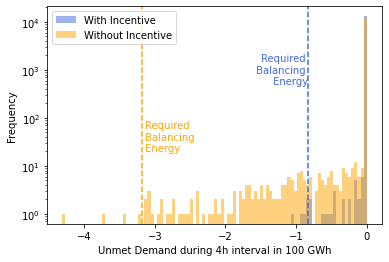

Balancing energy adjusted:  -0.8234805823727901
Balancing energy baseline:  -3.186378898885058
                        adjusted      baseline
+/-50%, 0% autarky  15180.260338  15990.502447
Adjustment VRE share:  0.6048533014560626
Adjustment hydro share:  0.13770231918177192
Adjustment nuclear share:  0.14591640461330307
Adjustment biomass share:  0.11152797474886227
Baseline VRE share:  0.6147703384956045
Baseline hydro share:  0.14329697639102043
Baseline nuclear share:  0.17049469331342715
Baseline biomass share:  0.0714379917999479
SD Adjustment:  0.01998618591651474
SD Baseline:  0.17100538910903665
Adjustment min:  6.9635199841620865e-12
Baseline min 4.991537376074825e-06


<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

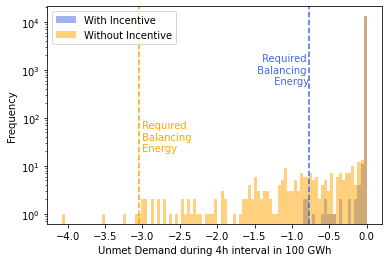

Balancing energy adjusted:  -0.7667450797994517
Balancing energy baseline:  -3.0482402413785463
                         adjusted      baseline
+/-50%, 0% autarky   15180.260338  15990.502447
+/-50%, 50% autarky  14337.508682   16005.40847
Adjustment VRE share:  0.6076692948967036
Adjustment hydro share:  0.1366681080219187
Adjustment nuclear share:  0.14408137308276353
Adjustment biomass share:  0.11158122399861448
Baseline VRE share:  0.6225724882361031
Baseline hydro share:  0.14007974441112803
Baseline nuclear share:  0.16050286224236698
Baseline biomass share:  0.07684490511040185
SD Adjustment:  0.005573068061829349
SD Baseline:  0.08861636844748985
Adjustment min:  7.101085896328487e-11
Baseline min 4.6079313761470016e-10


<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

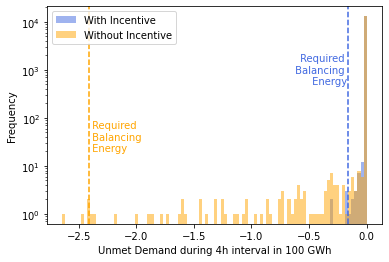

Balancing energy adjusted:  -0.16556104858486878
Balancing energy baseline:  -2.415023567505628
                         adjusted      baseline
+/-50%, 0% autarky   15180.260338  15990.502447
+/-50%, 50% autarky  14337.508682   16005.40847
+/-50%, 95% autarky  13905.542908  12982.421518


<Figure size 1296x432 with 0 Axes>

In [30]:
if not os.path.exists(os.path.join(plot_path,analysis_name,'unmet_demand_hist')):
    os.makedirs(os.path.join(plot_path,analysis_name,'unmet_demand_hist'))

curtailment_df=pd.DataFrame(columns=['adjusted','baseline'])
for scenario in resilience_scenarios.keys():
#for scenario in ['+/-50%, Linear, Europe']:
    operation_path=os.path.join(r'D:\\',resilience_scenarios[scenario],'Operation')
    if not os.path.exists(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario])):
        os.makedirs(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario]))

    residual_load_total=pd.DataFrame(columns=['adjusted','baseline'])
    a=[]
    carrier_prod_VRE=pd.DataFrame()
    carrier_prod_total=pd.DataFrame()


    res_adjustment_six_years=pd.DataFrame()
    res_baseline_six_years=pd.DataFrame()
    
    carrier_cf_adjustment=pd.DataFrame()
    carrier_cf_baseline=pd.DataFrame()
    #
    os.chdir(os.path.join('D:\\',resilience_scenarios[scenario],'Operation','adjusted_costs','model_csv_year_2010'))
    inheritance=pd.read_csv('inputs_inheritance.csv')

    supply=inheritance[inheritance['inheritance'].str.contains("supply")]
    supply_list=supply['techs'].tolist()

    carrier_prod_VRE=0
    carrier_prod_hydro=0
    carrier_prod_nuclear=0
    carrier_prod_biofuel=0

    carrier_prod_total=0

    curtailment_baseline=0
    curtailment_adjusted=0

    for file in os.listdir(os.path.join(operation_path,'adjusted_costs')):
        os.chdir(os.path.join('D:\\',resilience_scenarios[scenario],'Operation','adjusted_costs',file))

        carrier_prod_curtailment=pd.read_csv('results_carrier_prod.csv')
        carrier_prod_curtailment=carrier_prod_curtailment.drop(['carriers'],axis=1)
        
        carrier_potential=carrier_prod_curtailment.set_index(['locs','techs','timesteps'])
        
        carrier_prod_curtailment=carrier_prod_curtailment.groupby(['locs','techs']).sum()
    

        carrier_cf=pd.read_csv('inputs_resource.csv')
        carrier_cf=carrier_cf[carrier_cf['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly','wind_offshore',
                                             'roof_mounted_pv','open_field_pv'])]
        energy_cap_curtailment=pd.read_csv('results_energy_cap.csv')

        carrier_cf=carrier_cf.groupby(['locs','techs']).sum()
        energy_cap_curtailment=energy_cap_curtailment.set_index(['locs','techs'])#

        carrier_cf=carrier_cf.merge(energy_cap_curtailment, how='left',on=['locs','techs'])
        carrier_cf=carrier_cf.merge(carrier_prod_curtailment, how='left',on=['locs','techs'])

        carrier_cf['potential']=carrier_cf['resource']*carrier_cf['energy_cap']

        carrier_cf['curtailment']=carrier_cf['potential']-carrier_cf['carrier_prod']


        curtailment_adjusted+=carrier_cf['curtailment'].sum()

   

        carrier_prod=pd.read_csv('results_carrier_prod.csv')
        #carrier_prod=carrier_prod[~carrier_prod['techs'].str.contains("transmission")]

        #carrier_prod_total=carrier_prod_total.append(carrier_prod)
        #carrier_prod=carrier_prod[carrier_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv','roof_mounted_pv'])]
        carrier_prod_VRE+=carrier_prod[carrier_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv','roof_mounted_pv'])]['carrier_prod'].sum()
        carrier_prod_hydro+=carrier_prod[carrier_prod['techs'].isin(['hydro_reservoir','hydro_run_of_river'])]['carrier_prod'].sum()
        carrier_prod_nuclear+=carrier_prod[carrier_prod['techs'].isin(['nuclear'])]['carrier_prod'].sum()
        carrier_prod_biofuel+=carrier_prod[carrier_prod['techs'].isin(['biofuel'])]['carrier_prod'].sum()

        carrier_prod_total+=carrier_prod[carrier_prod['techs'].isin(supply_list)]['carrier_prod'].sum()




        carrier_con=pd.read_csv('results_carrier_con.csv')
        #carrier_con=carrier_con[carrier_con['techs']=='demand_elec']
        #print('adjusted demand: ', carrier_con[carrier_con['techs']=='demand_elec']['carrier_con'].max())
        carrier_adjustment_sample=carrier_con[carrier_con['techs']=='demand_elec']
        time_steps=pd.read_csv('inputs_timestep_resolution.csv')

        electricity_net=pd.DataFrame()
        electricity_net=carrier_prod.groupby(['locs','techs','timesteps']).sum().add(carrier_con.groupby(['locs','techs','timesteps']).sum(),fill_value=0).reset_index()
        electricity_net=electricity_net.fillna(0)
        electricity_net['residual']=electricity_net['carrier_prod']+electricity_net['carrier_con']
        residual_load_adjustment=electricity_net.groupby(['locs','timesteps']).sum().reset_index()

        res_load_adjustment_europe=residual_load_adjustment.groupby('timesteps').sum()
        #print(res_load_adjustment_europe['residual'])
        #residual_load_total['adjusted']=residual_load_total['adjusted'].append(res_load_adjustment_europe['residual'])
        #print(res_load_adjustment_europe.min())

        carrier_cf_adjustment=carrier_cf_adjustment.append(carrier_cf)
        
        res_adjustment_six_years=res_adjustment_six_years.append(res_load_adjustment_europe)

        a.append(res_load_adjustment_europe['residual'].tolist())
    flat_list_adjustment = [item for sublist in a for item in sublist]
    res_adjustment_six_years.to_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'adjustment'))
    
    carrier_cf_adjustment.to_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'carrier_cf_adjustment.pickle'))
    #residual_load_total['adjusted']=a.T.sum(axis=1)   
    #print('VRE production energy in adjusted costs scenario',carrier_prod_VRE['carrier_prod'].sum(),' in 100GWh')
    print('Adjustment VRE share: ',carrier_prod_VRE/carrier_prod_total)
    print('Adjustment hydro share: ',carrier_prod_hydro/carrier_prod_total)
    print('Adjustment nuclear share: ',carrier_prod_nuclear/carrier_prod_total)
    print('Adjustment biomass share: ',carrier_prod_biofuel/carrier_prod_total)



    a=[]
    carrier_prod_VRE=pd.DataFrame()
    carrier_prod_total=pd.DataFrame()

    carrier_prod_VRE=0
    carrier_prod_hydro=0
    carrier_prod_nuclear=0
    carrier_prod_biofuel=0

    carrier_prod_total=0
    for file in os.listdir(os.path.join(operation_path,'baseline')):
        os.chdir(os.path.join('D:\\',resilience_scenarios[scenario],'Operation','baseline',file))


        carrier_prod_curtailment=pd.read_csv('results_carrier_prod.csv')
        carrier_prod_curtailment=carrier_prod_curtailment.drop(['carriers'],axis=1)
        carrier_prod_curtailment=carrier_prod_curtailment.groupby(['locs','techs']).sum()


        carrier_cf=pd.read_csv('inputs_resource.csv')
        carrier_cf=carrier_cf[carrier_cf['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly','wind_offshore',
                                             'roof_mounted_pv','open_field_pv'])]
        energy_cap_curtailment=pd.read_csv('results_energy_cap.csv')

        carrier_cf=carrier_cf.groupby(['locs','techs']).sum()
        energy_cap_curtailment=energy_cap_curtailment.set_index(['locs','techs'])#

        carrier_cf=carrier_cf.merge(energy_cap_curtailment, how='left',on=['locs','techs'])
        carrier_cf=carrier_cf.merge(carrier_prod_curtailment, how='left',on=['locs','techs'])

        carrier_cf['potential']=carrier_cf['resource']*carrier_cf['energy_cap']

        carrier_cf['curtailment']=carrier_cf['potential']-carrier_cf['carrier_prod']


        curtailment_baseline+=carrier_cf['curtailment'].sum()

        
        carrier_prod=pd.read_csv('results_carrier_prod.csv')
        #carrier_prod=carrier_prod[~carrier_prod['techs'].str.contains("transmission")]


        #carrier_prod_total=carrier_prod_total.append(carrier_prod)


        carrier_prod_VRE+=carrier_prod[carrier_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv','roof_mounted_pv'])]['carrier_prod'].sum()
        carrier_prod_hydro+=carrier_prod[carrier_prod['techs'].isin(['hydro_reservoir','hydro_run_of_river'])]['carrier_prod'].sum()
        carrier_prod_nuclear+=carrier_prod[carrier_prod['techs'].isin(['nuclear'])]['carrier_prod'].sum()
        carrier_prod_biofuel+=carrier_prod[carrier_prod['techs'].isin(['biofuel'])]['carrier_prod'].sum()

        carrier_prod_total+=carrier_prod[carrier_prod['techs'].isin(supply_list)]['carrier_prod'].sum()

        #carrier_prod=carrier_prod[carrier_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv','roof_mounted_pv'])]
        #carrier_prod_VRE=carrier_prod_VRE.append(carrier_prod)

        carrier_con=pd.read_csv('results_carrier_con.csv')
        #carrier_con=carrier_con[carrier_con['techs']=='demand_elec']
        #print('baseline demand: ', carrier_con[carrier_con['techs']=='demand_elec']['carrier_con'].max())
        carrier_baseline_sample=carrier_con[carrier_con['techs']=='demand_elec']
        time_steps=pd.read_csv('inputs_timestep_resolution.csv')

        electricity_net=pd.DataFrame()
        electricity_net=carrier_prod.groupby(['locs','techs','timesteps']).sum().add(carrier_con.groupby(['locs','techs','timesteps']).sum(),fill_value=0).reset_index()
        electricity_net=electricity_net.fillna(0)
        electricity_net['residual']=electricity_net['carrier_prod']+electricity_net['carrier_con']
        residual_load_baseline=electricity_net.groupby(['locs','timesteps']).sum().reset_index()

        res_load_baseline_europe=residual_load_baseline.groupby('timesteps').sum()

        res_baseline_six_years=res_baseline_six_years.append(res_load_baseline_europe)
        
        carrier_cf_baseline=carrier_cf_baseline.append(carrier_cf)
        #print(res_load_adjustment_europe['residual'])
        #residual_load_total['adjusted']=residual_load_total['adjusted'].append(res_load_adjustment_europe['residual'])
        #print(res_load_baseline_europe.min())
        a.append(res_load_baseline_europe['residual'].tolist())
    res_baseline_six_years.to_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'baseline'))
    carrier_cf_baseline.to_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'carrier_cf_baseline.pickle'))
    flat_list_baseline = [item for sublist in a for item in sublist]

    residual_load_total= pd.DataFrame(list(zip(flat_list_adjustment, flat_list_baseline)), columns = ['adjusted', 'baseline'])

    print('Baseline VRE share: ',carrier_prod_VRE/carrier_prod_total)
    print('Baseline hydro share: ',carrier_prod_hydro/carrier_prod_total)
    print('Baseline nuclear share: ',carrier_prod_nuclear/carrier_prod_total)
    print('Baseline biomass share: ',carrier_prod_biofuel/carrier_prod_total)
    #residual_load_total['baseline']=a.T.sum(axis=1)   


    df_hist=pd.DataFrame()
    df_hist['With Incentive']=residual_load_adjustment['residual']
    df_hist['Without Incentive']=residual_load_baseline['residual']
    #print('Scenario: ', scenario)
    print('SD Adjustment: ', residual_load_total['adjusted'].std())
    print('SD Baseline: ', residual_load_total['baseline'].std())

    print('Adjustment min: ', residual_load_total['adjusted'].max())
    print('Baseline min', residual_load_total['baseline'].max())

    #if not os.path.exists(os.path.join(plot_path,'production_histograms')):
    #    os.makedirs(os.path.join(plot_path,'production_histograms'))
    #fig,ax = plt.subplots()
    
    adjustment_balancing=res_adjustment_six_years['residual'].quantile(.00025)
    baseline_balancing=res_baseline_six_years['residual'].quantile(.00025)
    #residual_load_total=(residual_load_total-residual_load_total.mean())/residual_load_total.std()
    #residual_load_total=(residual_load_total-residual_load_total.mean())/residual_load_total.std()
    residual_load_total=residual_load_total.rename(columns={'adjusted':'With Incentive','baseline':'Without Incentive'})
    plt.figure(figsize=(18,6))
    ax=residual_load_total.plot.hist(bins=100,alpha=0.5,color=['royalblue','orange'])
    ax.legend(loc='upper left')
    plt.axvline(x=adjustment_balancing,  c='royalblue', linestyle='--')
    plt.axvline(x=baseline_balancing,  c='orange', linestyle='--')

    plt.text(adjustment_balancing,500,' Required \n Balancing \n Energy',color='royalblue',horizontalalignment='right')
    plt.text(baseline_balancing,20,' Required \n Balancing \n Energy',color='orange')

    #plt.title('Unmet demand for 2010-2015 weather & demand years')
    plt.xlabel('Unmet Demand during 4h interval in 100 GWh')
    plt.yscale('log', nonpositive='clip')
    plt.savefig(os.path.join(plot_path,analysis_name,'unmet_demand_hist',resilience_scenarios[scenario]+'_residual_load.png'), dpi=300)
    plt.show()

    plt.figure(figsize=(18,6))
    
    curtailment_df.loc[scenario,'adjusted']=curtailment_adjusted
    curtailment_df.loc[scenario,'baseline']=curtailment_baseline
    print('Balancing energy adjusted: ',adjustment_balancing )
    print('Balancing energy baseline: ',baseline_balancing )
    print(curtailment_df)

In [238]:

    
for scenario in resilience_scenarios.keys():
    operation_path=os.path.join(r'D:\\',resilience_scenarios[scenario],'Operation')
    if not os.path.exists(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario])):
        os.makedirs(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario]))

    


    storage_adjustment_six_years=pd.DataFrame()
    storage_baseline_six_years=pd.DataFrame()
    

    for file in os.listdir(os.path.join(operation_path,'adjusted_costs')):
        os.chdir(os.path.join('D:\\',resilience_scenarios[scenario],'Operation','adjusted_costs',file))


        
        storage_level=pd.read_csv('results_storage.csv')
        storage_level=storage_level[~storage_level['techs'].isin(['biofuel','hydro_reservoir'])]
        storage_level=storage_level.groupby(['timesteps','techs']).sum()
        
        
        storage_adjustment_six_years=storage_adjustment_six_years.append(storage_level)
    storage_adjustment_six_years.to_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'storage_adjustment'))

    
for scenario in resilience_scenarios.keys():
    operation_path=os.path.join(r'D:\\',resilience_scenarios[scenario],'Operation')
    

    

    for file in os.listdir(os.path.join(operation_path,'baseline')):
        os.chdir(os.path.join('D:\\',resilience_scenarios[scenario],'Operation','baseline',file))


        
        storage_level=pd.read_csv('results_storage.csv')
        storage_level=storage_level[~storage_level['techs'].isin(['biofuel','hydro_reservoir'])]
        storage_level=storage_level.groupby(['timesteps','techs']).sum()
        
        
        storage_baseline_six_years=storage_baseline_six_years.append(storage_level)
    storage_baseline_six_years.to_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'storage_baseline'))
        
    




In [31]:
os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'adjustment')

'C:\\Users\\Nikla\\polybox\\Master Thesis\\Data\\50per vs 3ct\\unmet_demand\\test_3ct_incentive_00_negative\\adjustment'

In [27]:
scenario

'Premium & Penalty 3ct LCOE'

In [26]:
storage_adjustment_six_years.loc['2011-01-15 16:00:00','storage']

39.23001302787304

In [75]:
res_adjustment_six_years['residual'].nsmallest(10)

timesteps
2013-01-15 16:00:00   -1.502007
2013-01-15 12:00:00   -1.465492
2013-01-16 08:00:00   -1.191724
2010-12-21 12:00:00   -1.170169
2013-01-15 08:00:00   -1.165939
2010-12-21 16:00:00   -1.160550
2015-01-22 12:00:00   -1.030918
2013-01-23 16:00:00   -0.953038
2015-01-22 16:00:00   -0.926821
2015-01-19 16:00:00   -0.925097
Name: residual, dtype: float64

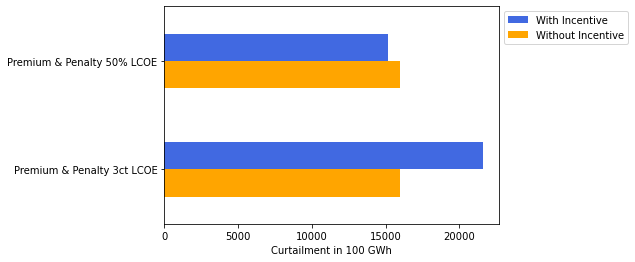

In [191]:
curtailment_df=curtailment_df.rename(columns={'adjusted':'With Incentive','baseline':'Without Incentive'})
fig, ax = plt.subplots()
curtailment_df.plot.barh(ax=ax,color=['royalblue','orange'])
ax.legend(bbox_to_anchor= (1.4, 1))
plt.gca().invert_yaxis()
plt.xlabel('Curtailment in 100 GWh')
plt.savefig(os.path.join(plot_path,analysis_name,'unmet_demand_hist','curtailment.png'), dpi=300,bbox_inches = 'tight')

In [148]:
curtailment_df

,With Incentive,Without Incentive
Premium & Penalty 50% LCOE,15180.260338,15990.502447
Premium & Penalty 3ct LCOE,21615.870541,15990.502447


In [10]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

<Figure size 1296x432 with 0 Axes>

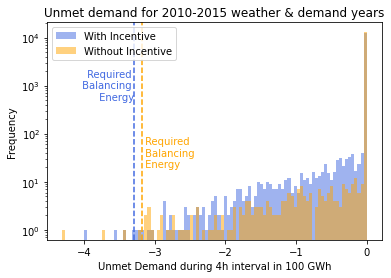

In [95]:
unmet_demand_adjustment=pd.read_pickle(r'C:\Users\Nikla\polybox\Master Thesis\Data\incentive schemes\unmet_demand\test_50per_incentive_00_negative_europe/adjustment')
unmet_demand_baseline=pd.read_pickle(r'C:\Users\Nikla\polybox\Master Thesis\Data\incentive schemes\unmet_demand\test_50per_incentive_00_negative_europe/baseline')
residual_load_total=pd.DataFrame(columns = ['adjusted', 'baseline'])
residual_load_total['adjusted']=unmet_demand_adjustment['residual'].to_list()
residual_load_total['baseline']=unmet_demand_baseline['residual'].to_list()


adjustment_balancing=unmet_demand_adjustment['residual'].quantile(.00025)
baseline_balancing=unmet_demand_baseline['residual'].quantile(.00025)


#residual_load_total=(residual_load_total-residual_load_total.mean())/residual_load_total.std()
residual_load_total=residual_load_total.rename(columns={'adjusted':'With Incentive','baseline':'Without Incentive'})
plt.figure(figsize=(18,6))
ax=residual_load_total.plot.hist(bins=100,alpha=0.5,color=['royalblue','orange'])
ax.legend(loc='upper left')
plt.axvline(x=adjustment_balancing,  c='royalblue', linestyle='--')
plt.axvline(x=baseline_balancing,  c='orange', linestyle='--')

plt.text(adjustment_balancing,500,' Required \n Balancing \n Energy',color='royalblue',horizontalalignment='right')
plt.text(baseline_balancing,20,' Required \n Balancing \n Energy',color='orange')

plt.title('Unmet demand for 2010-2015 weather & demand years')
plt.xlabel('Unmet Demand during 4h interval in 100 GWh')
plt.yscale('log', nonpositive='clip')

In [61]:
unmet_demand_adjustment=pd.read_pickle(r'C:\Users\Nikla\polybox\Master Thesis\Data\incentive schemes\unmet_demand\test_50per_incentive_00_negative/adjustment')
unmet_demand_baseline=pd.read_pickle(r'C:\Users\Nikla\polybox\Master Thesis\Data\incentive schemes\unmet_demand\test_50per_incentive_00_negative/baseline')
residual_load_total=pd.DataFrame(columns = ['adjusted', 'baseline'])
residual_load_total['adjusted']=unmet_demand_adjustment['residual'].to_list()
residual_load_total['baseline']=unmet_demand_baseline['residual'].to_list()


In [37]:
unmet_demand_adjustement=pd.read_pickle(comparison_path1)
unmet_demand_adjustement

,carrier_con,carrier_prod,residual
timesteps,,,
2011-01-01 00:00:00,-31.062910,31.062910,5.687528e-14
2011-01-01 04:00:00,-30.449029,30.449029,7.072901e-15
2011-01-01 08:00:00,-33.149673,33.149673,-8.182268e-14
2011-01-01 12:00:00,-32.986032,32.986032,-9.944628e-14
2011-01-01 16:00:00,-32.988569,32.988569,-3.645201e-14
...,...,...,...
2012-12-31 04:00:00,-31.100440,31.100440,-1.227089e-14
2012-12-31 08:00:00,-34.533712,34.533712,-8.167187e-15
2012-12-31 12:00:00,-34.123335,34.123335,-3.746000e-15


## Compare extreme events

In [5]:
scenario='test_50per_incentive_00_negative'
data_path=r'C:\Users\Nikla\polybox\Master Thesis\Data'
VRE_generation_techs=['open_field_pv','roof_mounted_pv','wind_offshore','wind_onshore_competing','wind_onshore_monopoly','battery','hydrogen']
region_dict={'Southeast Europe':['ALB','BIH','BGR','MNE','MKD','GRC','HRV','ROU','SRB','CYP','ITA'],'Iberia':['PRT','ESP'],'Western Europe':
            ['FRA','IRL','GBR','NLD','BEL','LUX'],'Central Europe':['DEU','CHE','AUT','POL','CZE','SVK','SVN','HUN','DNK'],
            'Northern Europe':['NOR','SWE','FIN','EST','LVA','LTU']}

In [6]:
inv_region_dict = {}
for k,v in region_dict.items():
    for x in v:
        inv_region_dict[x]=k

In [4]:
#read weather regimes
import netCDF4 as nc
import xarray as xr
ds = xr.open_dataset(r'C:\Users\Nikla\polybox\Master Thesis\Data\wr_time.nc')
weather_regimes = ds.to_dataframe()
weather_regimes = weather_regimes.loc['2010-01-01':'2015-12-31']

In [211]:
weather_regimes

,wr
time,
2010-01-01,2
2010-01-02,2
2010-01-03,2
2010-01-04,2
2010-01-05,2
...,...
2015-12-27,5
2015-12-28,5
2015-12-29,5


In [9]:
scenario1='test_50per_incentive_00_negative'
scenario2='test_3ct_incentive_00_negative'
comparison_path1=os.path.join(data_path,analysis_name,'unmet_demand','test_50per_incentive_00_negative','adjustment')
comparison_path2=os.path.join(data_path,analysis_name,'unmet_demand','test_3ct_incentive_00_negative','adjustment')

storage_path1=os.path.join(data_path,analysis_name,'unmet_demand','test_50per_incentive_00_negative','storage_adjustment')
storage_path2=os.path.join(data_path,analysis_name,'unmet_demand','test_3ct_incentive_00_negative','storage_adjustment')


In [111]:
energy_cap1=pd.read_csv(os.path.join(r'D:\\',scenario1,'adjusted_costs','model_csv_year_6','results_energy_cap.csv'))
#energy_cap1=energy_cap1[energy_cap1['techs'].isin(VRE_generation_techs)]

energy_cap1=energy_cap1[~energy_cap1['techs'].str.contains('transmission')]


energy_cap2=pd.read_csv(os.path.join(r'D:\\',scenario2,'adjusted_costs','model_csv_year_6','results_energy_cap.csv'))
#energy_cap2=energy_cap2[energy_cap2['techs'].isin(VRE_generation_techs)]

energy_cap2=energy_cap2[~energy_cap2['techs'].str.contains('transmission')]

energy_cap1=energy_cap1.set_index('locs')
energy_cap2=energy_cap2.set_index('locs')

energy_cap1['region']='region'
energy_cap2['region']='region'
for i in energy_cap1.index:
    for key in region_dict:
        if i in region_dict[key]:
            energy_cap1.loc[i,'region']=key
            energy_cap2.loc[i,'region']=key
#energy_cap1=energy_cap1.groupby(['region','techs']).sum()
#energy_cap2=energy_cap2.groupby(['region','techs']).sum()

energy_cap1=energy_cap1.groupby(['locs','techs']).sum()
energy_cap2=energy_cap2.groupby(['locs','techs']).sum()

In [189]:
transmission_cap1=pd.read_csv(os.path.join(r'D:\\',scenario1,'adjusted_costs','model_csv_year_6','results_energy_cap.csv'))
#energy_cap1=energy_cap1[energy_cap1['techs'].isin(VRE_generation_techs)]

transmission_cap1=transmission_cap1[transmission_cap1['techs'].str.contains('transmission')]


transmission_cap2=pd.read_csv(os.path.join(r'D:\\',scenario2,'adjusted_costs','model_csv_year_6','results_energy_cap.csv'))
#energy_cap2=energy_cap2[energy_cap2['techs'].isin(VRE_generation_techs)]

transmission_cap2=transmission_cap2[transmission_cap2['techs'].str.contains('transmission')]

transmission_cap1=transmission_cap1.set_index('locs')
transmission_cap2=transmission_cap2.set_index('locs')

transmission_cap1['region']='region'
transmission_cap2['region']='region'


for i in transmission_cap1.index:
    for key in region_dict:
        if i in region_dict[key]:
            transmission_cap1.loc[i,'region']=key
            transmission_cap2.loc[i,'region']=key
#energy_cap1=energy_cap1.groupby(['region','techs']).sum()
#energy_cap2=energy_cap2.groupby(['region','techs']).sum()

transmission_cap1=transmission_cap1.groupby(['locs','techs']).sum()
transmission_cap2=transmission_cap2.groupby(['locs','techs']).sum()

energy_cap
locs techs                          
ALB  ac_transmission:GRC    0.531002
     ac_transmission:MKD    0.774007
     ac_transmission:MNE    0.838421
AUT  ac_transmission:CHE    0.107952
     ac_transmission:CZE    0.907630
...                              ...
SWE  ac_transmission:DNK    2.359858
     ac_transmission:FIN    6.935406
     ac_transmission:LTU    0.090710
     ac_transmission:NOR    0.482706
     ac_transmission:POL  111.178160

[144 rows x 1 columns]

In [72]:
energy_cap2/energy_cap1

energy_cap
region           techs                             
Central Europe   battery                   0.287399
                 hydrogen                  0.023438
                 open_field_pv             0.940496
                 roof_mounted_pv           0.998878
                 wind_offshore             0.999473
                 wind_onshore_competing    0.569338
                 wind_onshore_monopoly     0.795607
Iberia           battery                   1.023857
                 hydrogen                  0.012133
                 open_field_pv             1.116807
                 roof_mounted_pv           0.999091
                 wind_offshore             0.040753
                 wind_onshore_competing    1.669884
                 wind_onshore_monopoly     1.317527
Northern Europe  battery                   2.132300
                 hydrogen                  1.569888
                 open_field_pv             0.999899
                 roof_mounted_pv           0.999991
                 wind_offshore             0.130990
                 wind_onshore_competing    3.228764
                 wind_onshore_monopoly     2.955109
Southeast Europe battery                   1.365923
                 hydrogen                  0.262780
                 open_field_pv             1.230316
                 roof_mounted_pv           0.999181
                 wind_offshore             0.209876
                 wind_onshore_competing    1.274986
                 wind_onshore_monopoly     1.127877
Western Europe   battery                   0.712556
                 hydrogen                  0.698152
                 open_field_pv             0.954307
                 roof_mounted_pv           0.998369
                 wind_offshore             1.104347
                 wind_onshore_competing    0.766743
                 wind_onshore_monopoly     0.798688

In [102]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(energy_cap1-energy_cap2)


                               energy_cap
locs techs                               
ALB  battery                 3.131289e-03
     hydrogen                9.706309e-05
     open_field_pv           4.865738e-06
     roof_mounted_pv        -6.658978e-08
     wind_offshore           4.941857e-07
     wind_onshore_competing  1.960636e-06
     wind_onshore_monopoly   1.061821e-06
AUT  battery                 1.267453e-03
     hydrogen                2.556562e-04
     open_field_pv           3.976362e-06
     roof_mounted_pv         6.072281e-07
     wind_offshore           0.000000e+00
     wind_onshore_competing  4.410966e-06
     wind_onshore_monopoly  -1.534795e-06
BEL  battery                 2.143388e-03
     hydrogen               -1.146754e-02
     open_field_pv          -7.532448e-02
     roof_mounted_pv         1.017948e-06
     wind_offshore           2.864433e-07
     wind_onshore_competing -3.007212e-03
     wind_onshore_monopoly  -1.008592e-02
BGR  battery                 1.036

In [99]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test_df)

                                  Ratio    difference
locs techs                                           
ALB  battery                  34.026958  7.436880e-03
     hydrogen                  1.902815  6.312210e-05
     open_field_pv             0.000000  0.000000e+00
     roof_mounted_pv           0.000000  0.000000e+00
     wind_offshore             0.000000 -1.047664e-03
     wind_onshore_competing    0.791680 -5.710758e-04
     wind_onshore_monopoly     1.001424  3.062325e-06
AUT  battery                        inf  5.322667e-03
     hydrogen                  6.595750  9.171617e-04
     open_field_pv             0.000000  0.000000e+00
     roof_mounted_pv           0.000000  0.000000e+00
     wind_offshore             0.000000  0.000000e+00
     wind_onshore_competing    1.003271  2.618888e-06
     wind_onshore_monopoly     0.994667 -9.899583e-05
BEL  battery                   0.965454 -1.413844e-03
     hydrogen                  0.689787 -4.587015e-02
     open_field_pv          

In [251]:
#unmet_demand_adjustment=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',scenario,'adjustment'))
#unmet_demand_baseline=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',scenario,'baseline'))

unmet_demand_adjustement=pd.read_pickle(comparison_path1)
unmet_demand_baseline=pd.read_pickle(comparison_path2)

storage_level1=pd.read_pickle(storage_path1)
storage_level2=pd.read_pickle(storage_path2)

regime_dict={}

total_energy_prod_adjust=pd.DataFrame()
total_energy_prod_baseline=pd.DataFrame()
    

for file in os.listdir(os.path.join(operation_path,'adjusted_costs')):
    os.chdir(os.path.join(operation_path,'adjusted_costs',file))
    energy_prod=pd.read_csv('results_carrier_prod.csv')
    #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]

    energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
    #transmission=energy_prod[energy_prod['techs'].str.contains('transmission')]

    energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
    total_energy_prod_adjust=total_energy_prod_adjust.append(energy_prod)
    #total_transmission_adjust=total_transmission_adjust.append(transmission)

total_energy_prod_adjust.reset_index(drop=True) 
operation_path=os.path.join(r'D:\\',scenario1,'Operation')
for file in os.listdir(os.path.join(operation_path,'baseline')):
    os.chdir(os.path.join(operation_path,'baseline',file))
    energy_prod=pd.read_csv('results_carrier_prod.csv')
    #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]

    energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
    #transmission=energy_prod[energy_prod['techs'].str.contains('transmission')]

    energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
    total_energy_prod_baseline=total_energy_prod_baseline.append(energy_prod)
    #total_transmission_baseline=total_transmission_baseline.append(transmission)
    total_energy_prod_baseline.reset_index(drop=True)    





for date in unmet_demand_adjustement['residual'].nsmallest(100).index:
    index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date()
    print(weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr'])
    regime_dict[date]=weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr']
    
    
    
    
    #total_transmission_adjust=pd.DataFrame()
    #total_transmission_baseline=pd.DataFrame()
    
    operation_path=os.path.join(r'D:\\',scenario1,'Operation')
    

        
    
    energy_adjust=total_energy_prod_adjust[total_energy_prod_adjust['timesteps']==date]
    energy_baseline=total_energy_prod_baseline[total_energy_prod_baseline['timesteps']==date]
    
    #transmission_adjust=total_transmission_adjust[total_transmission_adjust['timesteps']==date]
    #transmission_baseline=total_transmission_baseline[total_transmission_baseline['timesteps']==date]
    
    #energy_adjust=total_energy_prod_adjust
    #energy_baseline=total_energy_prod_baseline
    
    #Continue here to add transmission
    
    energy_adjust=energy_adjust.drop(['timesteps'],axis=1).set_index('locs')
    energy_baseline=energy_baseline.drop(['timesteps'],axis=1).set_index('locs')
    energy_adjust['region']='region'
    energy_baseline['region']='region'
    
    energy_adjust['region']=[inv_region_dict[x] for x in energy_adjust.index]
    #energy_adjust=energy_adjust.groupby(['region','techs']).sum()
    #energy_baseline=energy_baseline.groupby(['region','techs']).sum()
    
    energy_adjust=energy_adjust.groupby(['techs']).sum()
    energy_baseline=energy_baseline.groupby(['techs']).sum()
    print(date)
    
    print('Storage Level 1:',storage_level1.loc[date,'storage'], ' Storage Level 2:',storage_level2.loc[date,'storage'])
    print(energy_adjust.sum()/energy_baseline.sum())
    
    test_df=(energy_adjust/energy_baseline).fillna(0)
    test_df=test_df.rename(columns={'carrier_prod':'Ratio'})
    test_df['difference']=(energy_adjust-energy_baseline)['carrier_prod']
    test_df

    print(test_df)
    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        	print(energy_adjust/energy_baseline)
    
    

1
2015-01-21 16:00:00
Storage Level 1: techs
battery          1.056605
hydrogen         8.858937
pumped_hydro    13.220906
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.488439
hydrogen         8.924277
pumped_hydro    19.924395
Name: storage, dtype: float64
carrier_prod    1.158714
dtype: float64
                           Ratio    difference
techs                                         
battery                 1.536025  3.088184e-01
biofuel                 1.624157  7.477816e-01
ccgt                    0.000000  0.000000e+00
coal                    0.000000  0.000000e+00
hydro_reservoir         1.002249  9.292758e-03
hydro_run_of_river      1.002027  1.403153e-03
hydrogen                1.281133  2.493717e-01
nuclear                 0.964020 -1.023775e-01
open_field_pv           0.912142 -7.160953e-04
pumped_hydro            1.115456  1.272146e-01
roof_mounted_pv         0.942211 -7.972340e-08
wind_offshore           2.753901  5.294847e-01
wind_onshore_comp

2015-01-22 08:00:00
Storage Level 1: techs
battery          1.137954
hydrogen         4.190617
pumped_hydro    10.623028
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.069568
hydrogen         3.791498
pumped_hydro    17.077146
Name: storage, dtype: float64
carrier_prod    1.122585
dtype: float64
                           Ratio  difference
techs                                       
battery                 0.819934   -0.076604
biofuel                 1.623258    0.746382
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.986227   -0.056410
hydro_run_of_river      0.996191   -0.002507
hydrogen                1.338131    0.283507
nuclear                 0.964020   -0.102378
open_field_pv           1.104468    0.288460
pumped_hydro            1.111653    0.085026
roof_mounted_pv         0.594049   -0.004536
wind_offshore           1.955335    0.272042
wind_onshore_competing  1.169936    0.283402
wi

2013-01-15 16:00:00
Storage Level 1: techs
battery          0.355804
hydrogen        16.619803
pumped_hydro    10.295912
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.323148
hydrogen        15.222560
pumped_hydro    12.399790
Name: storage, dtype: float64
carrier_prod    1.157292
dtype: float64
                           Ratio  difference
techs                                       
battery                 2.597457    0.889873
biofuel                 1.608545    0.734003
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.988102   -0.049521
hydro_run_of_river      0.977371   -0.014946
hydrogen                1.234131    0.211005
nuclear                 0.960957   -0.111091
open_field_pv           1.302801    0.003611
pumped_hydro            1.127123    0.182343
roof_mounted_pv         0.000000    0.000000
wind_offshore           2.613797    0.485920
wind_onshore_competing  1.088728    0.220778
wi

2015-01-20 12:00:00
Storage Level 1: techs
battery          1.544507
hydrogen        15.205077
pumped_hydro    19.287222
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.904012
hydrogen        13.557085
pumped_hydro    26.013231
Name: storage, dtype: float64
carrier_prod    1.050516
dtype: float64
                           Ratio  difference
techs                                       
battery                 0.626939   -0.073753
biofuel                 1.621326    0.748016
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         1.012096    0.049823
hydro_run_of_river      1.001676    0.001134
hydrogen                1.301376    0.215477
nuclear                 0.964020   -0.102378
open_field_pv           1.066403    0.122416
pumped_hydro            1.217626    0.184627
roof_mounted_pv         0.796320   -0.001052
wind_offshore           0.825604   -0.157747
wind_onshore_competing  0.914676   -0.251690
wi

2012-01-13 16:00:00
Storage Level 1: techs
battery          0.899903
hydrogen        22.341410
pumped_hydro    22.836007
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.002690
hydrogen        16.616501
pumped_hydro    30.607382
Name: storage, dtype: float64
carrier_prod    0.997471
dtype: float64
                           Ratio  difference
techs                                       
battery                 0.979775   -0.033527
biofuel                 1.653984    0.679290
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.911965   -0.228235
hydro_run_of_river      0.945421   -0.016240
hydrogen                1.309826    0.035869
nuclear                 0.934924   -0.173606
open_field_pv           2.622328    0.024152
pumped_hydro            1.007163    0.009039
roof_mounted_pv              inf    0.000072
wind_offshore           0.427100   -0.675899
wind_onshore_competing  0.765130   -1.586610
wi

2015-02-11 16:00:00
Storage Level 1: techs
battery          0.266559
hydrogen        10.347595
pumped_hydro    19.477267
Name: storage, dtype: float64  Storage Level 2: techs
battery          0.127345
hydrogen         7.412963
pumped_hydro    17.140826
Name: storage, dtype: float64
carrier_prod    1.01346
dtype: float64
                           Ratio  difference
techs                                       
battery                 0.900057   -0.265887
biofuel                 1.609522    0.733951
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.988766   -0.046949
hydro_run_of_river      0.975633   -0.014633
hydrogen                1.249203    0.223646
nuclear                 0.960918   -0.111202
open_field_pv           1.606361    0.017875
pumped_hydro            0.986646   -0.028718
roof_mounted_pv         0.539687   -0.000066
wind_offshore           0.819949   -0.104244
wind_onshore_competing  0.829227   -0.439779
win

2012-01-12 16:00:00
Storage Level 1: techs
battery          0.951457
hydrogen        21.601181
pumped_hydro    25.407870
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.106380
hydrogen        16.969386
pumped_hydro    32.314893
Name: storage, dtype: float64
carrier_prod    1.016921
dtype: float64
                           Ratio  difference
techs                                       
battery                 1.046227    0.076637
biofuel                 1.610821    0.634184
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.786621   -0.583192
hydro_run_of_river      0.936487   -0.021280
hydrogen                0.926323   -0.007880
nuclear                 0.925595   -0.198663
open_field_pv           2.543462    0.021370
pumped_hydro            1.048792    0.067603
roof_mounted_pv              inf    0.000065
wind_offshore           0.552950   -0.473222
wind_onshore_competing  1.022450    0.136576
wi

2011-01-03 20:00:00
Storage Level 1: techs
battery         0.261124
hydrogen        0.762692
pumped_hydro    3.237131
Name: storage, dtype: float64  Storage Level 2: techs
battery         0.000000
hydrogen        0.000000
pumped_hydro    0.487441
Name: storage, dtype: float64
carrier_prod    1.029229
dtype: float64
                            Ratio  difference
techs                                        
battery                  5.170369    0.355065
biofuel                  1.587185    0.710404
ccgt                     0.000000    0.000000
coal                     0.000000    0.000000
hydro_reservoir          0.966868   -0.137740
hydro_run_of_river       0.962312   -0.030097
hydrogen                29.993647    0.193457
nuclear                  0.956204   -0.124615
open_field_pv            0.000000    0.000000
pumped_hydro             1.357915    0.333081
roof_mounted_pv          0.000000    0.000000
wind_offshore            0.677826   -0.292416
wind_onshore_competing   0.805336   -0.

2011-01-03 04:00:00
Storage Level 1: techs
battery         1.535677
hydrogen        5.662699
pumped_hydro    7.972294
Name: storage, dtype: float64  Storage Level 2: techs
battery         1.359468
hydrogen        3.879804
pumped_hydro    7.063824
Name: storage, dtype: float64
carrier_prod    1.041458
dtype: float64
                           Ratio  difference
techs                                       
battery                 2.247272    0.428352
biofuel                 1.586212    0.709226
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.953615   -0.193695
hydro_run_of_river      0.953190   -0.032286
hydrogen                0.384449   -0.258718
nuclear                 0.955874   -0.125554
open_field_pv           0.827648   -0.048862
pumped_hydro            0.471848   -0.602496
roof_mounted_pv         0.004120   -0.000942
wind_offshore           0.832604   -0.115668
wind_onshore_competing  1.168261    0.365600
wind_ons

2015-01-19 20:00:00
Storage Level 1: techs
battery          0.743603
hydrogen        19.180174
pumped_hydro    23.554335
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.042400
hydrogen        16.205811
pumped_hydro    29.871445
Name: storage, dtype: float64
carrier_prod    1.010826
dtype: float64
                           Ratio  difference
techs                                       
battery                 0.864986   -0.027067
biofuel                 1.620126    0.749027
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         1.008008    0.032980
hydro_run_of_river      1.003130    0.002031
hydrogen                5.713620    0.593309
nuclear                 0.964020   -0.102378
open_field_pv           0.000000    0.000000
pumped_hydro            0.980790   -0.019028
roof_mounted_pv         0.000000    0.000000
wind_offshore           0.666711   -0.269504
wind_onshore_competing  0.776858   -0.712400
wi

2012-02-10 00:00:00
Storage Level 1: techs
battery          1.306372
hydrogen        12.806738
pumped_hydro    15.490534
Name: storage, dtype: float64  Storage Level 2: techs
battery          2.035695
hydrogen        11.094613
pumped_hydro    14.052019
Name: storage, dtype: float64
carrier_prod    1.081494
dtype: float64
                           Ratio  difference
techs                                       
battery                 1.358232    0.048896
biofuel                 1.608617    0.733546
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.986234   -0.057014
hydro_run_of_river      0.976477   -0.012805
hydrogen                0.534927   -0.036817
nuclear                 0.962121   -0.107780
open_field_pv           0.000000    0.000000
pumped_hydro            0.818738   -0.141100
roof_mounted_pv         0.000000    0.000000
wind_offshore           1.039583    0.026995
wind_onshore_competing  1.155885    0.424939
wi

2014-11-21 08:00:00
Storage Level 1: techs
battery          1.754597
hydrogen        12.344833
pumped_hydro    51.908142
Name: storage, dtype: float64  Storage Level 2: techs
battery          2.257692
hydrogen         8.126031
pumped_hydro    53.116559
Name: storage, dtype: float64
carrier_prod    1.003869
dtype: float64
                           Ratio  difference
techs                                       
battery                 1.298443    0.108464
biofuel                 1.603526    0.720505
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.961817   -0.148506
hydro_run_of_river      0.952641   -0.024430
hydrogen                0.350532   -0.340628
nuclear                 0.956356   -0.124140
open_field_pv           0.985635   -0.072558
pumped_hydro            0.753410   -0.285759
roof_mounted_pv         0.149941   -0.007175
wind_offshore           1.992363    0.341166
wind_onshore_competing  0.771651   -0.670767
wi

2012-02-14 00:00:00
Storage Level 1: techs
battery         0.748950
hydrogen        0.797165
pumped_hydro    6.511114
Name: storage, dtype: float64  Storage Level 2: techs
battery         0.790105
hydrogen        0.249858
pumped_hydro    4.724002
Name: storage, dtype: float64
carrier_prod    1.070446
dtype: float64
                           Ratio  difference
techs                                       
battery                 2.220348    0.159094
biofuel                 1.576078    0.691705
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.979731   -0.082469
hydro_run_of_river      0.947313   -0.026365
hydrogen                1.486693    0.012488
nuclear                 0.951490   -0.138030
open_field_pv           0.000000    0.000000
pumped_hydro            1.201906    0.038444
roof_mounted_pv         0.000000    0.000000
wind_offshore           1.317225    0.280101
wind_onshore_competing  0.907485   -0.349123
wind_ons

2012-02-11 16:00:00
Storage Level 1: techs
battery         0.421007
hydrogen        4.597015
pumped_hydro    8.877720
Name: storage, dtype: float64  Storage Level 2: techs
battery         0.397231
hydrogen        3.203149
pumped_hydro    7.113618
Name: storage, dtype: float64
carrier_prod    1.139052
dtype: float64
                           Ratio  difference
techs                                       
battery                 2.822877    0.959089
biofuel                 1.612182    0.736274
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.997938   -0.008471
hydro_run_of_river      0.978055   -0.009748
hydrogen                1.694583    0.437357
nuclear                 0.962441   -0.106869
open_field_pv           1.936179    0.069272
pumped_hydro            1.295159    0.289595
roof_mounted_pv         0.000000   -0.000043
wind_offshore           1.634602    0.241458
wind_onshore_competing  0.832115   -0.543001
wind_ons

2011-01-02 00:00:00
Storage Level 1: techs
battery         1.027842
hydrogen        4.663848
pumped_hydro    5.629032
Name: storage, dtype: float64  Storage Level 2: techs
battery         1.574176
hydrogen        3.998768
pumped_hydro    7.918750
Name: storage, dtype: float64
carrier_prod    1.004667
dtype: float64
                           Ratio  difference
techs                                       
battery                 1.314516    0.128599
biofuel                 1.585349    0.647065
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.807419   -0.592188
hydro_run_of_river      0.921445   -0.049360
hydrogen                     inf    0.014845
nuclear                 0.923128   -0.213475
open_field_pv           0.000000    0.000000
pumped_hydro            1.741557    0.106769
roof_mounted_pv         0.000000    0.000000
wind_offshore           0.573531   -0.484614
wind_onshore_competing  0.973336   -0.105989
wind_ons

2010-01-04 16:00:00
Storage Level 1: techs
battery          0.794662
hydrogen         8.935159
pumped_hydro    14.474185
Name: storage, dtype: float64  Storage Level 2: techs
battery          0.599333
hydrogen         6.247396
pumped_hydro    14.562227
Name: storage, dtype: float64
carrier_prod    1.020082
dtype: float64
                           Ratio  difference
techs                                       
battery                 0.837899   -0.258228
biofuel                 1.599303    0.717816
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         1.054439    0.204121
hydro_run_of_river      0.962323   -0.025489
hydrogen                3.159564    0.030551
nuclear                 0.957715   -0.120142
open_field_pv           0.115984   -0.001460
pumped_hydro            1.121694    0.146428
roof_mounted_pv         0.000000    0.000000
wind_offshore           0.742251   -0.334907
wind_onshore_competing  0.906791   -0.361262
wi

2010-02-09 00:00:00
Storage Level 1: techs
battery          1.281723
hydrogen        20.085294
pumped_hydro    21.928944
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.724026
hydrogen        12.438062
pumped_hydro    24.209536
Name: storage, dtype: float64
carrier_prod    1.041538
dtype: float64
                           Ratio  difference
techs                                       
battery                 5.716404    0.223890
biofuel                 1.586820    0.708717
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.964362   -0.148166
hydro_run_of_river      0.948562   -0.030990
hydrogen                0.189948   -0.722061
nuclear                 0.957094   -0.122084
open_field_pv           0.000000    0.000000
pumped_hydro            1.069388    0.055721
roof_mounted_pv         0.000000    0.000000
wind_offshore           2.404125    0.511871
wind_onshore_competing  1.050722    0.112146
wi

2011-01-01 12:00:00
Storage Level 1: techs
battery         2.227822
hydrogen        2.687512
pumped_hydro    3.967915
Name: storage, dtype: float64  Storage Level 2: techs
battery         2.379764
hydrogen        2.285010
pumped_hydro    5.201473
Name: storage, dtype: float64
carrier_prod    1.004255
dtype: float64
                           Ratio  difference
techs                                       
battery                 1.152987    0.075229
biofuel                 1.644012    0.659010
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         1.077900    0.170787
hydro_run_of_river      0.969001   -0.018676
hydrogen                     inf    0.015218
nuclear                 0.943163   -0.150259
open_field_pv           0.990394   -0.023587
pumped_hydro            1.273475    0.060707
roof_mounted_pv         0.829709   -0.000226
wind_offshore           1.211269    0.082744
wind_onshore_competing  0.854760   -0.826507
wind_ons

In [ ]:
unmet_demand_adjustement=pd.read_pickle(comparison_path1)
unmet_demand_baseline=pd.read_pickle(comparison_path2)

storage_level1=pd.read_pickle(storage_path1)
storage_level2=pd.read_pickle(storage_path2)

regime_dict={}

total_energy_prod_adjust=pd.DataFrame()
total_energy_prod_baseline=pd.DataFrame()
    
operation_path=os.path.join(r'D:\\',scenario1,'Operation')
for file in os.listdir(os.path.join(operation_path,'adjusted_costs')):
    os.chdir(os.path.join(operation_path,'adjusted_costs',file))
    energy_prod=pd.read_csv('results_carrier_prod.csv')
    #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]

    energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
    #transmission=energy_prod[energy_prod['techs'].str.contains('transmission')]

    energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
    total_energy_prod_adjust=total_energy_prod_adjust.append(energy_prod)
    #total_transmission_adjust=total_transmission_adjust.append(transmission)

total_energy_prod_adjust.reset_index(drop=True) 
operation_path=os.path.join(r'D:\\',scenario1,'Operation')
for file in os.listdir(os.path.join(operation_path,'baseline')):
    os.chdir(os.path.join(operation_path,'baseline',file))
    energy_prod=pd.read_csv('results_carrier_prod.csv')
    #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]

    energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
    #transmission=energy_prod[energy_prod['techs'].str.contains('transmission')]

    energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
    total_energy_prod_baseline=total_energy_prod_baseline.append(energy_prod)
    #total_transmission_baseline=total_transmission_baseline.append(transmission)
    total_energy_prod_baseline.reset_index(drop=True)    





    
    
    

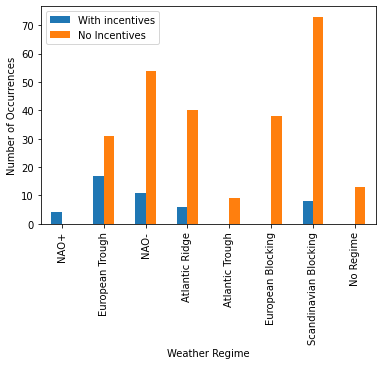

In [338]:
regime_dict={}
for date in unmet_demand_baseline['residual'].nsmallest(10000).index:
    
    index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date() 
    regime_dict[date]=weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr']
    if unmet_demand_baseline['residual'][date]>-0.001:
        break
regime_df=pd.DataFrame.from_dict(regime_dict, orient='index')
regime_counts_baseline=regime_df.value_counts()   

regime_dict={}

for date in unmet_demand_adjustement['residual'].nsmallest(10000).index:
    
    index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date() 
    regime_dict[date]=weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr']
    if unmet_demand_adjustement['residual'][date]>-0.001:
        break    
regime_df=pd.DataFrame.from_dict(regime_dict, orient='index')
regime_counts_adjusted=regime_df.value_counts()


regime_counts_baseline=regime_counts_baseline.to_frame()
regime_counts_baseline['Weather Regime']='x'
for i in regime_counts_baseline.index:
    regime_counts_baseline.loc[i,'Weather Regime']=regime_names[i[0]]
    
regime_counts_baseline=regime_counts_baseline.set_index('Weather Regime')
regime_counts_baseline=regime_counts_baseline.rename(columns={0:'No Incentives'})


#fig,ax=plt.subplots()
#regime_counts_baseline.plot.pie(y='Number of occurences',figsize=(5, 5),ax=ax,legend=None)
#plt.ylabel('')




regime_counts_adjusted=regime_counts_adjusted.to_frame()
regime_counts_adjusted['Weather Regime']='x'

for i in regime_counts_adjusted.index:
    regime_counts_adjusted.loc[i,'Weather Regime']=regime_names[i[0]]
    
regime_counts_adjusted=regime_counts_adjusted.set_index('Weather Regime')
regime_counts_adjusted=regime_counts_adjusted.rename(columns={0:'With incentives'})


#fig,ax=plt.subplots()
#regime_counts_adjusted.plot.pie(y='Number of occurences',figsize=(5, 5),ax=ax,legend=None)
#plt.ylabel('')



plot_df=pd.concat([regime_counts_adjusted, regime_counts_baseline], axis=1).fillna(0)
plot_df=plot_df.reindex(['NAO+',
    'European Trough',
    'NAO-',
    'Atlantic Ridge',
    'Atlantic Trough',
    'European Blocking',
    'Scandinavian Blocking',
    'No Regime'])

fig,ax=plt.subplots()
plot_df.plot.bar(ax=ax)
plt.ylabel('Number of Occurrences')
plt.savefig(os.path.join(plot_path,'Regime Behaviour','Unmet Demand Regimes'+'.png'), dpi=300, bbox_inches = 'tight')

In [ ]:
regime_names={
    0:'NAO+',
    1:'European Trough',
    2:'NAO-',
    3:'Atlantic Ridge',
    4:'Atlantic Trough',
    5:'European Blocking',
    6:'Scandinavian Blocking',
    7:'No Regime'
}
regime_names[0]

,Number of occurences,Number of occurences
Weather Regime,,
European Trough,17.0,31.0
NAO-,11.0,54.0
Scandinavian Blocking,8.0,73.0
Atlantic Ridge,6.0,40.0
NAO+,4.0,0.0
European Blocking,0.0,38.0
No Regime,0.0,13.0
Atlantic Trough,0.0,9.0


In [245]:
regime_df=pd.DataFrame.from_dict(regime_dict, orient='index')
regime_counts_baseline=regime_df.value_counts()

In [297]:
regime_counts_baseline[0]

6    73
2    54
3    40
5    38
1    31
7    13
4     9
Name: 0, dtype: int64

In [308]:
regime_counts_baseline

,0
Weather Regime,
Scandinavian Blocking,73
NAO-,54
Atlantic Ridge,40
European Blocking,38
European Trough,31
No Regime,13
Atlantic Trough,9


In [260]:
regime_df=pd.DataFrame.from_dict(regime_dict, orient='index')
regime_counts_adjusted=regime_df.value_counts()
regime_counts_adjusted

2    28
1    23
6    22
3    18
0     4
4     2
7     2
5     1
dtype: int64

In [257]:
unmet_demand_adjustement['residual'].nsmallest(50)

timesteps
2015-01-21 16:00:00   -1.067647
2015-01-22 16:00:00   -0.934464
2015-01-22 12:00:00   -0.896747
2015-01-21 12:00:00   -0.824984
2015-01-19 12:00:00   -0.819733
2015-01-22 08:00:00   -0.793355
2015-01-19 16:00:00   -0.788508
2010-12-21 12:00:00   -0.632810
2015-01-20 16:00:00   -0.567799
2015-01-19 08:00:00   -0.518356
2015-01-22 04:00:00   -0.482502
2013-01-15 16:00:00   -0.470325
2013-01-15 12:00:00   -0.442090
2010-12-21 08:00:00   -0.432205
2010-12-21 16:00:00   -0.335433
2015-01-21 08:00:00   -0.303061
2015-01-19 04:00:00   -0.251822
2015-01-20 12:00:00   -0.216158
2014-11-20 16:00:00   -0.164846
2014-11-20 12:00:00   -0.164302
2015-01-21 04:00:00   -0.161223
2014-11-20 08:00:00   -0.156731
2015-01-20 08:00:00   -0.137729
2012-01-13 16:00:00   -0.102776
2014-12-11 16:00:00   -0.091708
2010-12-15 16:00:00   -0.079797
2012-01-13 20:00:00   -0.066241
2014-12-11 20:00:00   -0.062630
2013-01-15 08:00:00   -0.061353
2015-02-11 16:00:00   -0.055901
2012-01-30 16:00:00   -0.04920

In [256]:
unmet_demand_baseline['residual'].nsmallest(100)

timesteps
2012-02-10 16:00:00   -4.310255
2015-01-21 16:00:00   -3.716801
2015-01-22 16:00:00   -3.409147
2012-02-06 16:00:00   -3.206565
2014-12-03 16:00:00   -3.136046
                         ...   
2012-02-08 08:00:00   -1.045414
2011-03-03 04:00:00   -1.038607
2011-01-19 12:00:00   -1.026418
2015-01-22 00:00:00   -1.022570
2012-02-13 08:00:00   -1.019747
Name: residual, Length: 100, dtype: float64

In [275]:
for date in unmet_demand_baseline['residual'].nsmallest(100).index:
    index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date()
    #print(weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr'])
    regime_dict[date]=weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr']

In [242]:

index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date()
weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr']

1

In [283]:
unmet_demand_baseline['residual'].nsmallest(100)

timesteps
2012-02-10 16:00:00   -4.310255
2015-01-21 16:00:00   -3.716801
2015-01-22 16:00:00   -3.409147
2012-02-06 16:00:00   -3.206565
2014-12-03 16:00:00   -3.136046
                         ...   
2012-02-08 08:00:00   -1.045414
2011-03-03 04:00:00   -1.038607
2011-01-19 12:00:00   -1.026418
2015-01-22 00:00:00   -1.022570
2012-02-13 08:00:00   -1.019747
Name: residual, Length: 100, dtype: float64

<AxesSubplot:xlabel='timesteps'>

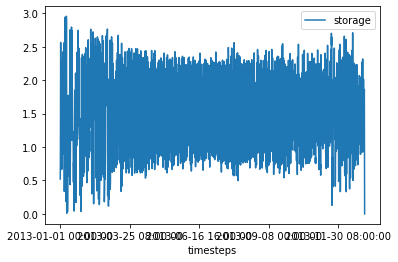

In [188]:
storage_level2=pd.read_pickle(storage_path2)
storage=storage_level2.loc[(slice(None), 'battery'), :]
storage=storage.droplevel(1)
storage['date']=storage.index
#storage['date']=pd.to_datetime(storage['date'] format='%Y%b%Y:%H:%M:%S.%f')
storage=storage[storage['date'].apply(pd.to_datetime).dt.year == 2013]
#storage=storage[storage['date'].apply(pd.to_datetime).dt.month.isin([3])]
#storage=storage.drop(['date'],axis=1)
storage.plot()

<AxesSubplot:xlabel='timesteps'>

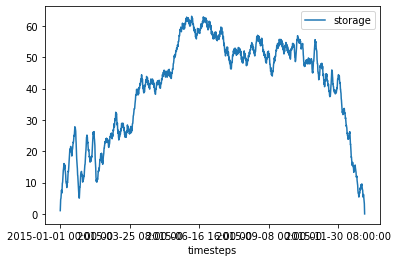

In [183]:
storage_level1=pd.read_pickle(storage_path1)
storage=storage_level1.loc[(slice(None), 'pumped_hydro'), :]
storage=storage.droplevel(1)
storage['date']=storage.index
#storage['date']=pd.to_datetime(storage['date'] format='%Y%b%Y:%H:%M:%S.%f')
storage=storage[storage['date'].apply(pd.to_datetime).dt.year == 2015]
#storage=storage[storage['date'].apply(pd.to_datetime).dt.month.isin([3])]
storage=storage.drop(['date'],axis=1)
storage.plot()

In [147]:
unmet_demand_baseline.loc['2013-01-15 16:00:00','residual']

-1.5020065235678388

In [105]:
unmet_demand_baseline['residual'].nsmallest(10)

timesteps
2013-01-15 16:00:00   -1.502007
2013-01-15 12:00:00   -1.465492
2013-01-16 08:00:00   -1.191724
2010-12-21 12:00:00   -1.170169
2013-01-15 08:00:00   -1.165939
2010-12-21 16:00:00   -1.160550
2015-01-22 12:00:00   -1.030918
2013-01-23 16:00:00   -0.953038
2015-01-22 16:00:00   -0.926821
2015-01-19 16:00:00   -0.925097
Name: residual, dtype: float64

In [108]:
unmet_demand_adjustement['residual'].nsmallest(10)

timesteps
2015-01-21 16:00:00   -1.067647
2015-01-22 16:00:00   -0.934464
2015-01-22 12:00:00   -0.896747
2015-01-21 12:00:00   -0.824984
2015-01-19 12:00:00   -0.819733
2015-01-22 08:00:00   -0.793355
2015-01-19 16:00:00   -0.788508
2010-12-21 12:00:00   -0.632810
2015-01-20 16:00:00   -0.567799
2015-01-19 08:00:00   -0.518356
Name: residual, dtype: float64

In [93]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test_df)

                                  Ratio  difference
locs techs                                         
ALB  battery                   0.657313   -0.003995
     hydrogen                  0.026984   -0.004797
     open_field_pv             0.000000    0.000000
     roof_mounted_pv           0.000000    0.000000
     wind_offshore             0.000000   -0.001262
     wind_onshore_competing    0.514474   -0.002048
     wind_onshore_monopoly     0.757973   -0.000688
AUT  battery                   0.316637   -0.011487
     hydrogen                  0.129267   -0.007282
     open_field_pv             0.000000    0.000000
     roof_mounted_pv           0.000000    0.000000
     wind_offshore             0.000000    0.000000
     wind_onshore_competing    0.714707   -0.000321
     wind_onshore_monopoly     0.996668   -0.000062
BEL  battery                   8.283793    0.034743
     hydrogen                  1.137285    0.012312
     open_field_pv             0.000000    0.000000
     roof_mo

In [112]:
storage_level1

,storage
timesteps,
2011-01-01 00:00:00,1.747843
2011-01-01 04:00:00,3.659204
2011-01-01 08:00:00,6.767406
2011-01-01 12:00:00,8.883249
2011-01-01 16:00:00,9.098884
...,...
2012-12-31 04:00:00,7.920116
2012-12-31 08:00:00,7.985398
2012-12-31 12:00:00,7.070978


In [83]:
test_df=(energy_adjust/energy_baseline).fillna(0)
test_df=test_df.rename(columns={'carrier_prod':'Ratio'})
test_df['difference']=(energy_adjust-energy_baseline)['carrier_prod']
test_df


Ratio  difference
region           techs                                        
Central Europe   battery                  1.788326    0.056837
                 hydrogen                 1.227311    0.023126
                 open_field_pv            0.000000    0.000000
                 roof_mounted_pv          0.000000    0.000000
                 wind_offshore            0.175333   -0.193274
                 wind_onshore_competing   0.626747   -0.608280
                 wind_onshore_monopoly    1.148679    0.113724
Iberia           battery                  0.897759   -0.019623
                 hydrogen                 4.389760    0.002544
                 open_field_pv            1.302801    0.000913
                 roof_mounted_pv          0.000000    0.000000
                 wind_offshore           30.081154    0.059510
                 wind_onshore_competing   0.773995   -0.143093
                 wind_onshore_monopoly    0.929994   -0.072183
Northern Europe  battery                  0.488377   -0.015021
                 hydrogen                 0.298595   -0.030953
                 open_field_pv            0.000000    0.000000
                 roof_mounted_pv          0.000000    0.000000
                 wind_offshore            4.977990    0.037087
                 wind_onshore_competing   3.572405    0.178581
                 wind_onshore_monopoly    2.150013    0.121592
Southeast Europe battery                  4.133890    0.697719
                 hydrogen                 0.146579   -0.048427
                 open_field_pv            0.000000    0.000000
                 roof_mounted_pv          0.000000    0.000000
                 wind_offshore            1.755133    0.004625
                 wind_onshore_competing   2.646790    0.356423
                 wind_onshore_monopoly    1.836351    0.194870
Western Europe   battery                  4.957293    0.096914
                 hydrogen                 1.439883    0.301398
                 open_field_pv            0.000000    0.000000
                 roof_mounted_pv          0.000000    0.000000
                 wind_offshore            5.324534    0.398877
                 wind_onshore_competing   1.741100    0.243731
                 wind_onshore_monopoly    1.041112    0.024261

### Compare between adjustment and baseline

In [235]:
scenario1='test_50per_incentive_00_negative'

comparison_path1=os.path.join(data_path,analysis_name,'unmet_demand',scenario1,'adjustment')
comparison_path2=os.path.join(data_path,analysis_name,'unmet_demand',scenario1,'baseline')

storage_path1=os.path.join(data_path,analysis_name,'unmet_demand',scenario1,'storage_adjustment')
storage_path2=os.path.join(data_path,analysis_name,'unmet_demand',scenario1,'storage_baseline')

In [167]:
#unmet_demand_adjustment=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',scenario,'adjustment'))
#unmet_demand_baseline=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',scenario,'baseline'))

unmet_demand_adjustement=pd.read_pickle(comparison_path1)
unmet_demand_baseline=pd.read_pickle(comparison_path2)

storage_level1=pd.read_pickle(storage_path1)
storage_level2=pd.read_pickle(storage_path2)

for date in unmet_demand_baseline['residual'].nsmallest(10).index:
    total_energy_prod_adjust=pd.DataFrame()
    total_energy_prod_baseline=pd.DataFrame()
    operation_path=os.path.join(r'D:\\',scenario1,'Operation')
    
    for file in os.listdir(os.path.join(operation_path,'adjusted_costs')):
        os.chdir(os.path.join(operation_path,'adjusted_costs',file))
        energy_prod=pd.read_csv('results_carrier_prod.csv')
        #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]
        
        energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
        
        energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
        total_energy_prod_adjust=total_energy_prod_adjust.append(energy_prod)
        
    total_energy_prod_adjust.reset_index(drop=True) 
    operation_path=os.path.join(r'D:\\',scenario1,'Operation')
    for file in os.listdir(os.path.join(operation_path,'baseline')):
        os.chdir(os.path.join(operation_path,'baseline',file))
        energy_prod=pd.read_csv('results_carrier_prod.csv')
        #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]
        
        energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
        
        energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
        total_energy_prod_baseline=total_energy_prod_baseline.append(energy_prod)
    total_energy_prod_baseline.reset_index(drop=True)    

    energy_adjust=total_energy_prod_adjust[total_energy_prod_adjust['timesteps']==date]
    energy_baseline=total_energy_prod_baseline[total_energy_prod_baseline['timesteps']==date]
    
    #energy_adjust=total_energy_prod_adjust
    #energy_baseline=total_energy_prod_baseline
    
    energy_adjust=energy_adjust.drop(['timesteps'],axis=1).set_index('locs')
    energy_baseline=energy_baseline.drop(['timesteps'],axis=1).set_index('locs')
    energy_adjust['region']='region'
    energy_baseline['region']='region'
    
    for i in energy_adjust.index:
   
        for key in region_dict:
            if i in region_dict[key]:
                energy_adjust.loc[i,'region']=key
                energy_baseline.loc[i,'region']=key
    #energy_adjust=energy_adjust.groupby(['region','techs']).sum()
    #energy_baseline=energy_baseline.groupby(['region','techs']).sum()
    
    energy_adjust=energy_adjust.groupby(['techs']).sum()
    energy_baseline=energy_baseline.groupby(['techs']).sum()
    print(date)
    
    print('Storage Level 1:',storage_level1.loc[date,'storage'], ' Storage Level 2:',storage_level2.loc[date,'storage'])
    print(energy_adjust.sum()/energy_baseline.sum())
    
    test_df=(energy_adjust/energy_baseline).fillna(0)
    test_df=test_df.rename(columns={'carrier_prod':'Ratio'})
    test_df['difference']=(energy_adjust-energy_baseline)['carrier_prod']
    test_df

    print(test_df)
    
    

2012-02-10 16:00:00
Storage Level 1: techs
battery          0.768353
hydrogen         7.815616
pumped_hydro    11.849961
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.241533
hydrogen         7.097416
pumped_hydro    10.351744
Name: storage, dtype: float64
carrier_prod    1.279089
dtype: float64
                           Ratio  difference
techs                                       
battery                 2.456699    0.790968
biofuel                 1.607509    0.733909
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.996262   -0.015514
hydro_run_of_river      0.969658   -0.014931
hydrogen                1.358811    0.282652
nuclear                 0.962547   -0.106568
open_field_pv           1.944516    0.060263
pumped_hydro            1.555066    0.625832
roof_mounted_pv         0.000000   -0.000146
wind_offshore           1.187037    0.119700
wind_onshore_competing  1.730009    1.354883
wi

2010-12-21 16:00:00
Storage Level 1: techs
battery          0.208084
hydrogen         8.523046
pumped_hydro    14.423742
Name: storage, dtype: float64  Storage Level 2: techs
battery          1.098484
hydrogen         6.096625
pumped_hydro    14.517746
Name: storage, dtype: float64
carrier_prod    1.156981
dtype: float64
                           Ratio  difference
techs                                       
battery                 2.511217    0.816827
biofuel                 1.627172    0.751240
ccgt                    0.000000    0.000000
coal                    0.000000    0.000000
hydro_reservoir         0.997078   -0.012043
hydro_run_of_river      1.003488    0.001250
hydrogen                1.278760    0.247689
nuclear                 0.964020   -0.102378
open_field_pv           1.302801    0.000913
pumped_hydro            1.211957    0.294510
roof_mounted_pv         0.000000    0.000000
wind_offshore           1.891685    0.306826
wind_onshore_competing  1.009509    0.027363
wi

## Equity

In [22]:
equity_scenarios=investigated_scenarios
plot_path=r'C:\Users\Nikla\polybox\Master Thesis\Figures'
# 

Gini Adjusted:  0.5761834223694875
+/-50%, Linear, National and Europe
Gini Adjusted:  0.5761834223694875
+/-50%, Linear, National and Europe
Gini baseline:  0.3200339063318569
Gini Adjusted:  0.5160474911014751
+/-3ct/kWh, Linear, National and Europe
Gini Adjusted:  0.5160474911014751
+/-3ct/kWh, Linear, National and Europe
Gini baseline:  0.3200339063318569


,adjusted,baseline
"+/-50%, Linear, National and Europe",0.576183,0.320034
"+/-3ct/kWh, Linear, National and Europe",0.516047,0.320034


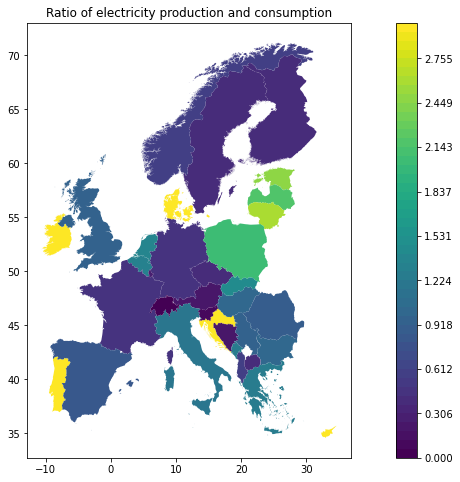

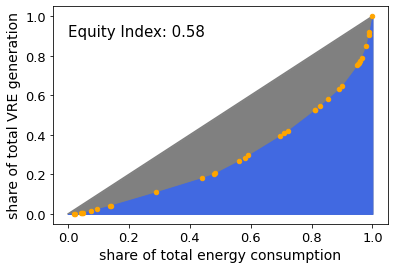

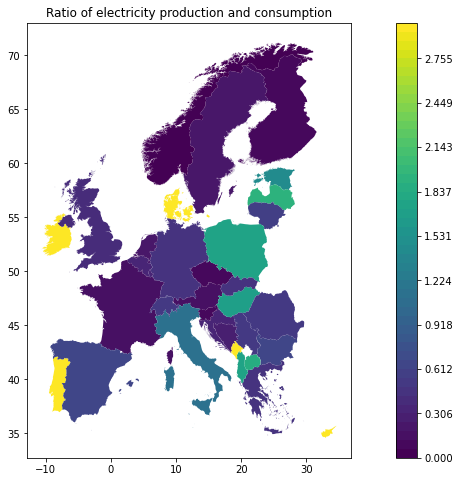

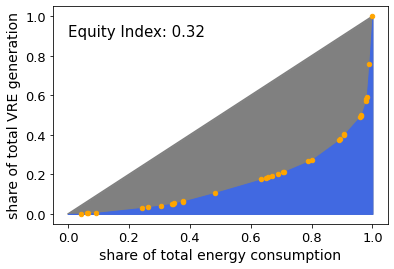

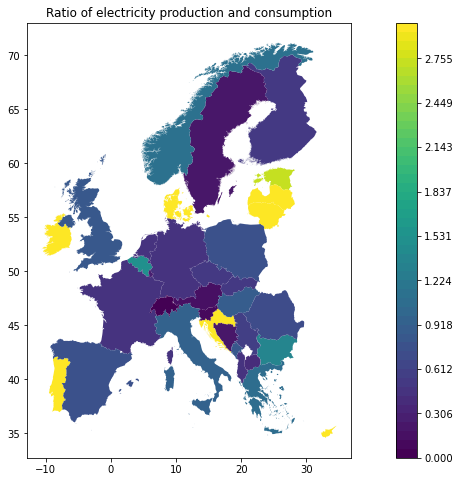

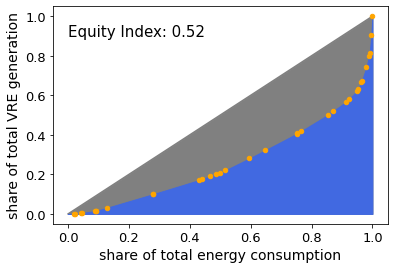

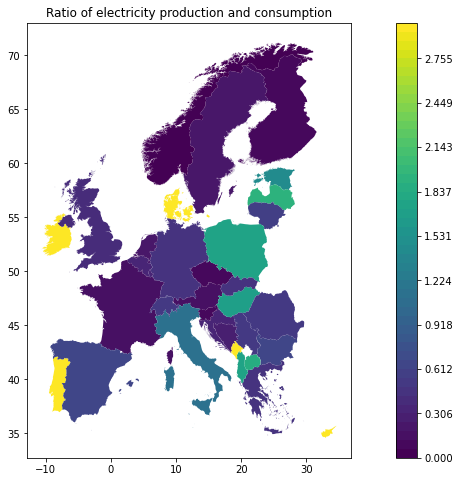

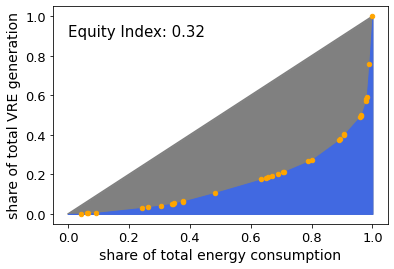

In [23]:
df_gini=pd.DataFrame(columns=['adjusted','baseline'])

if not os.path.exists(os.path.join(plot_path,analysis_name,'lorenz_curves')):
    os.makedirs(os.path.join(plot_path,analysis_name,'lorenz_curves'))

#cmap = plt.cm.seismic
cmap = plt.cm.viridis

cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
'Custom cmap', cmaplist, cmap.N)

for scenario in equity_scenarios.keys():
    
    if not os.path.exists(os.path.join(plot_path,analysis_name,'con_prod_ratio',scenario)):
        os.makedirs(os.path.join(plot_path,analysis_name,'con_prod_ratio',scenario))

    df_gini.loc[scenario]=0
    scenario_adjusted_path=os.path.join('D:\\',equity_scenarios[scenario],'adjusted_costs')
    scenario_baseline_path=os.path.join('D:\\',equity_scenarios[scenario],'adjusted_costs')
    
    os.chdir(os.path.join(scenario_adjusted_path,'model_csv_year_6'))
    
    carrier_prod=pd.read_csv('results_carrier_prod.csv')
    
    carrier_prod=carrier_prod[carrier_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv','roof_mounted_pv'])]
   
    carrier_con=pd.read_csv('results_carrier_con.csv')
    carrier_con=carrier_con[carrier_con['techs']=='demand_elec']


    prod_share=carrier_prod.groupby('locs').sum()/carrier_prod.groupby('locs').sum()['carrier_prod'].sum()
    prod_share=prod_share.rename(columns={'carrier_prod':'prod_share'})


    con_share=carrier_con.groupby('locs').sum()/carrier_con.groupby('locs').sum()['carrier_con'].sum()
    con_share=con_share.rename(columns={'carrier_con':'con_share'})


    plot_df=pd.DataFrame(index=con_share.index)
    plot_df['x']=con_share['con_share']
    plot_df=plot_df.rename(columns={'con_share':'y'})
    plot_df['y']=prod_share['prod_share']
    

    
    plot_df['sort']=plot_df['y']/plot_df['x']
    
            
    bounds = np.linspace(0,3)
    #clip_upper=plot_df['cap_diff'].mean()+3*plot_df['cap_diff'].std()
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N,clip=True)
    
    plot_df['country_code']=plot_df.index
    country_prod_con_share=pd.merge(units, plot_df, on='country_code')
    country_prod_con_share.plot(column='sort', legend=True, figsize=[16,8],cmap=cmap,k=20,norm=norm,legend_kwds={"fmt": "{:.1f}"})
    plt.title('Ratio of electricity production and consumption')
    plt.savefig(os.path.join(plot_path,analysis_name,'con_prod_ratio',scenario,'prod_con_ration_adjustment.png'), dpi=300)
    
    plot_df=plot_df.sort_values(by=['sort'])
    cum_df=pd.DataFrame(columns=['x','y'],index=plot_df.index)
    a=0
    for i in plot_df.index:
        if a!=0:
            cum_df['x'][i]=cum_df['x'][prev_i]+plot_df['x'][i]
            cum_df['y'][i]=cum_df['y'][prev_i]+plot_df['y'][i]
            prev_i=i
        else:
            cum_df['x'][i]=plot_df['x'][i]
            cum_df['y'][i]=plot_df['y'][i]
            prev_i=i
            
    
        a=a+1

    
    x=cum_df['x'].to_numpy()
    y=cum_df['y'].to_numpy()
    integral=integrate.simpson(y, x)
    
    A=0.5-integral
    B=integral
    gini=1-(A/(A+B))
    print('Gini Adjusted: ', gini)
    
    df_gini.loc[scenario]['adjusted']=gini
    

    print(scenario)
    x_vals=cum_df['x'].to_numpy()
    y_vals=cum_df['y'].to_numpy()
    x_vals=np.insert(x_vals, 0, 0.0, axis=0)
    y_vals=np.insert(y_vals, 0, 0.0, axis=0)
    
    fig,ax=plt.subplots(1,1)
    cum_df.plot.scatter(ax=ax,x='x',y='y',marker='o',color='orange',legend=False,zorder=10)
    #plt.plot(x_line, y_line, '--', color='royalblue')

    plt.fill_between(x_vals.astype(float), y_vals.astype(float),color='royalblue',zorder=5)
    point1=[0,0]
    point2=[1,1]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    x_line2=np.arange(0, 1.05, 0.05)
    y_line2=np.arange(0, 1.05, 0.05)

    
    plt.fill_between(x_line2,y_line2,color='grey',zorder=0)
  
    plt.plot(x_values, y_values,color='grey')
                
    #plt.title(scenario)
    plt.xlabel('share of total energy consumption',fontsize=14)
    plt.ylabel('share of total VRE generation',fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    ax.text(0.0,0.9,'Equity Index: {}'.format(round(gini,2)),color='black',fontsize=15)
    plt.savefig(os.path.join(plot_path,analysis_name,'lorenz_curves',equity_scenarios[scenario]+'.png'), dpi=300, bbox_inches = 'tight')
    
    
    x=cum_df['x'].to_numpy()
    y=cum_df['y'].to_numpy()
    integral=integrate.simpson(y, x)
    
    A=0.5-integral
    B=integral
    gini=1-(A/(A+B))
    print('Gini Adjusted: ', gini)
    
    df_gini.loc[scenario]['adjusted']=gini
    
    
    
    
    
    
    
    
    
    
    scenario_adjusted_path=os.path.join('D:\\',equity_scenarios[scenario],'adjusted_costs')
    scenario_baseline_path=os.path.join('D:\\',equity_scenarios[scenario],'baseline')
    
   
    os.chdir(os.path.join(scenario_baseline_path,'model_csv_year_1'))
    
    carrier_prod=pd.read_csv('results_carrier_prod.csv')
    
    carrier_prod=carrier_prod[carrier_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv','roof_mounted_pv'])]
   
    carrier_con=pd.read_csv('results_carrier_con.csv')
    carrier_con=carrier_con[carrier_con['techs']=='demand_elec']


    prod_share=carrier_prod.groupby('locs').sum()/carrier_prod.groupby('locs').sum()['carrier_prod'].sum()
    prod_share=prod_share.rename(columns={'carrier_prod':'prod_share'})


    con_share=carrier_con.groupby('locs').sum()/carrier_con.groupby('locs').sum()['carrier_con'].sum()
    con_share=con_share.rename(columns={'carrier_con':'con_share'})


    plot_df=pd.DataFrame(index=con_share.index)
    plot_df['x']=con_share['con_share']
    plot_df=plot_df.rename(columns={'con_share':'y'})
    plot_df['y']=prod_share['prod_share']
    

    
    plot_df['sort']=plot_df['y']/plot_df['x']
    
    plot_df['country_code']=plot_df.index
    
    #bounds = np.linspace(0,4)
    #clip_upper=plot_df['cap_diff'].mean()+3*plot_df['cap_diff'].std()
   # norm = mpl.colors.BoundaryNorm(bounds, cmap.N,clip=True)
    
    plot_df['country_code']=plot_df.index
    country_prod_con_share=pd.merge(units, plot_df, on='country_code')
    country_prod_con_share.plot(column='sort', legend=True, figsize=[16,8],cmap=cmap,k=20,norm=norm,legend_kwds={"fmt": "{:.1f}"})
    plt.title('Ratio of electricity production and consumption')
    plt.savefig(os.path.join(plot_path,analysis_name,'con_prod_ratio',scenario,'prod_con_ration_baseline.png'), dpi=300)
    
    
    plot_df=plot_df.sort_values(by=['sort'])
    cum_df=pd.DataFrame(columns=['x','y'],index=plot_df.index)
    a=0
    for i in plot_df.index:
        if a!=0:
            cum_df['x'][i]=cum_df['x'][prev_i]+plot_df['x'][i]
            cum_df['y'][i]=cum_df['y'][prev_i]+plot_df['y'][i]
            prev_i=i
        else:
            cum_df['x'][i]=plot_df['x'][i]
            cum_df['y'][i]=plot_df['y'][i]
            prev_i=i
            
    
        a=a+1

    


    print(scenario)

    x_vals=cum_df['x'].to_numpy()
    y_vals=cum_df['y'].to_numpy()
    x_vals=np.insert(x_vals, 0, 0.0, axis=0)
    y_vals=np.insert(y_vals, 0, 0.0, axis=0)
    
    
    fig, ax = plt.subplots(1,1)

    cum_df.plot.scatter(ax=ax,x='x',y='y',marker='o',color='orange',legend=False,zorder=10)
    #plt.plot(x_line, y_line, '--', color='royalblue')
    plt.fill_between(x_vals.astype(float), y_vals.astype(float),color='royalblue',zorder=5)
    point1=[0,0]
    point2=[1,1]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    
    plt.fill_between(x_line2,y_line2,color='grey',zorder=0)
        

  
    plt.plot(x_values, y_values,color='grey')
                
    #plt.title("Baseline")
    plt.xlabel('share of total energy consumption',fontsize=14)
    plt.ylabel('share of total VRE generation',fontsize=14)
    
    
    x=cum_df['x'].to_numpy()
    y=cum_df['y'].to_numpy()
    integral=integrate.simpson(y, x)
    
    A=0.5-integral
    B=integral
    gini=1-(A/(A+B))
    print('Gini baseline: ', gini)
    df_gini.loc[scenario]['baseline']=gini
    
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    ax.text(0.0,0.9,'Equity Index: {}'.format(round(gini,2)),color='black',fontsize=15)
    plt.savefig(os.path.join(plot_path,analysis_name,'lorenz_curves',equity_scenarios[scenario]+'_Baseline'), dpi=300, bbox_inches = 'tight')
df_gini

In [ ]:
df_gini

Gini baseline:  0.3200339063318569


Text(0.0, 0.9, 'Equity Index: 0.32')

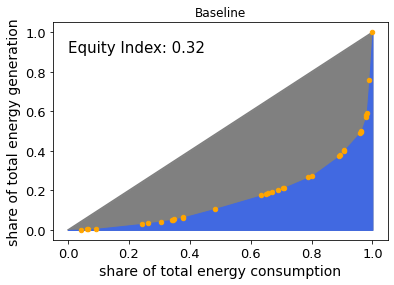

In [58]:
fig, ax = plt.subplots(1,1)

cum_df.plot.scatter(ax=ax,x='x',y='y',marker='o',color='orange',legend=False,zorder=10)
#plt.plot(x_line, y_line, '--', color='royalblue')
plt.fill_between(x_vals.astype(float), y_vals.astype(float),color='royalblue',zorder=5)
point1=[0,0]
point2=[1,1]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

plt.fill_between(x_line2,y_line2,color='grey',zorder=0)



plt.plot(x_values, y_values,color='grey')

plt.title("Baseline")
plt.xlabel('share of total energy consumption',fontsize=14)
plt.ylabel('share of total energy generation',fontsize=14)


x=cum_df['x'].to_numpy()
y=cum_df['y'].to_numpy()
integral=integrate.simpson(y, x)

A=0.5-integral
B=integral
gini=1-(A/(A+B))
print('Gini baseline: ', gini)
df_gini.loc[scenario]['baseline']=gini
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
ax.text(0.0,0.9,'Equity Index: {}'.format(round(gini,2)),color='black',fontsize=15)

### Get production during regimes

In [289]:
#unmet_demand_adjustment=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',scenario,'adjustment'))
#unmet_demand_baseline=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',scenario,'baseline'))

unmet_demand_adjustement=pd.read_pickle(comparison_path1)
unmet_demand_baseline=pd.read_pickle(comparison_path2)

storage_level1=pd.read_pickle(storage_path1)
storage_level2=pd.read_pickle(storage_path2)

regime_dict={}


total_energy_prod_adjust=pd.DataFrame()
total_energy_prod_baseline=pd.DataFrame()

#total_transmission_adjust=pd.DataFrame()
#total_transmission_baseline=pd.DataFrame()

operation_path=os.path.join(r'D:\\',scenario1,'Operation')

for file in os.listdir(os.path.join(operation_path,'adjusted_costs')):
    os.chdir(os.path.join(operation_path,'adjusted_costs',file))
    energy_prod=pd.read_csv('results_carrier_prod.csv')
    #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]

    energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
    #transmission=energy_prod[energy_prod['techs'].str.contains('transmission')]

    energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
    total_energy_prod_adjust=total_energy_prod_adjust.append(energy_prod)
    #total_transmission_adjust=total_transmission_adjust.append(transmission)

total_energy_prod_adjust.reset_index(drop=True) 
operation_path=os.path.join(r'D:\\',scenario1,'Operation')
for file in os.listdir(os.path.join(operation_path,'baseline')):
    os.chdir(os.path.join(operation_path,'baseline',file))
    energy_prod=pd.read_csv('results_carrier_prod.csv')
    #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]

    energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
    #transmission=energy_prod[energy_prod['techs'].str.contains('transmission')]

    energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
    total_energy_prod_baseline=total_energy_prod_baseline.append(energy_prod)
    #total_transmission_baseline=total_transmission_baseline.append(transmission)

total_energy_prod_baseline.reset_index(drop=True)    


energy_adjust=total_energy_prod_adjust
energy_baseline=total_energy_prod_baseline

#transmission_adjust=total_transmission_adjust[total_transmission_adjust['timesteps']==date]
#transmission_baseline=total_transmission_baseline[total_transmission_baseline['timesteps']==date]

#energy_adjust=total_energy_prod_adjust
#energy_baseline=total_energy_prod_baseline

#Continue here to add transmission

energy_adjust=energy_adjust.drop(['timesteps'],axis=1).set_index('locs')
energy_baseline=energy_baseline.drop(['timesteps'],axis=1).set_index('locs')
energy_adjust['region']='region'
energy_baseline['region']='region'

for i in energy_adjust.index:

    for key in region_dict:
        if i in region_dict[key]:
            energy_adjust.loc[i,'region']=key
            energy_baseline.loc[i,'region']=key
energy_adjust=energy_adjust.groupby(['region','techs']).sum()
energy_baseline=energy_baseline.groupby(['region','techs']).sum()

#energy_adjust=energy_adjust.groupby(['techs']).sum()
#energy_baseline=energy_baseline.groupby(['techs']).sum()
print(date)

# print('Storage Level 1:',storage_level1.loc[date,'storage'], ' Storage Level 2:',storage_level2.loc[date,'storage'])
print(energy_adjust.sum()/energy_baseline.sum())

average_df=(energy_adjust-energy_baseline).fillna(0)
average_df=test_df.rename(columns={'carrier_prod':'Difference'})





for date in unmet_demand_baseline['residual'].nsmallest(30).index:
    index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date()
    print(weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr'])
    regime_dict[date]=weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr']
    
    
    
 
    energy_adjust=total_energy_prod_adjust[total_energy_prod_adjust['timesteps']==date]
    energy_baseline=total_energy_prod_baseline[total_energy_prod_baseline['timesteps']==date]
    
    #transmission_adjust=total_transmission_adjust[total_transmission_adjust['timesteps']==date]
    #transmission_baseline=total_transmission_baseline[total_transmission_baseline['timesteps']==date]
    
    #energy_adjust=total_energy_prod_adjust
    #energy_baseline=total_energy_prod_baseline
    
    #Continue here to add transmission
    
    energy_adjust=energy_adjust.drop(['timesteps'],axis=1).set_index('locs')
    energy_baseline=energy_baseline.drop(['timesteps'],axis=1).set_index('locs')
    energy_adjust['region']='region'
    energy_baseline['region']='region'
    
    for i in energy_adjust.index:
   
        for key in region_dict:
            if i in region_dict[key]:
                energy_adjust.loc[i,'region']=key
                energy_baseline.loc[i,'region']=key
    energy_adjust=energy_adjust.groupby(['region','techs']).sum()
    energy_baseline=energy_baseline.groupby(['region','techs']).sum()
    
    #energy_adjust=energy_adjust.groupby(['techs']).sum()
    #energy_baseline=energy_baseline.groupby(['techs']).sum()
    print(date)
    
   # print('Storage Level 1:',storage_level1.loc[date,'storage'], ' Storage Level 2:',storage_level2.loc[date,'storage'])
    print(energy_adjust.sum()/energy_baseline.sum())
    
    test_df=(energy_adjust/energy_baseline).fillna(0)
    test_df=test_df.rename(columns={'carrier_prod':'Ratio'})
    test_df['difference']=(energy_adjust-energy_baseline)['carrier_prod']
    test_df

   # print(test_df)
    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        	print(test_df)
    
    

KeyboardInterrupt: 

In [7]:

total_energy_prod_adjust=pd.DataFrame()
total_energy_prod_baseline=pd.DataFrame()

#total_transmission_adjust=pd.DataFrame()
#total_transmission_baseline=pd.DataFrame()

operation_path=os.path.join(r'D:\\','test_50per_incentive_00_negative','Operation')

for file in os.listdir(os.path.join(operation_path,'adjusted_costs')):
    os.chdir(os.path.join(operation_path,'adjusted_costs',file))
    energy_prod=pd.read_csv('results_carrier_prod.csv')
    #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]

    energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
    #transmission=energy_prod[energy_prod['techs'].str.contains('transmission')]

    energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
    total_energy_prod_adjust=total_energy_prod_adjust.append(energy_prod)
    #total_transmission_adjust=total_transmission_adjust.append(transmission)

total_energy_prod_adjust.reset_index(drop=True) 
operation_path=os.path.join(r'D:\\','test_50per_incentive_00_negative','Operation')
for file in os.listdir(os.path.join(operation_path,'baseline')):
    os.chdir(os.path.join(operation_path,'baseline',file))
    energy_prod=pd.read_csv('results_carrier_prod.csv')
    #energy_prod=energy_prod[energy_prod['techs'].isin(VRE_generation_techs)]

    energy_prod=energy_prod[~energy_prod['techs'].str.contains('transmission')]
    #transmission=energy_prod[energy_prod['techs'].str.contains('transmission')]

    energy_prod=energy_prod.groupby(['locs','techs','timesteps']).sum().reset_index()
    total_energy_prod_baseline=total_energy_prod_baseline.append(energy_prod)
    #total_transmission_baseline=total_transmission_baseline.append(transmission)

total_energy_prod_baseline.reset_index(drop=True)    


regime_test=weather_regimes
regime_test['merge_date']=regime_test.index

total_energy_prod_baseline['merge_date']=total_energy_prod_baseline['timesteps'].str[:10]
total_energy_prod_baseline['merge_date']=pd.to_datetime(total_energy_prod_baseline['merge_date'])
total_energy_prod_baseline=total_energy_prod_baseline.merge(regime_test, how='left', on='merge_date')
total_energy_prod_baseline=total_energy_prod_baseline.drop(columns='merge_date')

total_energy_prod_adjust['merge_date']=total_energy_prod_adjust['timesteps'].str[:10]
total_energy_prod_adjust['merge_date']=pd.to_datetime(total_energy_prod_adjust['merge_date'])
total_energy_prod_adjust=total_energy_prod_adjust.merge(regime_test, how='left', on='merge_date')
total_energy_prod_adjust=total_energy_prod_adjust.drop(columns='merge_date')




energy_adjust=total_energy_prod_adjust
energy_baseline=total_energy_prod_baseline

#transmission_adjust=total_transmission_adjust[total_transmission_adjust['timesteps']==date]
#transmission_baseline=total_transmission_baseline[total_transmission_baseline['timesteps']==date]

#energy_adjust=total_energy_prod_adjust
#energy_baseline=total_energy_prod_baseline

#Continue here to add transmission
n = len(pd.unique(energy_adjust['timesteps']))
energy_adjust=energy_adjust.drop(['timesteps'],axis=1).set_index('locs')
energy_baseline=energy_baseline.drop(['timesteps'],axis=1).set_index('locs')
energy_adjust['region']='region'
energy_baseline['region']='region'



#for i in energy_adjust.index:

#    energy_adjust.loc[i,'region']=inv_region_dict[i]
#    energy_baseline.loc[i,'region']=inv_region_dict[i]
print('Start Region search')    
energy_adjust['region']=[inv_region_dict[x] for x in energy_adjust.index]
energy_baseline['region']=[inv_region_dict[x] for x in energy_baseline.index]

print('Groupby')

energy_adjust=energy_adjust.groupby(['wr','region','techs']).sum()
energy_baseline=energy_baseline.groupby(['wr','region','techs']).sum()

energy_adjust_general=energy_adjust.groupby(['region','techs']).sum()
energy_baseline_general=energy_baseline.groupby(['region','techs']).sum()

#energy_adjust=energy_adjust.groupby(['techs']).sum()
#energy_baseline=energy_baseline.groupby(['techs']).sum()
#print(date)

# print('Storage Level 1:',storage_level1.loc[date,'storage'], ' Storage Level 2:',storage_level2.loc[date,'storage'])
#print(energy_adjust.sum()/energy_baseline.sum())
print('summing')
average_df=((energy_adjust-energy_baseline).fillna(0))/n
average_prod_adjust=energy_adjust/n
average_prod_baseline=energy_baseline/n
average_df=average_df.rename(columns={'carrier_prod':'Difference'})

average_general_df=((energy_adjust_general-energy_baseline_general).fillna(0))/n
average_general_df=average_general_df.rename(columns={'carrier_prod':'Difference'})

Start Region search
Groupby
summing


In [177]:
regime_test=weather_regimes
regime_test['merge_date']=regime_test.index

total_energy_prod_baseline['merge_date']=total_energy_prod_baseline['timesteps'].str[:10]
total_energy_prod_baseline['merge_date']=pd.to_datetime(total_energy_prod_baseline['merge_date'])
total_energy_prod_baseline=total_energy_prod_baseline.merge(regime_test, how='left', on='merge_date')
total_energy_prod_baseline=total_energy_prod_baseline.drop(columns='merge_date')

total_energy_prod_adjust['merge_date']=total_energy_prod_adjust['timesteps'].str[:10]
total_energy_prod_adjust['merge_date']=pd.to_datetime(total_energy_prod_adjust['merge_date'])
total_energy_prod_adjust=total_energy_prod_adjust.merge(regime_test, how='left', on='merge_date')
total_energy_prod_adjust=total_energy_prod_adjust.drop(columns='merge_date')

NameError: name 'total_energy_prod_baseline' is not defined

In [176]:
adjust_prod=total_energy_prod_adjust
adjust_prod=adjust_prod[adjust_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv'])]
adjust_prod=adjust_prod.set_index(pd.to_datetime(adjust_prod['timesteps'])).resample('D').sum()
print(adjust_prod)
regime_test=weather_regimes
regime_test['merge_date']=regime_test.index

adjust_prod['merge_date']=adjust_prod.index
adjust_prod['merge_date']=pd.to_datetime(adjust_prod['merge_date'])
adjust_prod=adjust_prod.drop(columns='wr')

adjust_prod=adjust_prod.merge(regime_test, how='left', on='merge_date')
adjust_prod=adjust_prod

NameError: name 'total_energy_prod_adjust' is not defined

In [70]:
baseline_prod=total_energy_prod_baseline
baseline_prod=baseline_prod[baseline_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv'])]
baseline_prod=baseline_prod.set_index(pd.to_datetime(baseline_prod['timesteps'])).resample('D').sum()
print(baseline_prod)
regime_test=weather_regimes
regime_test['merge_date']=regime_test.index

baseline_prod['merge_date']=baseline_prod.index
baseline_prod['merge_date']=pd.to_datetime(baseline_prod['merge_date'])
baseline_prod=baseline_prod.drop(columns='wr')


baseline_prod=baseline_prod.merge(regime_test, how='left', on='merge_date')
baseline_prod=baseline_prod

            carrier_prod    wr
timesteps                     
2010-01-01     46.585293  1632
2010-01-02     57.722184  1632
2010-01-03     49.981324  1632
2010-01-04     51.010462  1632
2010-01-05     56.177942  1632
...                  ...   ...
2015-12-27     64.123473  4080
2015-12-28     63.448354  4080
2015-12-29     66.566671  4080
2015-12-30     69.619960  4080
2015-12-31     59.069040  4896

[2191 rows x 2 columns]


In [88]:
cf_adjust=unmet_demand_adjustment=pd.read_pickle(r'C:\Users\Nikla\polybox\Master Thesis\Data\incentive schemes\unmet_demand\test_50per_incentive_00_negative_europe/carrier_cf_adjustment.pickle')
cf_baseline=unmet_demand_baseline=pd.read_pickle(r'C:\Users\Nikla\polybox\Master Thesis\Data\incentive schemes\unmet_demand\test_50per_incentive_00_negative_europe/carrier_cf_baseline.pickle')

In [178]:
scenario='+/-50%, Linear, National and Europe'
os.chdir(os.path.join('D:\\',resilience_scenarios[scenario],'Operation','adjusted_costs',file))

        
carrier_prod=pd.read_csv('results_carrier_prod.csv')
carrier_prod=carrier_prod.drop(['carriers'],axis=1)


carrier_cf=pd.read_csv('inputs_resource.csv')
carrier_cf=carrier_cf[carrier_cf['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly','wind_offshore',
                                     'roof_mounted_pv','open_field_pv'])]
carrier_cf=carrier_cf.set_index(['locs','techs'])
energy_cap=pd.read_csv('results_energy_cap.csv')
energy_cap=energy_cap[energy_cap['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly','wind_offshore',
                                     'roof_mounted_pv','open_field_pv'])]
energy_cap=energy_cap.set_index(['locs','techs'])
for loc, tech in energy_cap.index:
    
    carrier_cf.loc[loc,tech]['resource']=carrier_cf.loc[loc,tech]['resource']*energy_cap.loc[loc,tech]['energy_cap']
carrier_cf=carrier_cf.reset_index().rename(columns={'resource':'Potential'})

C:\Users\Nikla\anaconda3\envs\Analysis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [179]:
#curtailment time 
potential_adjustment=pd.DataFrame()
potential_baseline=pd.DataFrame()


for scenario in ['+/-50%, Linear, National and Europe']:
    operation_path=os.path.join(r'D:\\',resilience_scenarios[scenario],'Operation')
    if not os.path.exists(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario])):
        os.makedirs(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario]))


    for file in os.listdir(os.path.join(operation_path,'adjusted_costs')):
        os.chdir(os.path.join('D:\\',resilience_scenarios[scenario],'Operation','adjusted_costs',file))

        
        carrier_prod=pd.read_csv('results_carrier_prod.csv')
        carrier_prod=carrier_prod.drop(['carriers'],axis=1)


        carrier_cf=pd.read_csv('inputs_resource.csv')
        carrier_cf=carrier_cf[carrier_cf['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly','wind_offshore',
                                             'roof_mounted_pv','open_field_pv'])]
        carrier_cf=carrier_cf.set_index(['locs','techs'])
        energy_cap=pd.read_csv('results_energy_cap.csv')
        energy_cap=energy_cap[energy_cap['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly','wind_offshore',
                                             'roof_mounted_pv','open_field_pv'])]
        energy_cap=energy_cap.set_index(['locs','techs'])
        for loc, tech in energy_cap.index:

            carrier_cf.loc[loc,tech]['resource']=carrier_cf.loc[loc,tech]['resource']*energy_cap.loc[loc,tech]['energy_cap']
        carrier_cf=carrier_cf.reset_index().rename(columns={'resource':'Potential'})
        
        potential_adjustment=potential_adjustment.append(carrier_cf)

        
   
    
    potential_adjustment.to_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'potential_adjustment.pickle'))
    #residual_load_total['adjusted']=a.T.sum(axis=1)   
    #print('VRE production energy in adjusted costs scenario',carrier_prod_VRE['carrier_prod'].sum(),' in 100GWh')




    for file in os.listdir(os.path.join(operation_path,'baseline')):
        operation_path=os.path.join(r'D:\\',resilience_scenarios[scenario],'Operation')
        
        os.chdir(os.path.join('D:\\',resilience_scenarios[scenario],'Operation','baseline',file))

        
        carrier_prod=pd.read_csv('results_carrier_prod.csv')
        carrier_prod=carrier_prod.drop(['carriers'],axis=1)


        carrier_cf=pd.read_csv('inputs_resource.csv')
        carrier_cf=carrier_cf[carrier_cf['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly','wind_offshore',
                                             'roof_mounted_pv','open_field_pv'])]
        carrier_cf=carrier_cf.set_index(['locs','techs'])
        energy_cap=pd.read_csv('results_energy_cap.csv')
        energy_cap=energy_cap[energy_cap['techs'].isin(['wind_onshore_competing','wind_onshore_monopoly','wind_offshore',
                                             'roof_mounted_pv','open_field_pv'])]
        energy_cap=energy_cap.set_index(['locs','techs'])
        for loc, tech in energy_cap.index:

            carrier_cf.loc[loc,tech]['resource']=carrier_cf.loc[loc,tech]['resource']*energy_cap.loc[loc,tech]['energy_cap']
        carrier_cf=carrier_cf.reset_index().rename(columns={'resource':'Potential'})
        
        potential_baseline=potential_baseline.append(carrier_cf)

        
   
    
    potential_baseline.to_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'potential_baseline.pickle'))
    

        

In [350]:
# Aggregates VRE Potentials for every day
adjust_prod=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'potential_adjustment.pickle'))
adjust_prod=adjust_prod[adjust_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv','open_field_pv'])]
adjust_prod=adjust_prod.set_index(pd.to_datetime(adjust_prod['timesteps'])).resample('D').sum()

regime_test=weather_regimes
regime_test['merge_date']=regime_test.index

adjust_prod['merge_date']=adjust_prod.index
adjust_prod['merge_date']=pd.to_datetime(adjust_prod['merge_date'])


adjust_prod=adjust_prod.merge(regime_test, how='left', on='merge_date')
#adjust_prod=adjust_prod.drop(columns='merge_date')

In [36]:
# Aggregates VRE Potentials for every day
baseline_prod=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'potential_baseline.pickle'))
baseline_prod=baseline_prod[baseline_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv'])]
baseline_prod=baseline_prod.set_index(pd.to_datetime(baseline_prod['timesteps'])).resample('D').sum()

regime_test=weather_regimes
regime_test['merge_date']=regime_test.index

baseline_prod['merge_date']=baseline_prod.index
baseline_prod['merge_date']=pd.to_datetime(baseline_prod['merge_date'])


baseline_prod=baseline_prod.merge(regime_test, how='left', on='merge_date')
#baseline_prod=baseline_prod.drop(columns='merge_date')

In [356]:
#Gives Potentials fore every timestep,loc and tech
adjust_prod=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'potential_adjustment.pickle'))
adjust_prod=adjust_prod[adjust_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv'])]
#adjust_prod=adjust_prod[adjust_prod['techs'].isin(['open_field_pv'])]
adjust_prod['merge_date']=adjust_prod['timesteps'].str[:10]
adjust_prod['merge_date']=pd.to_datetime(adjust_prod['merge_date'])
adjust_prod=adjust_prod.merge(regime_test, how='left', on='merge_date')
adjust_prod=adjust_prod.set_index('locs')
adjust_prod['region']=[inv_region_dict[x] for x in adjust_prod.index]
adjust_prod=adjust_prod.reset_index()

mean_prod=adjust_prod.groupby('locs').mean()
wr_prod=adjust_prod.groupby(['wr','locs']).mean()

ratio_per_country=(wr_prod/mean_prod)['Potential']

In [211]:
adjust_prod

,locs,techs,timesteps,Potential,merge_date,wr,region
0,ALB,wind_offshore,2011-01-01 00:00:00,0.000037,2011-01-01,2,Southeast Europe
1,ALB,wind_offshore,2011-01-01 04:00:00,0.000058,2011-01-01,2,Southeast Europe
2,ALB,wind_offshore,2011-01-01 08:00:00,0.000033,2011-01-01,2,Southeast Europe
3,ALB,wind_offshore,2011-01-01 12:00:00,0.000023,2011-01-01,2,Southeast Europe
4,ALB,wind_offshore,2011-01-01 16:00:00,0.000036,2011-01-01,2,Southeast Europe
...,...,...,...,...,...,...,...
1340887,SWE,wind_onshore_monopoly,2012-12-31 04:00:00,0.124705,2012-12-31,4,Northern Europe
1340888,SWE,wind_onshore_monopoly,2012-12-31 08:00:00,0.113632,2012-12-31,4,Northern Europe
1340889,SWE,wind_onshore_monopoly,2012-12-31 12:00:00,0.109100,2012-12-31,4,Northern Europe
1340890,SWE,wind_onshore_monopoly,2012-12-31 16:00:00,0.124376,2012-12-31,4,Northern Europe


In [355]:
#Gives Potentials fore every timestep,loc and tech
baseline_prod=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'potential_baseline.pickle'))
baseline_prod=baseline_prod[baseline_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore','open_field_pv'])]
#baseline_prod=baseline_prod[baseline_prod['techs'].isin(['open_field_pv'])]
baseline_prod['merge_date']=baseline_prod['timesteps'].str[:10]
baseline_prod['merge_date']=pd.to_datetime(baseline_prod['merge_date'])
baseline_prod=baseline_prod.merge(regime_test, how='left', on='merge_date')
baseline_prod=baseline_prod.set_index('locs')
baseline_prod['region']=[inv_region_dict[x] for x in baseline_prod.index]
baseline_prod=baseline_prod.reset_index()

mean_prod=baseline_prod.groupby('locs').mean()
wr_prod=baseline_prod.groupby(['wr','locs']).mean()

ratio_per_country=(wr_prod/mean_prod)['Potential']

In [230]:
baseline_prod

,locs,techs,timesteps,Potential,merge_date,wr,region
0,ALB,open_field_pv,2011-01-01 00:00:00,0.000000,2011-01-01,2,Southeast Europe
1,ALB,open_field_pv,2011-01-01 04:00:00,0.025048,2011-01-01,2,Southeast Europe
2,ALB,open_field_pv,2011-01-01 08:00:00,0.134986,2011-01-01,2,Southeast Europe
3,ALB,open_field_pv,2011-01-01 12:00:00,0.057378,2011-01-01,2,Southeast Europe
4,ALB,open_field_pv,2011-01-01 16:00:00,0.000000,2011-01-01,2,Southeast Europe
...,...,...,...,...,...,...,...
446959,SWE,open_field_pv,2012-12-31 04:00:00,0.000000,2012-12-31,4,Northern Europe
446960,SWE,open_field_pv,2012-12-31 08:00:00,0.000029,2012-12-31,4,Northern Europe
446961,SWE,open_field_pv,2012-12-31 12:00:00,0.000004,2012-12-31,4,Northern Europe
446962,SWE,open_field_pv,2012-12-31 16:00:00,0.000000,2012-12-31,4,Northern Europe


In [31]:
regime_names={
    0:'NAO+',
    1:'European Trough',
    2:'NAO-',
    3:'Atlantic Ridge',
    4:'Atlantic Trough',
    5:'European Blocking',
    6:'Scandinavian Blocking',
    7:'No Regime'
}
regime_names[0]

'NAO+'

0
1
2
3
4
5
6
7


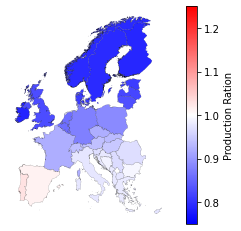

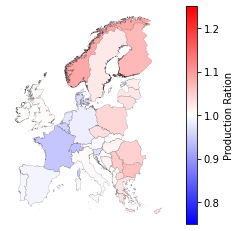

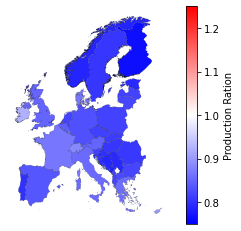

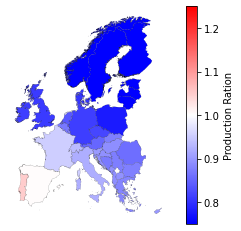

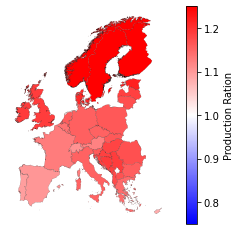

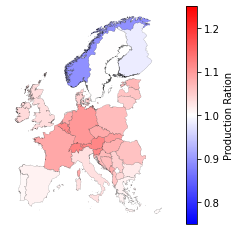

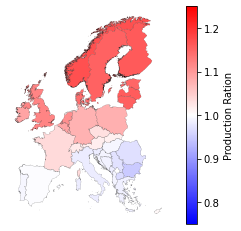

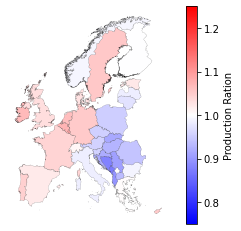

In [41]:
#Plots the ratio of output on an average day to average output on a regime day
scenario="+/-50%, Linear, National and Europe"
adjust_prod=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'potential_baseline.pickle'))

#adjust_prod=adjust_prod[adjust_prod['techs'].isin(['wind_onshore_monopoly','wind_onshore_competing','wind_offshore'])]
adjust_prod=adjust_prod[adjust_prod['techs'].isin(['open_field_pv'])]

adjust_prod['merge_date']=adjust_prod['timesteps'].str[:10]
adjust_prod['merge_date']=pd.to_datetime(adjust_prod['merge_date'])
adjust_prod=adjust_prod.merge(regime_test, how='left', on='merge_date')
adjust_prod=adjust_prod.set_index('locs')
adjust_prod['region']=[inv_region_dict[x] for x in adjust_prod.index]
adjust_prod=adjust_prod.reset_index()

mean_prod=adjust_prod.groupby('locs').mean()
wr_prod=adjust_prod.groupby(['wr','locs']).mean()

ratio_per_country=(wr_prod/mean_prod)['Potential']


if not os.path.exists(os.path.join(plot_path,'Regime Behaviour')):
                os.makedirs(os.path.join(plot_path,'Regime Behaviour'))

for wr in range(0,8):
    print(wr)
    plot_df=ratio_per_country.loc[wr]
    plot_df=plot_df.reset_index()
    plot_df=plot_df.rename(columns={'locs':'country_code'})

    plot_df=pd.merge(units, plot_df, on='country_code')
    
    vmin, vmax, vcenter = plot_df['Potential'].min(), plot_df['Potential'].max(), 1
    
    vmin,vmax, vcenter=0.75,1.25,1
    try:
        norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax) 
    except:
        if vmax<1:   
            norm=TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=1.1)
        if vmin>1:
            norm=TwoSlopeNorm(vmin=0., vcenter=vcenter, vmax=vmax)
    cmap = 'bwr'
    cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    fig, ax = plt.subplots()
    plot_df.plot(ax=ax,column='Potential', legend=False, figsize=[16,8], cmap=cmap,norm=norm,edgecolor='black',linewidth=0.1)
    fig.colorbar(cbar, ax=ax).set_label('Production Ration')
    #plt.title(wr)
    ax.axis('off')
    plt.savefig(os.path.join(plot_path,'Regime Behaviour','PV_'+regime_names[wr]+'.png'), bbox_inches='tight',dpi=300)
     
        
        
        

        #bounds = np.linspace(-500,500)
        

        

        #fig.colorbar(cbar, ax=ax)

     
        #
        #plt.close('all')
        
    

In [220]:
adjust_prod.groupby('timesteps').sum()['Potential']

timesteps
2010-01-01 00:00:00     9.378699
2010-01-01 04:00:00     9.527409
2010-01-01 08:00:00     8.930438
2010-01-01 12:00:00     8.763511
2010-01-01 16:00:00     8.370959
                         ...    
2015-12-31 04:00:00    11.561421
2015-12-31 08:00:00    10.975086
2015-12-31 12:00:00    10.531693
2015-12-31 16:00:00    10.023738
2015-12-31 20:00:00     8.662104
Name: Potential, Length: 13146, dtype: float64

In [219]:
group_adjust.get_group(2).groupby('timesteps').sum()['Potential']

timesteps
2010-01-01 00:00:00    9.378699
2010-01-01 04:00:00    9.527409
2010-01-01 08:00:00    8.930438
2010-01-01 12:00:00    8.763511
2010-01-01 16:00:00    8.370959
                         ...   
2014-08-22 04:00:00    5.713257
2014-08-22 08:00:00    6.819633
2014-08-22 12:00:00    7.271484
2014-08-22 16:00:00    6.889266
2014-08-22 20:00:00    7.127055
Name: Potential, Length: 1452, dtype: float64

NAO+
adjusted - Mean:  1.15153360208648  Std: 3.5360927681935537
baseline - Mean:  1.172409587882449  Std: 3.6075397134219775
European Trough
adjusted - Mean:  0.9840627467952124  Std: 3.3894682926115745
baseline - Mean:  0.9848124519117634  Std: 3.553591570340804
NAO-
adjusted - Mean:  0.9726371541191514  Std: 3.0462598905867253
baseline - Mean:  0.9525316732389787  Std: 3.2275157307514575
Atlantic Ridge
adjusted - Mean:  1.0353585870967703  Std: 3.242215558260291
baseline - Mean:  1.0203984450618535  Std: 3.4686612333980245
Atlantic Trough
adjusted - Mean:  1.0073671065061498  Std: 3.4731770946028044
baseline - Mean:  1.0129226160820526  Std: 3.563420821532295
European Blocking
adjusted - Mean:  0.9858167631644628  Std: 3.3570452932483112
baseline - Mean:  0.9844400609130125  Std: 3.6184337969322753
Scandinavian Blocking
adjusted - Mean:  0.8997965245205187  Std: 3.006376576790821
baseline - Mean:  0.8980079307272537  Std: 3.0992022705026114
No Regime
adjusted - Mean:  0.969790530153

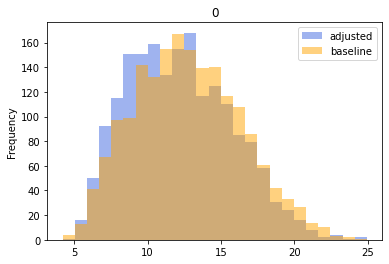

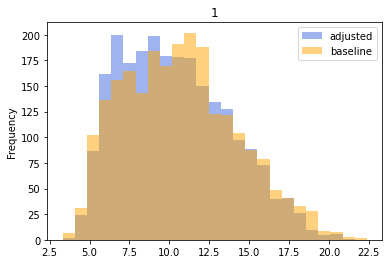

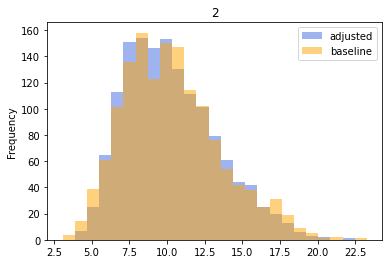

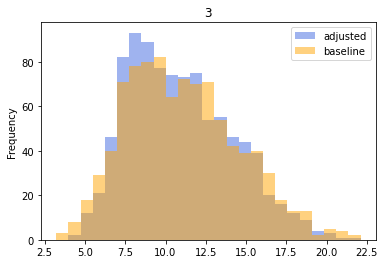

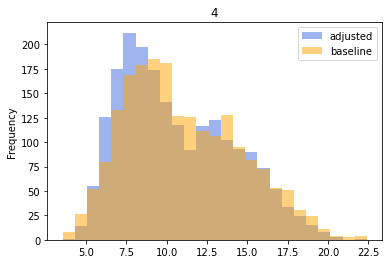

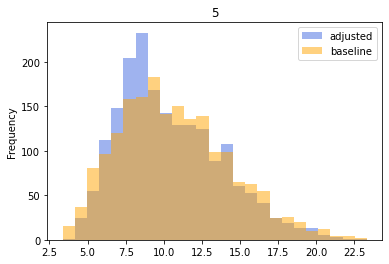

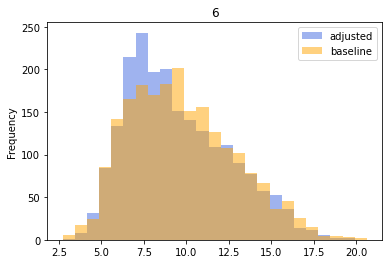

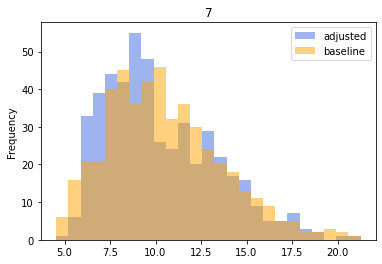

In [370]:
regime_list=[]
for reg in regime_names.keys():
    regime_list.append(regime_names[reg])
mean_df=pd.DataFrame({'With Incentive': ['x', 'x','x','x','x','x','x','x'], 'No Incentive': ['x','x','x','x','x','x','x','x'],'idx':regime_list}).set_index('idx')
group_adjust=adjust_prod.groupby('wr')
group_baseline=baseline_prod.groupby('wr')

adjust_mean_total=adjust_prod.groupby('timesteps').sum()['Potential'].mean()
baseline_mean_total=baseline_prod.groupby('timesteps').sum()['Potential'].mean()


for i in range(0,8):
    
    hist_df=pd.DataFrame(columns=['adjusted','baseline'])
    hist_df['adjusted']=group_adjust.get_group(i).groupby('timesteps').sum()['Potential']
    hist_df['baseline']=group_baseline.get_group(i).groupby('timesteps').sum()['Potential']
    
    
    
    print(regime_names[i])
    print('adjusted - Mean: ',hist_df['adjusted'].mean()/adjust_mean_total,' Std:',hist_df['adjusted'].std())
    print('baseline - Mean: ',hist_df['baseline'].mean()/baseline_mean_total,' Std:',hist_df['baseline'].std())
    mean_df.loc[regime_names[i],'With Incentive']=hist_df['adjusted'].mean()/adjust_mean_total
    mean_df.loc[regime_names[i],'No Incentive']=hist_df['baseline'].mean()/baseline_mean_total
    hist_df.plot.hist(bins=25,alpha=0.5,color=['royalblue','orange'])
    plt.title(i)

In [360]:
adjust_mean_total

10.574864061484288

In [361]:
baseline_mean_total

10.87503044199583

In [377]:
mean_df

,With Incentive,No Incentive
idx,,
NAO+,1.151534,1.17241
European Trough,0.984063,0.984812
NAO-,0.972637,0.952532
Atlantic Ridge,1.035359,1.020398
Atlantic Trough,1.007367,1.012923
European Blocking,0.985817,0.98444
Scandinavian Blocking,0.899797,0.898008
No Regime,0.969791,0.965552


I cannot find a clear difference in production mean for specific weather regimes. However, the incentive scheme decreases the std in every weather regime. Check what happens with European Score

<AxesSubplot:xlabel='idx'>

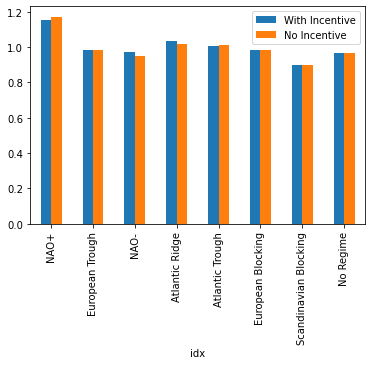

In [372]:
mean_df.plot.bar()

In [365]:
regime_list

['NAO+',
 'European Trough',
 'NAO-',
 'Atlantic Ridge',
 'Atlantic Trough',
 'European Blocking',
 'Scandinavian Blocking',
 'No Regime']

<AxesSubplot:ylabel='Frequency'>

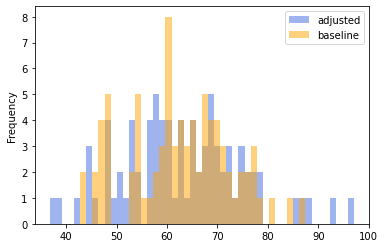

In [22]:
hist_df['baseline']=adjust_prod['Potential']
hist_df['adjusted']=baseline_prod['Potential']

hist_df.plot.hist(bins=50,alpha=0.5,color=['royalblue','orange'])

In [25]:
baseline_prod=pd.read_pickle(os.path.join(data_path,analysis_name,'unmet_demand',resilience_scenarios[scenario],'potential_baseline.pickle'))
baseline_prod

,locs,techs,timesteps,Potential
0,ALB,open_field_pv,2011-01-01 00:00:00,0.000000
1,ALB,open_field_pv,2011-01-01 04:00:00,0.025048
2,ALB,open_field_pv,2011-01-01 08:00:00,0.134986
3,ALB,open_field_pv,2011-01-01 12:00:00,0.057378
4,ALB,open_field_pv,2011-01-01 16:00:00,0.000000
...,...,...,...,...
373315,SWE,wind_onshore_monopoly,2012-12-31 04:00:00,0.100492
373316,SWE,wind_onshore_monopoly,2012-12-31 08:00:00,0.091569
373317,SWE,wind_onshore_monopoly,2012-12-31 12:00:00,0.087917
373318,SWE,wind_onshore_monopoly,2012-12-31 16:00:00,0.100227


In [413]:
transmission_df=pd.merge(energy_prod, energy_con, on=['carriers','locs','techs','timesteps'])
transmission_df['diff']=transmission_df['carrier_prod']+transmission_df['carrier_con']
transmission_df['diff_per_h']=transmission_df['diff']/4
transmission_df=pd.merge(transmission_df, transmission_cap_adjustment, on=['locs','techs'],how='left')

In [24]:
(transmission_adjustment_df['diff_per_h']/transmission_adjustment_df['energy_cap']).nsmallest(1000)

180195   -0.999995
180194   -0.999994
92340    -0.999992
94538    -0.999987
57207    -0.999987
            ...   
252616   -0.999833
241264   -0.999833
94753    -0.999833
254358   -0.999832
239738   -0.999832
Length: 1000, dtype: float64

In [23]:
(transmission_baseline_df['diff_per_h']/transmission_baseline_df['energy_cap']).nsmallest(1000)

92340    -0.999980
94538    -0.999962
92339    -0.999960
180191   -0.999952
94536    -0.999951
            ...   
138481   -0.998137
261579   -0.998137
103507   -0.998135
261567   -0.998134
140268   -0.998132
Length: 1000, dtype: float64

In [13]:
scenario1='test_50per_incentive_00_negative'
scenario_path1=os.path.join('D:\\',scenario1)

transmission_adjust=pd.DataFrame()
transmission_baseline=pd.DataFrame()

for file in os.listdir(os.path.join(r'D:\\',scenario1,'Operation','adjusted_costs')):
        operation_path=os.path.join(r'D:\\',scenario1,'Operation','adjusted_costs',file)
        
        os.chdir(operation_path)
        
        
       
        energy_cap_adjustment=pd.read_csv('results_energy_cap.csv').groupby(['techs']).sum()
        transmission_cap_adjustment=pd.read_csv('results_energy_cap.csv')
        transmission_cap_adjustment=transmission_cap_adjustment[transmission_cap_adjustment['techs'].str.contains('transmission')]
        energy_prod=pd.read_csv('results_carrier_prod.csv')
        energy_prod=energy_prod[energy_prod['techs'].str.contains('transmission')]
        energy_con=pd.read_csv('results_carrier_con.csv')
        energy_con=energy_con[energy_con['techs'].str.contains('transmission')]
        transmission_adjustment_df=pd.merge(energy_prod, energy_con, on=['carriers','locs','techs','timesteps'])
        transmission_adjustment_df['diff']=transmission_adjustment_df['carrier_prod']+transmission_adjustment_df['carrier_con']
        transmission_adjustment_df['diff_per_h']=transmission_adjustment_df['diff']/4
       
        transmission_adjustment_df=pd.merge(transmission_adjustment_df, transmission_cap_adjustment, on=['locs','techs'],how='left')
        transmission_adjustment_df['Utilization_ratio']= transmission_adjustment_df['diff_per_h']/ transmission_adjustment_df['energy_cap']
        transmission_adjust=transmission_adjust.append(transmission_adjustment_df)

for file in os.listdir(os.path.join(r'D:\\',scenario1,'Operation','baseline')):
        operation_path=os.path.join(r'D:\\',scenario1,'Operation','baseline',file)
        
        os.chdir(operation_path)        
        energy_cap_baseline=pd.read_csv('results_energy_cap.csv').groupby(['techs']).sum()
        transmission_cap_baseline=pd.read_csv('results_energy_cap.csv')
        transmission_cap_baseline=transmission_cap_baseline[transmission_cap_baseline['techs'].str.contains('transmission')]
        energy_prod=pd.read_csv('results_carrier_prod.csv')
        energy_prod=energy_prod[energy_prod['techs'].str.contains('transmission')]
        energy_con=pd.read_csv('results_carrier_con.csv')
        energy_con=energy_con[energy_con['techs'].str.contains('transmission')]
        transmission_baseline_df=pd.merge(energy_prod, energy_con, on=['carriers','locs','techs','timesteps'])
        transmission_baseline_df['diff']=transmission_baseline_df['carrier_prod']+transmission_baseline_df['carrier_con']
        transmission_baseline_df['diff_per_h']=transmission_baseline_df['diff']/4
       
        transmission_baseline_df=pd.merge(transmission_baseline_df, transmission_cap_baseline, on=['locs','techs'],how='left')
        transmission_baseline_df['Utilization_ratio']= transmission_baseline_df['diff_per_h']/ transmission_baseline_df['energy_cap']
        transmission_baseline=transmission_baseline.append(transmission_baseline_df)






#for date in unmet_demand_baseline['residual'].nsmallest(10000).index:
    
#    index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date() 
 #   regime_dict[date]=weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr']

In [14]:
comparison_path2=os.path.join(data_path,analysis_name,'unmet_demand','test_50per_incentive_00_negative','baseline')
comparison_path1=os.path.join(data_path,analysis_name,'unmet_demand','test_50per_incentive_00_negative','adjustment')
unmet_demand_adjustement=pd.read_pickle(comparison_path1)
unmet_demand_baseline=pd.read_pickle(comparison_path2)


for date in unmet_demand_baseline['residual'].nsmallest(100).index:
    index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date()
    if unmet_demand_baseline['residual'][date]>-0.001:
        break
    print(weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr'])
    
    transmission_baseline_date=transmission_baseline[transmission_baseline['timesteps']==date]
    transmission_adjust_date=transmission_adjust[transmission_adjust['timesteps']==date]
    
    for i in transmission_baseline_date['Utilization_ratio'].nlargest(100).index:
        
        if transmission_baseline_date.loc[i,'Utilization_ratio']<0.99:
            break
        print(transmission_baseline_date.loc[i,'locs'])
    

3
BGR
BGR
SRB
SRB
SRB
SRB
MNE
CZE
1
SRB
LTU
SRB
SRB
SVN
ALB
CZE
1
BGR
BGR
SRB
SRB
SRB
SRB
SVN
CZE
MNE
6
SRB
MNE
BGR
BGR
CZE
SRB
SRB
5
LTU
BEL
BGR
SRB
MNE
SRB
CZE
6
SRB
SRB
CZE
ALB
6
LTU
BEL
BGR
SRB
SRB
SRB
HUN
SRB
SRB
MNE
SVN
CZE
6
SRB
MNE
BGR
BGR
SRB
SRB
SRB
HUN
CZE
2
BGR
SRB
MNE
SRB
CZE
1
BGR
HUN
SRB
SRB
SRB
SVN
MNE
CZE
6
SRB
SVN
SRB
MNE
SRB
SRB
CZE
1
HUN
SVN
SRB
SRB
BGR
SRB
SRB
SRB
BGR
CZE
MNE
3
BGR
BGR
SRB
MNE
SRB
SRB
CZE
DEU
2
BGR
SRB
MNE
SRB
CZE
SRB
3
BGR
SRB
HUN
SVN
SRB
BGR
SRB
SRB
LTU
CZE
1
SRB
SRB
SRB
SVN
ALB
7
SRB
SRB
ALB
SRB
CZE
2
BGR
BEL
BGR
SRB
DEU
SRB
SRB
SRB
MNE
CZE
SVN
7
SRB
SRB
SRB
ALB
CZE
1
BGR
SRB
HUN
LTU
SRB
SRB
SRB
SVN
CZE
3
BGR
BGR
SRB
MNE
SRB
SRB
SVN
SRB
CZE
1
SRB
SRB
SVN
ALB
DEU
6
SRB
SVN
SRB
MNE
SRB
SRB
CZE
BEL
3
BGR
BGR
SRB
MNE
SVN
SRB
SRB
SRB
CZE
2
BGR
BGR
MNE
SRB
SRB
CZE
5
LTU
BEL
BGR
SRB
SVN
DEU
SRB
SRB
SRB
CZE
2
BGR
BGR
SRB
SRB
SRB
MNE
SRB
SRB
SVN
CZE
DEU
3
BGR
BGR
SRB
SRB
SRB
SRB
MNE
CZE
5
LTU
BGR
BEL
SVN
SRB
SRB
MNE
SRB
CZE
3
BGR
BEL
BGR
SRB
SRB
SRB
SRB


In [15]:
comparison_path2=os.path.join(data_path,analysis_name,'unmet_demand','test_50per_incentive_00_negative','baseline')
comparison_path1=os.path.join(data_path,analysis_name,'unmet_demand','test_50per_incentive_00_negative','adjustment')
unmet_demand_adjustement=pd.read_pickle(comparison_path1)
unmet_demand_baseline=pd.read_pickle(comparison_path2)

blocked_dict_baseline={}
blocked_dict_adjust={}

blocked_list_baseline=[]
blocked_list_adjust=[]

timestep_adjust_counter=0
timestep_baseline_counter=0

for date in unmet_demand_baseline['residual'].nsmallest(1000).index:
    index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date()
    if unmet_demand_baseline['residual'][date]>-0.001:
        break
    timestep_baseline_counter+=1
    #print(weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr'])
    regime=weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr']
    transmission_baseline_date=transmission_baseline[transmission_baseline['timesteps']==date]
    transmission_adjust_date=transmission_adjust[transmission_adjust['timesteps']==date]
    
    for i in transmission_baseline_date['Utilization_ratio'].nlargest(100).index:
        
        if transmission_baseline_date.loc[i,'Utilization_ratio']<0.99:
            break
        
        if regime in blocked_dict_baseline.keys():
            blocked_dict_baseline[regime].append(transmission_baseline_date.loc[i,'techs'][-3:]+':'+transmission_baseline_date.loc[i,'locs'])
        else: 
            blocked_dict_baseline[regime]=[transmission_baseline_date.loc[i,'techs'][-3:]+':'+transmission_baseline_date.loc[i,'locs']]
        blocked_list_baseline.append(transmission_baseline_date.loc[i,'techs'][-3:]+':'+transmission_baseline_date.loc[i,'locs'])
       # print(transmission_adjust_date.loc[i,'locs'])+
for date in unmet_demand_adjustement['residual'].nsmallest(1000).index:
    transmission_adjust_date=transmission_adjust[transmission_adjust['timesteps']==date]
    index_date=datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").date()
    if unmet_demand_adjustement['residual'][date]>-0.001:
        break
    timestep_adjust_counter+=1
    #print(weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr'])
    regime=weather_regimes.loc[index_date.strftime('%Y/%m/%d'),'wr']
  
    
    
    for i in transmission_adjust_date['Utilization_ratio'].nlargest(100).index:
        
        if transmission_adjust_date.loc[i,'Utilization_ratio']<0.99:
            break
        
        if regime in blocked_dict_adjust.keys():
            blocked_dict_adjust[regime].append(transmission_adjust_date.loc[i,'techs'][-3:]+':'+transmission_adjust_date.loc[i,'locs'])
        else: 
            blocked_dict_adjust[regime]=[transmission_adjust_date.loc[i,'techs'][-3:]+':'+transmission_adjust_date.loc[i,'locs']]
        blocked_list_adjust.append(transmission_adjust_date.loc[i,'techs'][-3:]+':'+transmission_adjust_date.loc[i,'locs'])

In [486]:
timestep_baseline_counter

257

In [488]:
timestep_adjust_counter

45

In [39]:
from shapely.geometry import Point, LineString
from shapely import wkt
from collections import Counter
line_change=pd.DataFrame(columns=['Start','End','Freq'])
for key in Counter(blocked_list_adjust).keys():

    line_change=line_change.append({'Start':key[:3],'End':key[4:],'Freq':Counter(blocked_list_adjust)[key]},ignore_index=True)

line_change['Start Point']='x'
line_change['End Point']='x'
line_change['Line']='x'


test=units
midpoints=units['geometry'].centroid
test['centerpoints']=midpoints
test=test.set_index('id')


for i in line_change.index:
    start_loc=line_change.loc[i,'Start']
    line_change.loc[i,'Start Point']=test.loc[start_loc,'centerpoints']
    
    end_loc=line_change.loc[i,'End']
    line_change.loc[i,'End Point']=test.loc[end_loc,'centerpoints']
    
    line_change.loc[i,'Line']=LineString([line_change.loc[i,'Start Point'],line_change.loc[i,'End Point']])

#line_change=line_change.drop(columns=['Start Point','End Point'])
#line_change['Line']=line_change['Line'].apply(wkt.loads)
geoline=gpd.GeoDataFrame(line_change)

#geoline.plot(geometry='Line')


C:\Users\Nikla\AppData\Local\Temp/ipykernel_13176/1434835800.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  midpoints=units['geometry'].centroid


C:\Users\Nikla\AppData\Local\Temp/ipykernel_13176/25310330.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  midpoints=units['geometry'].centroid


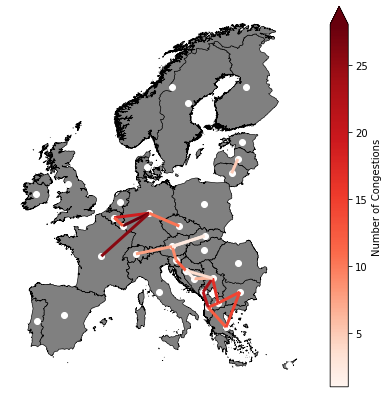

In [40]:
midpoints=units['geometry'].centroid
test=units
test['centerpoints']=midpoints

a=geoline.set_geometry('Line')


       

a = gpd.GeoDataFrame(geoline,
            columns=['Start', 'End','Freq', 'Start Point','End Point','Line'], 
            geometry='Line') 
#a.plot(column='Freq')

cmap = 'Reds'
vmin=a['Freq'].min()
vmax=a['Freq'].max()
norm = TwoSlopeNorm(vmin=a['Freq'].min(),vmax=a['Freq'].max(),vcenter=a['Freq'].median())

cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)




fig, ax = plt.subplots(1, 1,figsize=(7,7))
a.plot(column='Freq', legend=False,ax=ax,cmap=cmap,linewidth=3)
fig.colorbar(cbar, ax=ax,extend='max').set_label('Number of Congestions')
test.plot(ax=ax,linewidth=0.6,facecolor='grey', edgecolor='black')
test['centerpoints'].plot(ax=ax,color='white')
ax.axis('off')
#plt.title('European score for {} step {}'.format(technology_dict[technology],step-1))
#plt.savefig(os.path.join('European_score_{}_step_{}.png'.format(technology_dict[technology],step-1)),bbox_inches='tight', dpi=300)
#plt.clf()
#plt.text(-13,70,'Transmission Cap: {}GW'.format(round(transmission_cap_adjustment.energy_cap.sum()/2,2)),fontsize=13)
plt.savefig(r'C:\Users\Nikla\polybox\Master Thesis\Figures\Transmission\congestion_adjust.png', dpi=300, bbox_inches = 'tight')

In [388]:
scenario1='test_50per_incentive_00_negative'
scenario_path1=os.path.join('D:\\',scenario1)

transmission_adjust=pd.DataFrame()
transmission_baseline=pd.DataFrame()

for file in os.listdir(os.path.join(r'D:\\',scenario1,'Operation','adjusted_costs')):
        operation_path=os.path.join(r'D:\\',scenario1,'Operation','adjusted_costs',file)
        
        os.chdir(operation_path)
        
        
       
        energy_cap_adjustment=pd.read_csv('results_energy_cap.csv').groupby(['techs']).sum()
        transmission_cap_adjustment=pd.read_csv('results_energy_cap.csv')
        transmission_cap_adjustment=transmission_cap_adjustment[transmission_cap_adjustment['techs'].str.contains('transmission')]
        
for file in os.listdir(os.path.join(r'D:\\',scenario1,'Operation','baseline')):
        operation_path=os.path.join(r'D:\\',scenario1,'Operation','baseline',file)
        
        os.chdir(operation_path)        
        energy_cap_baseline=pd.read_csv('results_energy_cap.csv').groupby(['techs']).sum()
        transmission_cap_baseline=pd.read_csv('results_energy_cap.csv')
        transmission_cap_baseline=transmission_cap_baseline[transmission_cap_baseline['techs'].str.contains('transmission')]

In [465]:
transmission_cap_adjustment.energy_cap.sum()/2

4.194420878331691

In [466]:
transmission_cap_baseline.energy_cap.sum()/2

4.785432347859295

In [423]:
transmission_diff=transmission_cap_adjustment.set_index(['locs','techs'])-transmission_cap_baseline.set_index(['locs','techs'])
transmission_diff=transmission_diff.reset_index()

transmission_diff['End Point']='x'
transmission_diff['Start Point']='x'
transmission_diff['Line']='x'

test=units
test['centerpoints']=midpoints
test=test.set_index('id')


for i in transmission_diff.index:
    start_loc=transmission_diff.loc[i,'locs']
    transmission_diff.loc[i,'Start Point']=test.loc[start_loc,'centerpoints']
    
    end_loc=transmission_diff.loc[i,'techs'][-3:]
    transmission_diff.loc[i,'End Point']=test.loc[end_loc,'centerpoints']
    
    transmission_diff.loc[i,'Line']=LineString([transmission_diff.loc[i,'Start Point'],transmission_diff.loc[i,'End Point']])
    

#transmission_diff=transmission_diff.drop(columns=['Start Point','End Point','techs','locs'])

In [424]:
transmission_diff

,locs,techs,energy_cap,End Point,Start Point,Line
0,ALB,ac_transmission:GRC,-0.012553,POINT (22.98206982724647 39.04047244938707),POINT (20.06284218704461 41.14060102736707),LINESTRING (20.06284218704461 41.1406010273670...
1,ALB,ac_transmission:MKD,-0.010970,POINT (21.6919759688985 41.5929634918098),POINT (20.06284218704461 41.14060102736707),LINESTRING (20.06284218704461 41.1406010273670...
2,ALB,ac_transmission:MNE,-0.000238,POINT (19.23710139378826 42.77737640857816),POINT (20.06284218704461 41.14060102736707),LINESTRING (20.06284218704461 41.1406010273670...
3,AUT,ac_transmission:CHE,-0.007230,POINT (8.229477469946021 46.8002269525294),POINT (14.14026780060907 47.58707180390375),LINESTRING (14.14026780060907 47.5870718039037...
4,AUT,ac_transmission:CZE,-0.011550,POINT (15.33135813059477 49.73910742543116),POINT (14.14026780060907 47.58707180390375),LINESTRING (14.14026780060907 47.5870718039037...
...,...,...,...,...,...,...
139,SWE,ac_transmission:DNK,-0.064106,POINT (10.05426389130002 55.95914248921586),POINT (16.75719649101346 62.77547255451557),LINESTRING (16.75719649101346 62.7754725545155...
140,SWE,ac_transmission:FIN,0.023417,POINT (26.22595671208961 64.47525626548153),POINT (16.75719649101346 62.77547255451557),LINESTRING (16.75719649101346 62.7754725545155...
141,SWE,ac_transmission:LTU,0.022929,POINT (23.90038305176186 55.33681391113707),POINT (16.75719649101346 62.77547255451557),LINESTRING (16.75719649101346 62.7754725545155...
142,SWE,ac_transmission:NOR,-0.007564,POINT (14.07985883957041 64.45637488106668),POINT (16.75719649101346 62.77547255451557),LINESTRING (16.75719649101346 62.7754725545155...


Text(-13, 70, 'Transmission Cap: 4.79')

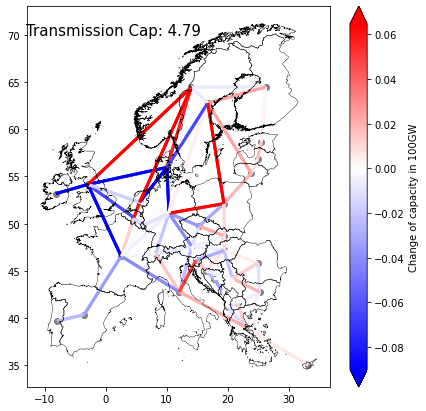

In [480]:
a=transmission_diff.set_geometry('Line')


       

a = gpd.GeoDataFrame(transmission_diff,
            columns=['energy_cap','Line'], 
            geometry='Line') 
#a.plot(column='Freq')

cmap = 'bwr'
vmin=a['energy_cap'].min()
vmax=a['energy_cap'].max()
norm = TwoSlopeNorm(vmin=a['energy_cap'].min()*0.3,vmax=a['energy_cap'].max()*0.3,vcenter=0)

cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)




fig, ax = plt.subplots(1, 1,figsize=(7,7))
a.plot(column='energy_cap', legend=False,ax=ax,cmap=cmap,linewidth=3,norm=norm)
fig.colorbar(cbar, ax=ax,extend='both').set_label('Change of capacity in 100GW')
test.boundary.plot(ax=ax,linewidth=0.4,color='black')
test['centerpoints'].plot(ax=ax,color='grey')

ax.axis('off')
#plt.title('European score for {} step {}'.format(technology_dict[technology],step-1))
#plt.savefig(os.path.join('European_score_{}_step_{}.png'.format(technology_dict[technology],step-1)),bbox_inches='tight', dpi=300)
#plt.clf()
plt.savefig(r'C:\Users\Nikla\polybox\Master Thesis\Figures\Transmission\cap_change.png', dpi=300, bbox_inches = 'tight')

In [435]:
transmission_diff.energy_cap.nlargest(20)

118    0.216132
143    0.216132
107    0.121171
112    0.121171
66     0.081597
111    0.081597
40     0.076035
115    0.076035
14     0.061910
103    0.061910
45     0.055491
109    0.055491
87     0.048420
137    0.048420
53     0.023417
140    0.023417
90     0.022929
141    0.022929
30     0.020742
131    0.020742
Name: energy_cap, dtype: float64

In [434]:
transmission_diff.energy_cap.nsmallest(20)

64    -0.300064
82    -0.300064
35    -0.195497
42    -0.195497
44    -0.151106
105   -0.151106
43    -0.128744
62    -0.128744
58    -0.102932
63    -0.102932
46    -0.064106
139   -0.064106
12    -0.062745
61    -0.062745
59    -0.040881
85    -0.040881
5     -0.040522
31    -0.040522
28    -0.036338
34    -0.036338
Name: energy_cap, dtype: float64

In [426]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(transmission_diff)

    locs                techs  energy_cap  \
0    ALB  ac_transmission:GRC   -0.012553   
1    ALB  ac_transmission:MKD   -0.010970   
2    ALB  ac_transmission:MNE   -0.000238   
3    AUT  ac_transmission:CHE   -0.007230   
4    AUT  ac_transmission:CZE   -0.011550   
5    AUT  ac_transmission:DEU   -0.040522   
6    AUT  ac_transmission:HUN   -0.005829   
7    AUT  ac_transmission:ITA   -0.021815   
8    AUT  ac_transmission:SVK   -0.006223   
9    AUT  ac_transmission:SVN    0.000061   
10   BEL  ac_transmission:DEU   -0.000126   
11   BEL  ac_transmission:FRA    0.012480   
12   BEL  ac_transmission:GBR   -0.062745   
13   BEL  ac_transmission:LUX   -0.014097   
14   BEL  ac_transmission:NLD    0.061910   
15   BGR  ac_transmission:GRC   -0.004980   
16   BGR  ac_transmission:MKD   -0.006153   
17   BGR  ac_transmission:ROU   -0.011250   
18   BGR  ac_transmission:SRB    0.018560   
19   BIH  ac_transmission:HRV   -0.025461   
20   BIH  ac_transmission:MNE   -0.033587   
21   BIH  